# Install packages

In [11]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive") 
!pip install neo
!pip install matplotlib_scalebar
!pip install ffmpeg
!pip install Ipython --upgrade
!pip3 install setuptools==65.5.0
%cd /content/drive/MyDrive/ff_repo/Multifirefly-Project

ModuleNotFoundError: No module named 'google.colab'

# Import packages

In [2]:
# For local use of the notebook
%cd /Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project

/Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project


In [3]:
from multiff_analysis.functions.data_wrangling import data_processing_class, process_raw_data, basic_func, find_patterns, analyze_patterns_and_features
from multiff_analysis.functions.data_visualization import plot_behaviors

import os
import neo
import warnings
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import plotly.express as px
import math
import seaborn as sns
import colorcet
import h5py
from math import pi
from matplotlib import rc
from os.path import exists
from numpy import random
from numpy import linalg as LA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

done
done


# Retrieve data

## Neural data (in bins)

In [4]:
raw_data_folder_name = "all_monkey_data/individual_monkey_data/monkey_Bruno/data_0330"
neural_data_folder_name = os.path.join(raw_data_folder_name, "neural_data/Sorted")

accurate_start_time, accurate_end_time = process_raw_data.find_start_and_accurate_end_time(raw_data_folder_name, exists_ok=True, return_signal_df=False)
align_neural_data_df = pd.read_csv(os.path.join(raw_data_folder_name, 'align_neural_data.txt'))
neural_data_offset = align_neural_data_df.loc[align_neural_data_df['sv']==1, 'ts_s'].item()


filepath = os.path.join(neural_data_folder_name, "spike_times.npy")
spike_times = np.load(filepath)
spike_times = spike_times.reshape(-1)
print(spike_times.shape)
spike_times_s = spike_times/20000 - neural_data_offset + accurate_start_time


filepath = os.path.join(neural_data_folder_name, "spike_clusters.npy")
spike_clusters = np.load(filepath)
spike_clusters = spike_clusters.reshape(-1)


valid_idx = np.where(spike_times_s >= accurate_start_time)[0]
spike_times_s = spike_times_s[valid_idx]
spike_clusters = spike_clusters[valid_idx]

spike_df = pd.DataFrame({'time': spike_times_s, 'cluster': spike_clusters})




min_time = math.floor(spike_df.time.min())
max_time = math.ceil(spike_df.time.max())
bin_width = 0.25
time_bins = np.arange(min_time, max_time, bin_width) 
unique_clusters = np.sort(spike_df.cluster.unique())
# stack all bins horizontally, with one column for each spike cluster
neural_stacked_bins = np.zeros([len(time_bins)-1, len(unique_clusters)])
cluster_idx = []

for i in range(len(unique_clusters)):
  cluster = unique_clusters[i]
  spike_subset = spike_df[spike_df['cluster']==cluster]
  binned_spikes, _ = np.histogram(spike_subset.time, time_bins)
  cluster_idx.append(cluster)
  neural_stacked_bins[:, i] = binned_spikes


(191316,)


In [5]:
# # See other data
# filepath = os.path.join(neural_data_folder_name, 'cluster_KSLabel.tsv')
# cluster_KSLabel=pd.read_csv(filepath,sep='\t')
# cluster_KSLabel

In [6]:
# filepath = os.path.join(neural_data_folder_name, 'cluster_ContamPct.tsv')
# cluster_ContamPct=pd.read_csv(filepath,sep='\t')
# cluster_ContamPct

In [7]:
# filepath = os.path.join(neural_data_folder_name, 'cluster_Amplitude.tsv')
# cluster_Amplitude=pd.read_csv(filepath,sep='\t')
# cluster_Amplitude

In [8]:
# filepath = os.path.join(neural_data_folder_name, "pc_features.npy")
# pc_feature_ind = np.load(filepath)
# print("shape:", pc_feature_ind.shape)
# pc_feature_ind

In [9]:
# filepath = os.path.join(neural_data_folder_name, "pc_feature_ind.npy")
# pc_feature_ind = np.load(filepath)
# print(pc_feature_ind.shape)
# pc_feature_ind

In [10]:
# pc_feature_ind.sum(axis=1)

In [11]:
# filepath = os.path.join(neural_data_folder_name, "channel_map.npy")
# channel_map = np.load(filepath)
# print(channel_map.shape)
# channel_map

In [12]:
# channel_map+1

In [13]:
# filepath = os.path.join(neural_data_folder_name, "channel_positions.npy")
# channel_positions = np.load(filepath)
# print(channel_positions.shape)
# channel_positions

In [14]:
# filepath = os.path.join(neural_data_folder_name, "amplitudes.npy")
# amplitudes = np.load(filepath)
# print(amplitudes.shape)
# amplitudes

In [15]:
# filepath = os.path.join(neural_data_folder_name, "whitening_mat.npy")
# whitening_mat = np.load(filepath)
# print(whitening_mat.shape)
# whitening_mat

In [16]:
# filepath = os.path.join(neural_data_folder_name, "whitening_mat_inv.npy")
# whitening_mat_inv = np.load(filepath)
# print(whitening_mat_inv.shape)
# whitening_mat_inv

In [17]:
# filepath = os.path.join(neural_data_folder_name, "templates.npy")
# templates = np.load(filepath)
# print(templates.shape)
# templates

In [18]:
# for k in range(templates.shape[1]):
#     print(k, templates[:,k,:].sum())

In [19]:
# filepath = os.path.join(neural_data_folder_name, "templates_ind.npy")
# templates_ind = np.load(filepath)
# print(templates_ind.shape)
# templates_ind

In [20]:
# filepath = os.path.join(neural_data_folder_name, "template_features.npy")
# template_features = np.load(filepath)
# print(template_features.shape)
# template_features

In [21]:
# filepath = os.path.join(neural_data_folder_name, "template_feature_ind.npy")
# template_feature_ind = np.load(filepath)
# print(template_feature_ind.shape)
# template_feature_ind

In [22]:
# template_feature_ind.sum(axis=1)

In [23]:
# filepath = os.path.join(neural_data_folder_name, "similar_templates.npy")
# similar_templates = np.load(filepath)
# print(similar_templates.shape)

In [24]:
# similar_templates.T

In [25]:
# filepath = os.path.join(neural_data_folder_name, "spike_times.npy")
# spike_times = np.load(filepath)
# print(spike_times.shape)
# spike_times

In [26]:
96520682/191316

504.5091994396705

In [27]:
96520682/20000/60

80.43390166666667

In [28]:
# filepath = os.path.join(neural_data_folder_name, "spike_templates.npy")
# spike_templates = np.load(filepath)
# print(spike_templates.shape)
# spike_templates

In [29]:
# filepath = os.path.join(neural_data_folder_name, "spike_clusters.npy")
# spike_clusters = np.load(filepath)
# print(spike_clusters.shape)
# spike_clusters

In [30]:
# len(np.where((spike_templates == spike_clusters))[0])/len(spike_templates.reshape(-1))
# # So the two arrays are exactly the same

In [31]:
# print(spike_clusters.reshape(-1).min(), spike_clusters.reshape(-1).max())

In [32]:
# filepath = os.path.join(neural_data_folder_name, "QualityMetr.mat")
# QualityMetr = {}
# f = h5py.File(filepath)
# for k, v in f.items():
#     QualityMetr[k] = np.array(v)
# QualityMetr



In [33]:
# filepath = os.path.join(neural_data_folder_name, "rez.mat")
# arrays = {}
# f = h5py.File(filepath)
# for k, v in f.items():
#     arrays[k] = np.array(v)
# arrays

## Retrieve monkey data

In [34]:
raw_data_folder_name = "all_monkey_data/individual_monkey_data/monkey_Bruno/data_0330"
data_instance = data_processing_class.ProcessMonkeyData(raw_data_folder_name=raw_data_folder_name)
data_instance.retrieve_monkey_data()
data_instance.make_or_retrieve_ff_dataframe(exists_ok=True)
data_instance.find_patterns()
data_instance.make_or_retrieve_all_trial_patterns(exists_ok=True)
data_instance.make_or_retrieve_pattern_frequencies(exists_ok=True)
data_instance.make_or_retrieve_all_trial_features(exists_ok=True)
data_instance.make_or_retrieve_feature_statistics(exists_ok=True)
data_instance.make_info_of_monkey()
data_instance.make_or_retrieve_target_closest()
data_instance.make_or_retrieve_target_angle_smallest()
data_instance.make_distance_dataframe()
data_instance.make_angle_dataframe()

monkey_information = data_instance.monkey_information.copy()
target_closest = data_instance.target_closest.copy()
target_angle_smallest = data_instance.target_angle_smallest.copy()
ff_dataframe = data_instance.ff_dataframe.copy()
ff_dataframe['monkey_angle'] = monkey_information.loc[:, 'monkey_angles'].values[ff_dataframe.loc[:, 'point_index'].values]
ff_dataframe['point_index'] = ff_dataframe['point_index'].astype(int)

ff_life_sorted = data_instance.ff_life_sorted
ff_real_position_sorted = data_instance.ff_real_position_sorted
ff_believed_position_sorted = data_instance.ff_believed_position_sorted
cluster_around_target_indices = data_instance.cluster_around_target_indices
ff_caught_T_sorted = data_instance.ff_caught_T_sorted
ff_flash_sorted = data_instance.ff_flash_sorted

all_trial_patterns = data_instance.all_trial_patterns
all_trial_features = data_instance.all_trial_features
pattern_frequencies = data_instance.pattern_frequencies
feature_statistics = data_instance.feature_statistics
info_of_monkey = data_instance.info_of_monkey
distance_dataframe = data_instance.distance_dataframe
angle_dataframe = data_instance.angle_dataframe
trial_vs_distance = data_instance.trial_vs_distance
trial_vs_angle = data_instance.trial_vs_angle

Retrieved monkey_information


/Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project/multiff_analysis/functions/data_visualization/eye_positions.py:76: RuntimeWarning: divide by zero encountered in divide
  numerator_component = 1/np.tan(ver_theta)**2 - np.tan(inside_tan)**2
/Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project/multiff_analysis/functions/data_visualization/eye_positions.py:78: RuntimeWarning: invalid value encountered in sqrt
  gaze_monkey_view_y = np.sqrt(numerator/denominator)


retrieved monkey data
retrieved  ff_dataframe
retrieved  all_trial_patterns
retrieved  pattern_frequencies
retrieved  all_trial_features
retrieved  feature_statistics
retrieved target_closest
retrieved target_angle_smallest


# Monkey and ff data

## Get convolution pattern

In [35]:
window_width = 1
num_bins_in_window = int(window_width/bin_width)
if num_bins_in_window % 2 == 0:
    num_bins_in_window += 1
    window_width = num_bins_in_window * bin_width
print("True window width: ", window_width)
convolve_pattern = np.ones(num_bins_in_window)

True window width:  1.25


## Plotting kwargs

In [36]:
trial_total_num = 10
PLAYER = "monkey"

classic_plot_kwargs = {'player': PLAYER,
                       'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True,
                       'show_eye_positions': True,
                       'show_eye_positions_on_the_right': True,
                       'show_connect_path_eye_positions': True,
                       #=== below is different from animation_plot_kwargs
                       'hitting_arena_edge_ok': False,
                       'trial_too_short_ok': False}


combined_plot_kwargs = {'player': PLAYER,
                        'combined_plot': True,
                        'show_alive_fireflies': False,
                        'show_title': False,
                        'show_start': False}


plot_chunks_kwargs = {'player': PLAYER,
                      'show_stops': True,
                      'show_believed_target_positions': True,
                      'show_reward_boundary': True,
                      'show_scale_bar': True,
                      'hitting_arena_edge_ok': True,
                      'trial_too_short_ok': True,
                      'show_connect_path_ff': True,
                      'trail_color_var': 'abs_ddw',
                      'show_colorbar': True}


plot_polar_kwargs = {'rmax': 400,
                    'show_visible_ff': True,
                    'hitting_arena_edge_ok': True,
                    'return_axes': True,
                    'colors_show_overall_time': True,
                    'show_ff_in_memory': True,
                    'show_target_at_being_caught': True
}

print("player is", PLAYER)

animation_plot_kwargs = classic_plot_kwargs
animation_plot_kwargs['as_part_of_animation'] = True
animation_plot_kwargs['show_eye_positions_on_the_right'] = False   
animation_plot_kwargs['hitting_arena_edge_ok'] = True
animation_plot_kwargs['trial_too_short_ok'] = True
animation_plot_kwargs['images_dir'] = None

player is monkey


## Monkey data processing

In [37]:
# prepare y (from behavioral data)
monkey_t = monkey_information['monkey_t'].values
box_boundary_positions = time_bins

# Dummy variable of turning left or right - 0 means left and 1 means right
monkey_information['turning_right'] = 0
monkey_information.loc[monkey_information['monkey_dw'] < 0, 'turning_right'] = 1

# add time_box to monkey_information
# because for neural data, the first bin starts after the first edge, similarly we will let the first bin of 
# monkey data (bin number = 0) start after the first edge
monkey_information.loc[:, 'bin'] = np.digitize(monkey_t, box_boundary_positions)-1
rebinned_monkey_info = monkey_information.groupby('bin').mean().reset_index(drop=False)
rebinned_monkey_info['num_stops'] = monkey_information.groupby('bin').sum()['monkey_speeddummy']


# add num_caught_ff to rebinned_monkey_info
catching_target_bins = np.digitize(ff_caught_T_sorted, box_boundary_positions)-1
catching_target_bins_unique, counts = np.unique(catching_target_bins, return_counts=True)
rebinned_monkey_info['num_caught_ff'] = 0
rebinned_monkey_info.loc[catching_target_bins_unique, 'num_caught_ff'] = counts



# make sure that the bin number is continuous in rebinned_monkey_info
continuous_bins = pd.DataFrame({'bin': range(rebinned_monkey_info.bin.max()+1)})
rebinned_monkey_info = continuous_bins.merge(rebinned_monkey_info, how='left', on='bin')
# fill the na in monkey_information with the values in the previous row
rebinned_monkey_info = rebinned_monkey_info.fillna(method='ffill').reset_index(drop=True)
rebinned_monkey_info.head(3)


for column in ['gaze_monkey_view_x', 'gaze_monkey_view_y', 'gaze_world_x', 'gaze_world_y']:
    rebinned_monkey_info.loc[:,column] = np.clip(rebinned_monkey_info.loc[:,column], -1000, 1000)

columns_of_interest = ['bin', 'LDy', 'LDz', 'RDy', 'RDz', 'gaze_monkey_view_x', 'gaze_monkey_view_y', 'gaze_world_x', 'gaze_world_y', 
'monkey_speed', 'monkey_angles', 'monkey_dw', 'monkey_speeddummy', 'monkey_ddw', 'monkey_ddv', 'num_stops', 'num_caught_ff']

rebinned_monkey_info_essential = rebinned_monkey_info[columns_of_interest].copy()


num_stops_convolved = np.convolve(rebinned_monkey_info_essential['num_stops'], convolve_pattern, 'same')
num_caught_ff_convolved = np.convolve(rebinned_monkey_info_essential['num_caught_ff'], convolve_pattern, 'same')
rebinned_monkey_info_essential['stop_rate'] = num_stops_convolved/window_width
rebinned_monkey_info_essential['stop_success_rate'] = num_caught_ff_convolved/num_stops_convolved

## ff data processing

In [128]:
ff_dataframe = data_instance.ff_dataframe.copy()
ff_dataframe['bin'] = np.digitize(ff_dataframe.time, box_boundary_positions)-1
ff_dataframe['point_index'] = ff_dataframe['point_index'].astype(int)
ff_dataframe['monkey_angle'] = monkey_information.loc[:, 'monkey_angles'].values[ff_dataframe.loc[:, 'point_index'].values]


# get some summary statistics from ff_dataframe to use as features for CCA

# count of visible and in-memory ff
ff_dataframe_sub = ff_dataframe[['bin', 'ff_index']]
ff_dataframe_unique_ff = ff_dataframe_sub.groupby('bin').nunique().reset_index(drop=False)
ff_dataframe_unique_ff.rename(columns={'ff_index': 'num_ff'}, inplace=True)
ff_dataframe_unique_ff.head(10)


# count of visible ff
ff_dataframe_visible = ff_dataframe[ff_dataframe['visible']==1]
ff_dataframe_unique_visible_ff = ff_dataframe_visible[['bin', 'ff_index']]
ff_dataframe_unique_visible_ff = ff_dataframe_unique_visible_ff.groupby('bin').nunique().reset_index(drop=False)
ff_dataframe_unique_visible_ff.rename(columns={'ff_index': 'num_visible_ff'}, inplace=True)
ff_dataframe_unique_visible_ff.head(10)

# ff_dataframe_unique_visible_ff['any_ff_visible'] = 0
# ff_dataframe_unique_visible_ff.loc[ff_dataframe_unique_visible_ff['num_visible_ff'] > 0, 'any_ff_visible'] = 1

# min_ff_info
#min_ff_info = ff_dataframe[['bin', 'ff_distance', 'ff_angle', 'ff_angle_boundary', 'memory']]
min_ff_info = ff_dataframe[['bin', 'ff_distance', 'ff_angle', 'ff_angle_boundary']]
min_ff_info = min_ff_info.groupby('bin').min().reset_index(drop=False)
min_ff_info.rename(columns={'ff_distance': 'min_ff_distance',
                            'ff_angle': 'min_abs_ff_angle',
                            'ff_angle_boundary': 'min_abs_ff_angle_boundary'}, inplace=True)
                            #'memory': 'min_ff_memory'}, inplace=True)


# min_visible_ff_info
min_visible_ff_info = ff_dataframe_visible[['bin', 'ff_distance', 'ff_angle', 'ff_angle_boundary']]
min_visible_ff_info = min_visible_ff_info.groupby('bin').min().reset_index(drop=False)
min_visible_ff_info.rename(columns={'ff_distance': 'min_visible_ff_distance',
                                    'ff_angle': 'min_abs_visible_ff_angle', 
                                    'ff_angle_boundary': 'min_abs_visible_ff_angle_boundary'}, inplace=True)



## target_df

In [129]:
# Create target_df
target_df = monkey_information[['bin', 'monkey_t', 'monkey_x', 'monkey_y', 'monkey_angles']].copy()
target_df.rename(columns={'monkey_angles': 'monkey_angle', 'monkey_t': 'time'}, inplace=True)
target_df['point_index'] = target_df.index
target_df['target_index'] = np.digitize(target_df['time'], ff_caught_T_sorted)
target_df['target_x'] = ff_real_position_sorted[target_df['target_index'].values, 0]
target_df['target_y'] = ff_real_position_sorted[target_df['target_index'].values, 1]

# calculate target_distance, target_angle, and target_angle_to_boundary based on target_df['target_x'], target_df['target_y'] in target_df
target_distance = np.sqrt((target_df['target_x'] - target_df['monkey_x'])**2 + (target_df['target_y'] - target_df['monkey_y'])**2)
target_angle = basic_func.calculate_angles_to_ff_centers(ff_x=target_df['target_x'], ff_y=target_df['target_y'], mx=target_df['monkey_x'], my=target_df['monkey_y'], m_angle=target_df['monkey_angle'])
target_df['target_distance'] = target_distance
target_df['target_angle'] = target_angle
target_df['target_angle_to_boundary'] = basic_func.calculate_angles_to_ff_boundaries(angles_to_ff=target_angle, distances_to_ff=target_distance)


# Add some target last seen info to target_df
# But first make sure there's no duplicate
if 'target_cluster_last_seen_time' not in target_df.columns:
    # find alive_ff_indices_around_targets
    alive_ff_indices_around_targets = find_patterns.find_cluster_surrounding_targets(ff_real_position_sorted, ff_caught_T_sorted, \
                                                                                    ff_life_sorted, target_df, max_distance=50, return_index_only=True)
    # add target-cluster-last-seen info to target_df
    target_df = analyze_patterns_and_features.add_target_last_seen_info_to_target_df(target_df, ff_dataframe, alive_ff_indices_around_targets, use_target_cluster=True, include_frozen_info=True)
    target_df = target_df.rename(columns={'target_last_seen_time': 'target_cluster_last_seen_time', 
                                                'target_last_seen_distance': 'target_cluster_last_seen_distance', 
                                                'target_last_seen_angle': 'target_cluster_last_seen_angle', 
                                                'target_last_seen_angle_to_boundary': 'target_cluster_last_seen_angle_to_boundary',
                                                'target_last_seen_distance_frozen': 'target_cluster_last_seen_distance_frozen', 
                                                'target_last_seen_angle_frozen': 'target_cluster_last_seen_angle_frozen', 
                                                'target_last_seen_angle_to_boundary_frozen': 'target_cluster_last_seen_angle_to_boundary_frozen'})


# Add target-last-seen info to target_df
target_df = analyze_patterns_and_features.add_target_last_seen_info_to_target_df(target_df, ff_dataframe, alive_ff_indices_around_targets, use_target_cluster=False, include_frozen_info=True)
target_df['point_index'] = target_df['point_index'].astype(int)





# add target_has_disappeared_for_last_time_dummy to target_df
target_df['target_has_disappeared_for_last_time_dummy'] = 0
# for each target
for target in range(len(ff_caught_T_sorted)):
# fine the time it disappears for the last time
    target_info = ff_dataframe[(ff_dataframe['ff_index']==target) & (ff_dataframe['visible']==1)]
    target_last_visible_time = target_info['time'].max()
    # then mark the period between that time and the capture time as 1
    target_df.loc[(target_df['target_index']==target) & (target_df['time'] > target_last_visible_time), 'target_has_disappeared_for_last_time_dummy'] = 1


target_df['target_cluster_has_disappeared_for_last_time_dummy'] = 0
# for each target
for target in range(len(ff_caught_T_sorted)):
    target_cluster_indices = alive_ff_indices_around_targets[target] 
    target_info = ff_dataframe[(ff_dataframe['ff_index'].isin(target_cluster_indices)) & (ff_dataframe['visible']==1)]
    target_last_visible_time = target_info['time'].max()
    # then mark the period between that time and the capture time as 1
    target_df.loc[(target_df['target_index']==target) & (target_df['time'] > target_last_visible_time), 'target_cluster_has_disappeared_for_last_time_dummy'] = 1


# dummy variable of target being visible (over the full span of the bin)
target_df[['target_visible_dummy']] = 1
target_df[['target_cluster_visible_dummy']] = 1
target_df.loc[target_df['target_last_seen_time'] > 0, 'target_visible_dummy'] = 0
target_df.loc[target_df['target_cluster_last_seen_time'] > 0, 'target_cluster_visible_dummy'] = 0


# find time_since_last_capture
# since target_df contains more time than ff_caught_T_sorted, we need to add a value to the end of ff_caught_T_sorted
if target_df.target_index.unique().max() >= len(ff_caught_T_sorted)-1:
    num_exceeding_target = target_df.target_index.unique().max() - (len(ff_caught_T_sorted)-1)
    ff_caught_T_sorted_temp = np.concatenate((ff_caught_T_sorted, np.repeat(target_df.time.max(), num_exceeding_target)))
else:
    ff_caught_T_sorted_temp = ff_caught_T_sorted.copy()
target_df['current_target_caught_time'] = ff_caught_T_sorted_temp[target_df['target_index']]
target_df['last_target_caught_time'] = ff_caught_T_sorted_temp[target_df['target_index']-1]
target_df.loc[target_df['target_index']==0, 'last_target_caught_time'] = 0
target_df['time_since_last_capture'] = target_df['time'] - target_df['last_target_caught_time']


# Add to target_df bummy variable of being in the last duration of seeing the target cluster
target_df['while_last_seeing_target_cluster'] = 0
for target in target_df.target_index.unique():
    target_subset = target_df[target_df.target_index == target]
    if len(target_subset) > 0:
        dif = np.diff(target_subset['target_cluster_visible_dummy'])
        becoming_visible_points = np.where(dif == 1)[0]
        if len(becoming_visible_points) > 0:
            starting_index = becoming_visible_points[-1]+1
        elif target_subset['target_cluster_visible_dummy'].iloc[0] == 1: # the target has been visible throughout the duration of the trial
            starting_index = 0
        else: # the target has not become visible throughout the duration of the trial
            continue
        stop_being_visible_points = np.where(dif == -1)[0]
        if len(stop_being_visible_points) > 0:
            ending_index = stop_being_visible_points[-1]+1
            if ending_index < starting_index:
                ending_index = len(target_subset)
        else:
            ending_index = len(target_subset)
        target_df.loc[target_subset.iloc[starting_index:ending_index].index, 'while_last_seeing_target_cluster'] = 1
        



# condense the information
target_average_info = target_df[['bin', 'target_distance', 'target_angle', 'target_angle_to_boundary', \
                                    'target_last_seen_time', 'target_last_seen_distance', 'target_last_seen_angle', 'target_last_seen_angle_to_boundary',\
                                    'target_last_seen_distance_frozen', 'target_last_seen_angle_frozen', 'target_last_seen_angle_to_boundary_frozen',
                                    'target_cluster_last_seen_time', 'target_cluster_last_seen_distance', 'target_cluster_last_seen_angle', 'target_cluster_last_seen_angle_to_boundary',\
                                    'target_cluster_last_seen_distance_frozen', 'target_cluster_last_seen_angle_frozen', 'target_cluster_last_seen_angle_to_boundary_frozen',]].copy()


target_average_info = target_average_info.groupby('bin').mean().reset_index(drop=False)
target_average_info.rename(columns={'target_distance': 'avg_target_distance',
                                'target_angle': 'avg_target_angle',
                                'target_angle_to_boundary': 'avg_target_angle_to_boundary',
                                'target_last_seen_time': 'avg_target_last_seen_time',
                                'target_last_seen_distance': 'avg_target_last_seen_distance',
                                'target_last_seen_angle': 'avg_target_last_seen_angle',
                                'target_last_seen_angle_to_boundary': 'avg_target_last_seen_angle_to_boundary',
                                'target_last_seen_distance_frozen': 'avg_target_last_seen_distance_frozen',
                                'target_last_seen_angle_frozen': 'avg_target_last_seen_angle_frozen',
                                'target_last_seen_angle_to_boundary_frozen': 'avg_target_last_seen_angle_to_boundary_frozen',
                                'target_cluster_last_seen_time': 'avg_target_cluster_last_seen_time',
                                'target_cluster_last_seen_distance': 'avg_target_cluster_last_seen_distance',
                                'target_cluster_last_seen_angle': 'avg_target_cluster_last_seen_angle',
                                'target_cluster_last_seen_angle_to_boundary': 'avg_target_cluster_last_seen_angle_to_boundary',
                                'target_cluster_last_seen_distance_frozen': 'avg_target_cluster_last_seen_distance_frozen',
                                'target_cluster_last_seen_angle_frozen': 'avg_target_cluster_last_seen_angle_frozen',
                                'target_cluster_last_seen_angle_to_boundary_frozen': 'avg_target_cluster_last_seen_angle_to_boundary_frozen'
                                }, inplace=True)


target_min_info = target_df[['bin', 'target_has_disappeared_for_last_time_dummy', 'target_cluster_has_disappeared_for_last_time_dummy']].copy()
target_min_info = target_min_info.groupby('bin').min().reset_index(drop=False)
target_min_info.rename(columns={'target_has_disappeared_for_last_time_dummy': 'min_target_has_disappeared_for_last_time_dummy',
                                'target_cluster_has_disappeared_for_last_time_dummy': 'min_target_cluster_has_disappeared_for_last_time_dummy',
                                }, inplace=True)


target_max_info = target_df[['bin', 'target_visible_dummy', 'target_cluster_visible_dummy']].copy()
target_max_info = target_max_info.groupby('bin').max().reset_index(drop=False)
target_max_info.rename(columns={'target_visible_dummy': 'max_target_visible_dummy',
                                'target_cluster_visible_dummy': 'max_target_cluster_visible_dummy'}, inplace=True) 

                        

Finding clusters surrounding targets...
0 out of 1338
100 out of 1338
200 out of 1338
300 out of 1338
400 out of 1338
500 out of 1338
600 out of 1338
700 out of 1338
800 out of 1338
900 out of 1338
1000 out of 1338
1100 out of 1338
1200 out of 1338
1300 out of 1338
Adding target-cluster-last-seen info to target_df...


## category_info

In [130]:
pattern_df = monkey_information[['bin', 'monkey_t', 'monkey_x', 'monkey_y', 'monkey_angles',\
                                 'monkey_speed', 'monkey_speeddummy']].copy()
pattern_df.rename(columns={'monkey_angles': 'monkey_angle', 'monkey_t': 'time'}, inplace=True)
pattern_df['point_index'] = pattern_df.index

pattern_df['try_a_few_times_indice_dummy'] = 0
pattern_df.loc[data_instance.try_a_few_times_indices_for_anim, 'try_a_few_times_indice_dummy'] = 1
pattern_df['give_up_after_trying_indice_dummy'] = 0
pattern_df.loc[data_instance.give_up_after_trying_indices_for_anim, 'give_up_after_trying_indice_dummy'] = 1
pattern_df['ignore_sudden_flas_indice_dummy'] = 0
pattern_df.loc[data_instance.ignore_sudden_flash_indices_for_anim, 'ignore_sudden_flas_indice_dummy'] = 1



pattern_df_condensed = pattern_df[['bin', 'try_a_few_times_indice_dummy', 'give_up_after_trying_indice_dummy',
                                   'ignore_sudden_flas_indice_dummy']].copy()
pattern_df_condensed = pattern_df_condensed.groupby('bin').max().reset_index(drop=False) 



# add the category info based on trials
all_trial_patterns['trial_end_time'] = ff_caught_T_sorted[:len(all_trial_patterns)]
all_trial_patterns['trial_start_time'] = all_trial_patterns['trial_end_time'].shift(1)
all_trial_patterns.loc[0, 'trial_start_time'] = 0


# find the centers of time_bins, which is the average of every two points
bin_midlines = (time_bins[:-1] + time_bins[1:])/2
bin_midlines = bin_midlines[bin_midlines < ff_caught_T_sorted[-1]]
bin_midlines = pd.DataFrame(bin_midlines, columns=['bin_midline'])
bin_midlines['trial'] = np.digitize(bin_midlines['bin_midline'], ff_caught_T_sorted)
all_trial_patterns['trial'] = all_trial_patterns.index
bin_midlines = bin_midlines.merge(all_trial_patterns, on='trial', how='left')
bin_midlines['bin'] = bin_midlines.index
pattern_df_condensed = pattern_df_condensed.merge(bin_midlines[['bin', 'two_in_a_row', 'visible_before_last_one',
       'disappear_latest', 'ignore_sudden_flash', 'try_a_few_times',
       'give_up_after_trying', 'cluster_around_target',
       'waste_cluster_around_target']], on = 'bin', how='left')

## Final_behavioral_data

In [131]:
binned_features = ff_dataframe_unique_ff.copy()
# make sure that the bin number is continuous in binned_features
continuous_bins = pd.DataFrame({'bin': range(len(binned_spikes)+1)})
binned_features = continuous_bins.merge(binned_features, how='left', on='bin')


# merge all the features
# taking from ff_dataframe
binned_features = binned_features.merge(ff_dataframe_unique_visible_ff, how='left', on='bin')
binned_features = binned_features.merge(min_ff_info, how='left', on='bin')
binned_features = binned_features.merge(min_visible_ff_info, how='left', on='bin')

# taking from target_info
binned_features = binned_features.merge(target_average_info, how='left', on='bin')
binned_features = binned_features.merge(target_min_info, how='left', on='bin')
binned_features = binned_features.merge(target_max_info, how='left', on='bin')

binned_features = binned_features.merge(pattern_df_condensed, how='left', on='bin')


# bins where ff is caught
binned_features['catching_ff'] = 0
catching_target_bins = np.digitize(ff_caught_T_sorted, box_boundary_positions)-1
binned_features.loc[binned_features['bin'].isin(catching_target_bins), 'catching_ff'] = 1

# fill the na in binned_features with the values in the previous row
binned_features = binned_features.fillna(method='ffill').reset_index(drop=True)
# fill the rest of na (in the firsr row) in binned_features with the values in the next row
binned_features = binned_features.fillna(method='bfill').reset_index(drop=True)



# merge all the features back to rebinned_monkey_info_essential (maybe it should be renamed)
final_behavioral_data = rebinned_monkey_info_essential.merge(binned_features, how='left', on='bin')
final_behavioral_data.fillna(0, inplace=True)


# dummy variable of whether any ff is visible
# only add it if the ratio of bins with visible ff is between 10% and 90%, since otherwise it might not be so meaningful
any_ff_visible = (final_behavioral_data['num_visible_ff'] > 0).astype(int)
if (any_ff_visible.sum()/len(final_behavioral_data) > 0.1) and (any_ff_visible.sum()/len(final_behavioral_data) < 0.9):
    final_behavioral_data['any_ff_visible'] = final_behavioral_data['num_visible_ff'] > 0  


# Neural data

## prepare x_var

In [132]:

max_bin = final_behavioral_data.bin.max()
x_var = neural_stacked_bins[0:max_bin+1, :]
column_names = 'unit_' +np.char.array(np.array(range(x_var.shape[1]), dtype='str'))
spikes_in_bins = pd.DataFrame(x_var, columns=column_names)
#spikes_in_bins = pd.DataFrame(x_var, columns=cluster_idx)

## Convolve

In [133]:

import sys
import os
import numpy as np
import torch
from numpy import pi
from matplotlib import pyplot as plt

import numpy as np
import scipy.linalg as linalg
import scipy.interpolate as interpolate
from scipy.signal import fftconvolve


from scipy.io import loadmat
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sys

import scipy.sparse as sparse
import matplotlib.pylab as plt

def splineDesign(knots, x, ord=4, der=0, outer_ok=False): 
    """Reproduces behavior of R function splineDesign() for use by ns(). See R documentation for more information.

    Python code uses scipy.interpolate.splev to get B-spline basis functions, while R code calls C.
    Note that der is the same across x."""
    knots = np.array(knots, dtype=np.float64) 
    x = np.array(x, dtype=np.float64) 
    xorig = x.copy() 
    not_nan = ~np.isnan(xorig) 
    nx = x.shape[0] 
    knots.sort()
    nk = knots.shape[0] 
    need_outer = any(x[not_nan] < knots[ord - 1]) or any(x[not_nan] > knots[nk - ord])
    in_x = (x >= knots[0]) & (x <= knots[-1]) & not_nan

    if need_outer:
        if outer_ok:
            # print('knots do not contain the data range')

            out_x = ~all(in_x)
            if out_x:
                x = x[in_x]
                nnx = x.shape[0]
            dkn = np.diff(knots)[::-1]
            reps_start = ord - 1
            if any(dkn > 0):
                reps_end = max(0, ord - np.where(dkn > 0)[0][0] - 1)
            else:
                reps_end = np.nan  # this should give an error, since all knots are the same
            idx = [0] * (ord - 1) + list(range(nk)) + [nk - 1] * reps_end
            knots = knots[idx]
        else:
            raise ValueError("the 'x' data must be in the range %f to %f unless you set outer_ok==True'" % (
            knots[ord - 1], knots[nk - ord]))
    else:
        reps_start = 0
        reps_end = 0
    if (not need_outer) and any(~not_nan):
        x = x[in_x]
    idx0 = reps_start
    idx1 = len(knots) - ord - reps_end
    cycleOver = np.arange(idx0, idx1)
    m = len(knots) - ord
    v = np.zeros((cycleOver.shape[0], len(x)), dtype=np.float64)
    # v = np.zeros((m, len(x)))

    d = np.eye(m, len(knots))
    for i in range(cycleOver.shape[0]):
        v[i] = interpolate.splev(x, (knots, d[cycleOver[i]], ord - 1), der=der)
        # v[i] = interpolate.splev(x, (knots, d[i], ord - 1), der=der)

    # before = np.sum(xorig[not_nan] < knots[0])
    # after = np.sum(xorig[not_nan] > knots[-1])
    design = np.zeros((v.shape[0], xorig.shape[0]), dtype=np.float64)
    for i in range(v.shape[0]):
    #     design[i, before:xorig.shape[0] - after] = v[i]
        design[i,in_x] = v[i]


    return design.transpose()

In [134]:
# convolve in Yizhou's way

# define a b-spline
kernel_len = 7 # should be about +- 325ms 
knots = np.hstack(([-1.001]*3, np.linspace(-1.001,1.001,5), [1.001]*3))
tp = np.linspace(-1.,1.,kernel_len)
bX = splineDesign(knots, tp, ord=4, der=0, outer_ok=False)


modelX = np.zeros((x_var.shape[0], x_var.shape[1]*bX.shape[1]))
cc = 0
for neu in range(x_var.shape[1]):
    print(neu)

    modelX2 = np.zeros((x_var.shape[0],bX.shape[1]))
    for k in range(bX.shape[1]):
        xsm = np.convolve(x_var[:,neu], bX[:,k],'same')
        modelX2[:,k] = xsm


    modelX[:,cc:cc+bX.shape[1]] = modelX2
    cc += bX.shape[1]

x_var_convolved = modelX

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


## Lag

In [135]:
def add_lags_to_each_feature(var, lag_numbers):
    n_units = var.shape[1]
    var_lags = np.zeros((var.shape[0], n_units * len(lag_numbers)))
    KEEP_COLUMN_NAMES = False

    if isinstance(var, pd.DataFrame):
        column_names = var.columns.tolist()
        column_names = [str(name) for name in column_names]
        var = var.values
        max_str_length = np.array([len(x) for x in column_names]).max()
        column_names = np.array(column_names, dtype='<U'+str(max_str_length+5))
        column_names = np.char.array(column_names)
        new_column_names = np.tile(column_names, len(lag_numbers))
        KEEP_COLUMN_NAMES = True
    for idx in range(len(lag_numbers)):
        i = lag_numbers[idx]
        columns_numbers = range(idx*n_units, (idx+1)*n_units)
        if KEEP_COLUMN_NAMES:
            new_column_names[columns_numbers] = np.char.add(column_names, "_" + str(i))

        if i < 0:
            var_lags[:i, columns_numbers] = var[-i:, :]
        elif i > 0:
            var_lags[i:, columns_numbers] = var[:-i, :]
        else:
            var_lags[:, columns_numbers] = var[:, :]
    if KEEP_COLUMN_NAMES:
        var_lags = pd.DataFrame(var_lags, columns=new_column_names)
    return var_lags

In [136]:
lag_numbers = range(-3, 4)
x_var_lags = add_lags_to_each_feature(spikes_in_bins, lag_numbers)
y_var_lags = add_lags_to_each_feature(final_behavioral_data, lag_numbers)
y_var_lags

bin_-3  LDy_-3  LDz_-3  RDy_-3  RDz_-3  gaze_monkey_view_x_-3  \
0         3.00   35.39    3.03   32.76    2.08                -130.01   
1         4.00   35.49    3.39   33.62    2.80                -104.26   
2         5.00   35.95    3.93   32.58    2.31                -107.86   
3         6.00   20.38   10.49   16.71    9.12                 -24.65   
4         7.00   16.15   13.21   13.30   11.39                 -10.70   
...        ...     ...     ...     ...     ...                    ...   
14392 14395.00    4.64   -9.52    2.37   -8.49                  39.82   
14393 14396.00    2.84  -11.79    0.62   -9.32                  29.32   
14394     0.00    0.00    0.00    0.00    0.00                   0.00   
14395     0.00    0.00    0.00    0.00    0.00                   0.00   
14396     0.00    0.00    0.00    0.00    0.00                   0.00   

       gaze_monkey_view_y_-3  gaze_world_x_-3  gaze_world_y_-3  \
0                    -208.53          -130.01          -177.70   
1                    -160.59          -104.22          -129.78   
2                    -172.68          -107.85          -141.88   
3                     -65.96           -24.63           -35.16   
4                     -44.85           -10.66           -14.03   
...                      ...              ...              ...   
14392                  49.85          -283.26           284.17   
14393                  46.10          -278.41           304.21   
14394                   0.00             0.00             0.00   
14395                   0.00             0.00             0.00   
14396                   0.00             0.00             0.00   

       monkey_speed_-3  ...  ignore_sudden_flas_indice_dummy_3  \
0                 0.05  ...                               0.00   
1                 0.06  ...                               0.00   
2                 0.07  ...                               0.00   
3                 0.06  ...                               0.00   
4                 0.06  ...                               0.00   
...                ...  ...                                ...   
14392           194.85  ...                               0.00   
14393            30.22  ...                               0.00   
14394             0.00  ...                               0.00   
14395             0.00  ...                               0.00   
14396             0.00  ...                               0.00   

       two_in_a_row_3  visible_before_last_one_3  disappear_latest_3  \
0                0.00                       0.00                0.00   
1                0.00                       0.00                0.00   
2                0.00                       0.00                0.00   
3                0.00                       1.00                0.00   
4                0.00                       1.00                0.00   
...               ...                        ...                 ...   
14392            0.00                       0.00                0.00   
14393            0.00                       0.00                0.00   
14394            0.00                       0.00                0.00   
14395            0.00                       0.00                0.00   
14396            0.00                       0.00                0.00   

       ignore_sudden_flash_3  try_a_few_times_3  give_up_after_trying_3  \
0                       0.00               0.00                    0.00   
1                       0.00               0.00                    0.00   
2                       0.00               0.00                    0.00   
3                       0.00               0.00                    0.00   
4                       0.00               0.00                    0.00   
...                      ...                ...                     ...   
14392                   0.00               0.00                    1.00   
14393                   0.00               0.00                    1.00   
14394

In [137]:
n_lags = 3
lag_numbers = range(-n_lags,0+1)
#lag_numbers = range(-n_lags, n_lags+1)
#lag_numbers = range(0, n_lags+1)
print("lag_numbers:", lag_numbers)

x_var_lags = add_lags_to_each_feature(x_var, lag_numbers)
x_var_lags

lag_numbers: range(-3, 1)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [138]:
synthetic_data = np.concatenate([np.arange(20).reshape(-1,1), np.arange(1, 21).reshape(-1,1)], axis=1)
synthetic_data_lags = add_lags_to_each_feature(synthetic_data, lag_numbers)
synthetic_data_lags

array([[ 3.,  4.,  2.,  3.,  1.,  2.,  0.,  1.],
       [ 4.,  5.,  3.,  4.,  2.,  3.,  1.,  2.],
       [ 5.,  6.,  4.,  5.,  3.,  4.,  2.,  3.],
       [ 6.,  7.,  5.,  6.,  4.,  5.,  3.,  4.],
       [ 7.,  8.,  6.,  7.,  5.,  6.,  4.,  5.],
       [ 8.,  9.,  7.,  8.,  6.,  7.,  5.,  6.],
       [ 9., 10.,  8.,  9.,  7.,  8.,  6.,  7.],
       [10., 11.,  9., 10.,  8.,  9.,  7.,  8.],
       [11., 12., 10., 11.,  9., 10.,  8.,  9.],
       [12., 13., 11., 12., 10., 11.,  9., 10.],
       [13., 14., 12., 13., 11., 12., 10., 11.],
       [14., 15., 13., 14., 12., 13., 11., 12.],
       [15., 16., 14., 15., 13., 14., 12., 13.],
       [16., 17., 15., 16., 14., 15., 13., 14.],
       [17., 18., 16., 17., 15., 16., 14., 15.],
       [18., 19., 17., 18., 16., 17., 15., 16.],
       [19., 20., 18., 19., 17., 18., 16., 17.],
       [ 0.,  0., 19., 20., 18., 19., 17., 18.],
       [ 0.,  0.,  0.,  0., 19., 20., 18., 19.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 19., 20.]])

## firing rate

In [139]:

# get convolved windows
all_windows = np.repeat(bin_width, len(x_var_convolved))
convolved_windows = np.convolve(all_windows, convolve_pattern, 'same')

# apply convolution to every column in spikes_in_bins
firing_rate_df = spikes_in_bins.apply(lambda x: np.convolve(x, convolve_pattern, 'same')/convolved_windows, axis=0)
firing_rate_df

unit_0  unit_1  unit_2  unit_3  unit_4  unit_5  unit_6  unit_7  unit_8  \
0        0.00    0.00    1.33    0.00    1.33    0.00    0.00    1.33    0.00   
1        0.00    0.00    1.00    1.00    2.00    0.00    0.00    3.00    0.00   
2        0.00    0.00    0.80    0.80    1.60    0.00    0.00    4.00    0.00   
3        0.00    0.80    0.80    0.80    1.60    0.00    0.00    4.80    0.00   
4        0.00    0.80    0.00    0.80    2.40    0.00    0.00    6.40    0.00   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
14392    1.60    0.80    7.20   15.20   10.40    0.00    0.00   14.40    0.00   
14393    0.80    2.40    7.20   16.00    8.00    0.00    0.00   12.00    0.00   
14394    0.80    1.60    6.40   17.60    8.80    0.00    0.80   11.20    0.00   
14395    0.00    2.00    6.00   16.00   11.00    0.00    1.00   13.00    0.00   
14396    0.00    2.67    4.00   18.67    9.33    0.00    1.33    8.00    0.00   

       unit_9  unit_10  unit_11  unit_12  unit_13  unit_14  unit_15  
0        0.00     1.33     0.00     5.33     0.00     1.33     0.00  
1        1.00     4.00     0.00     7.00     0.00     2.00     1.00  
2        0.80     3.20     0.00     5.60     0.00     1.60     0.80  
3        0.80     3.20     0.00     5.60     0.00     1.60     0.80  
4        2.40     4.80     0.00     6.40     0.00     1.60     0.80  
...       ...      ...      ...      ...      ...      ...      ...  
14392    5.60     1.60     0.00     0.00     0.00     0.00     4.00  
14393    4.00     1.60     0.00     0.00     0.00     0.00     4.00  
14394    1.60     0.80     0.00     0.80     0.00     0.80     4.00  
14395    0.00     0.00     0.00     1.00     0.00     1.00     2.00  
14396    0.00     0.00     0.00     1.33     0.00     1.33     2.67  

[14397 rows x 16 columns]

## Plot interspike intervals

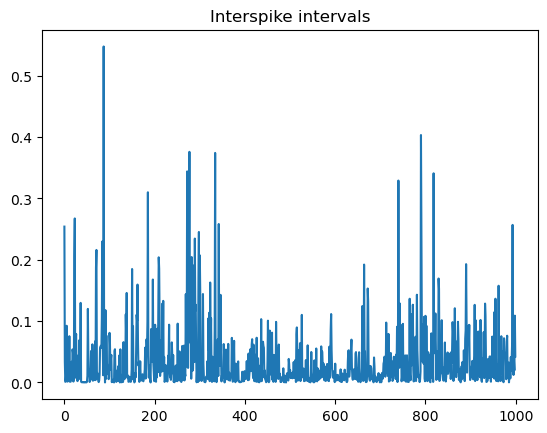

In [140]:
num_spikes = 1000
plt.plot(range(num_spikes), np.diff(spike_times_s[:num_spikes+1]))
plt.title("Interspike intervals")
plt.show()
plt.close()

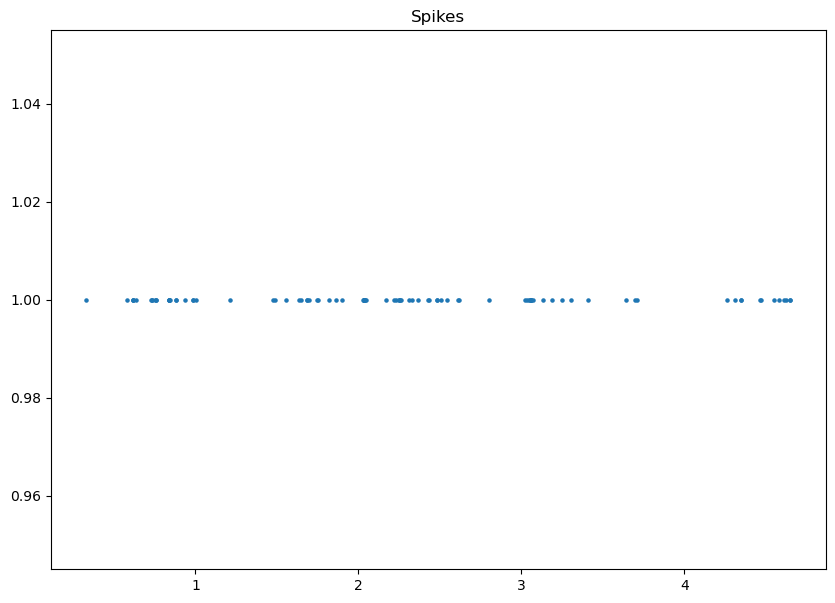

In [141]:
num_spikes = 100
plt.figure(figsize=(10, 7))
plt.scatter(spike_times_s[:num_spikes], np.ones(num_spikes), s=5)
plt.title("Spikes")
plt.show()
plt.close()

### Differentiate them based on clusters

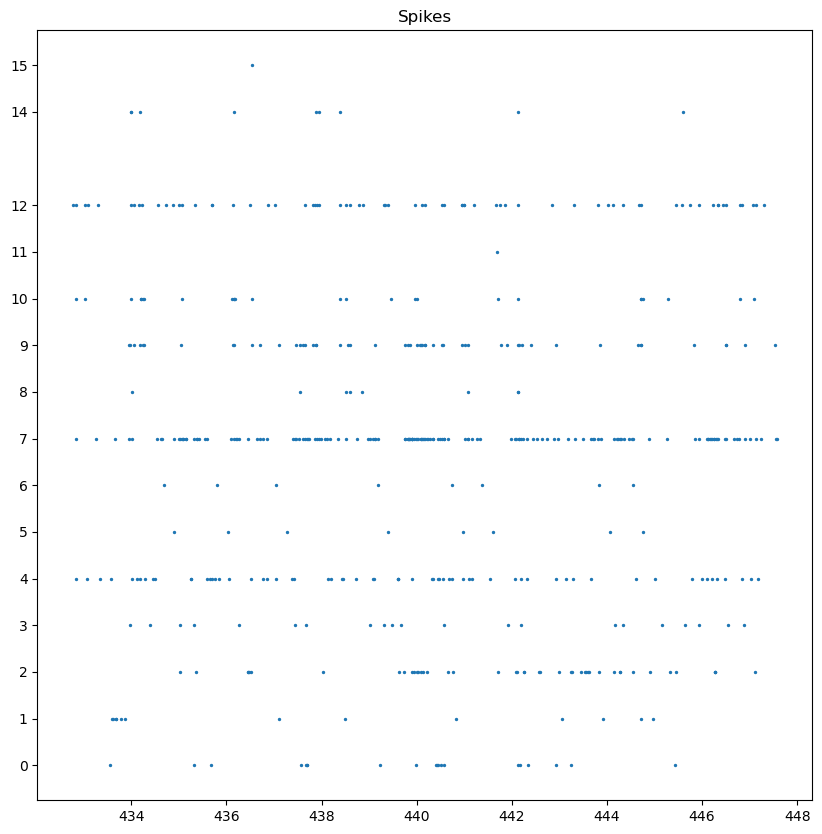

In [142]:
spikes_to_plot = range(10000, 10500)
plt.figure(figsize=(10, 10))
plt.scatter(spike_df.time[spikes_to_plot], spike_df.cluster[spikes_to_plot], s=2)
# fix the yticks to be the cluster names
plt.yticks(spike_df.cluster[spikes_to_plot].unique(), spike_df.cluster[spikes_to_plot].unique())
plt.title("Spikes")
plt.show()
plt.close()

### Histogram of binned spikes

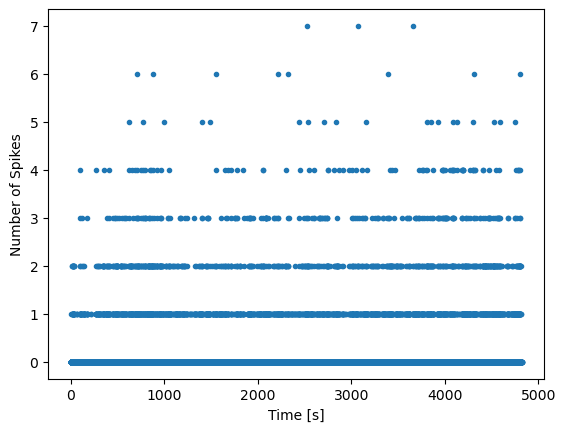

In [143]:
plt.plot(time_bins[:-1], binned_spikes, '.')               # Plot the resulting counts over time
plt.xlabel('Time [s]')                                       # ... with axes labeled
plt.ylabel('Number of Spikes')
plt.show()

### Correlation between spike clusters

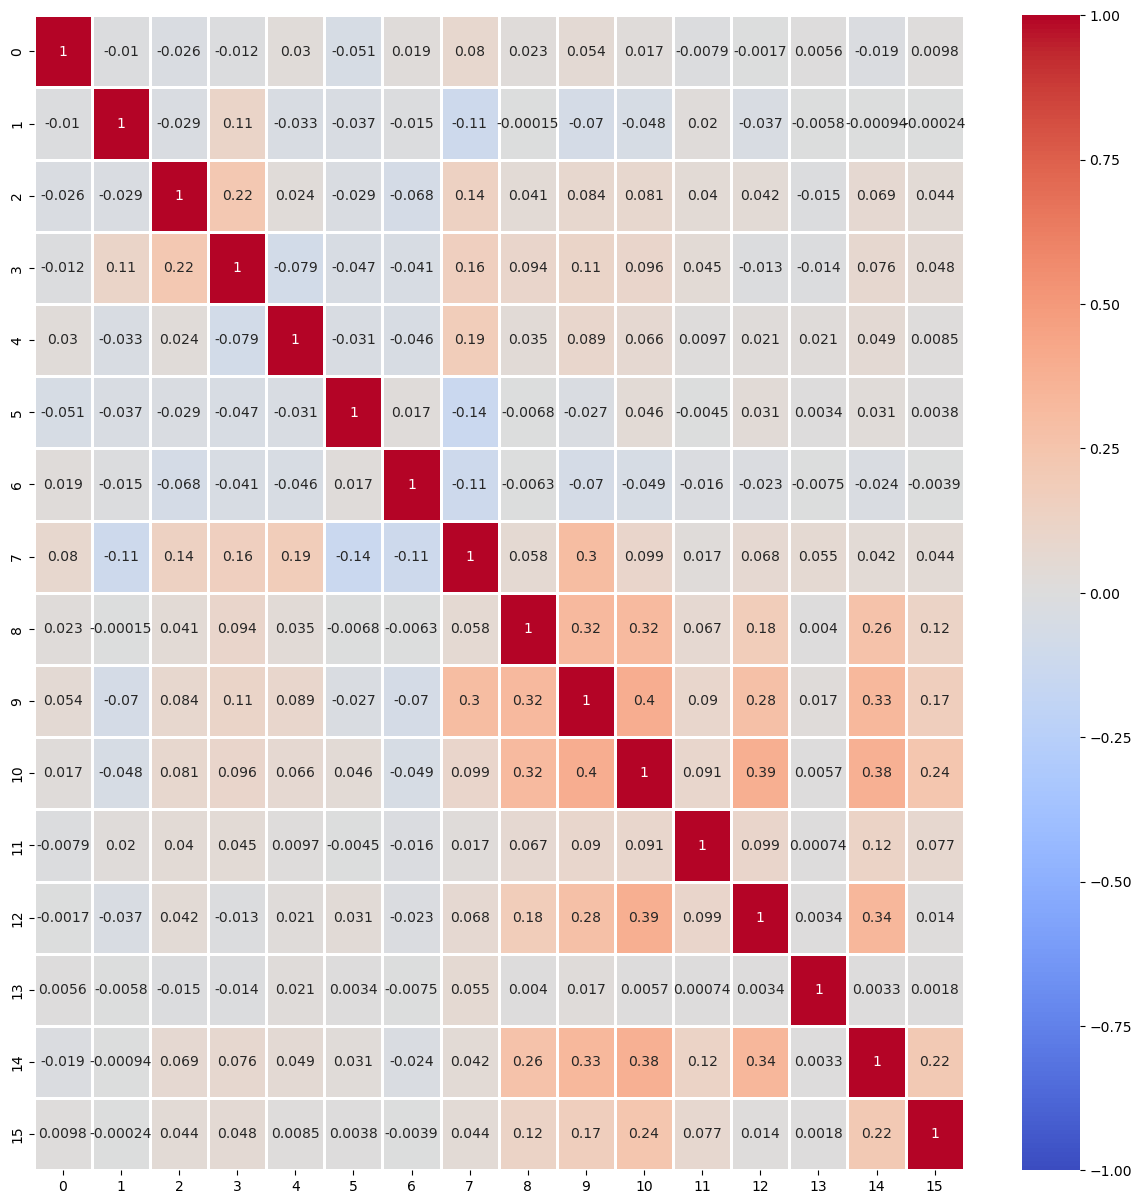

In [144]:
corr_coeff = pd.DataFrame(neural_stacked_bins).corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

## Relating to other variables

### Catching a target

Number of spikes plotted:  45


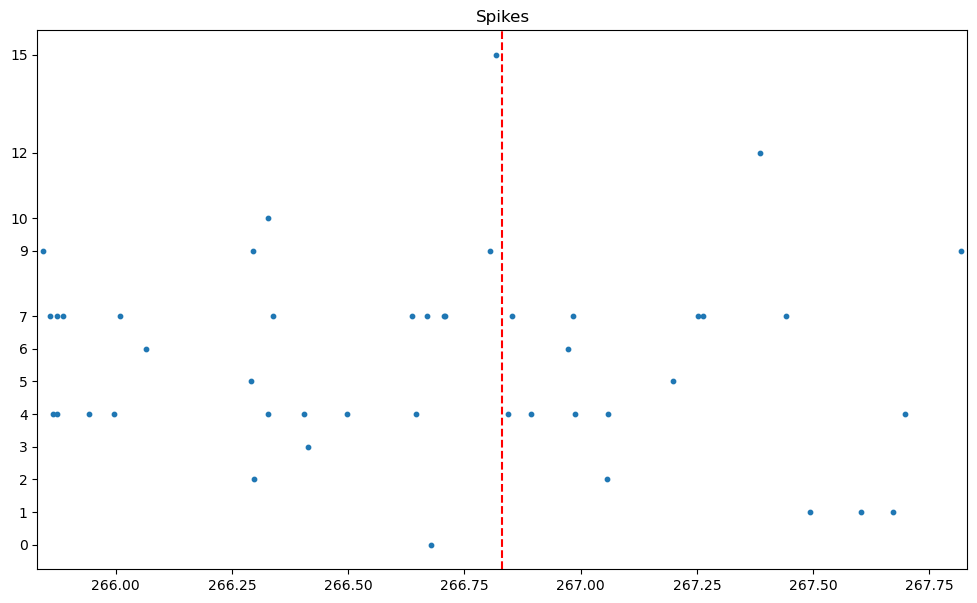

Number of spikes plotted:  64


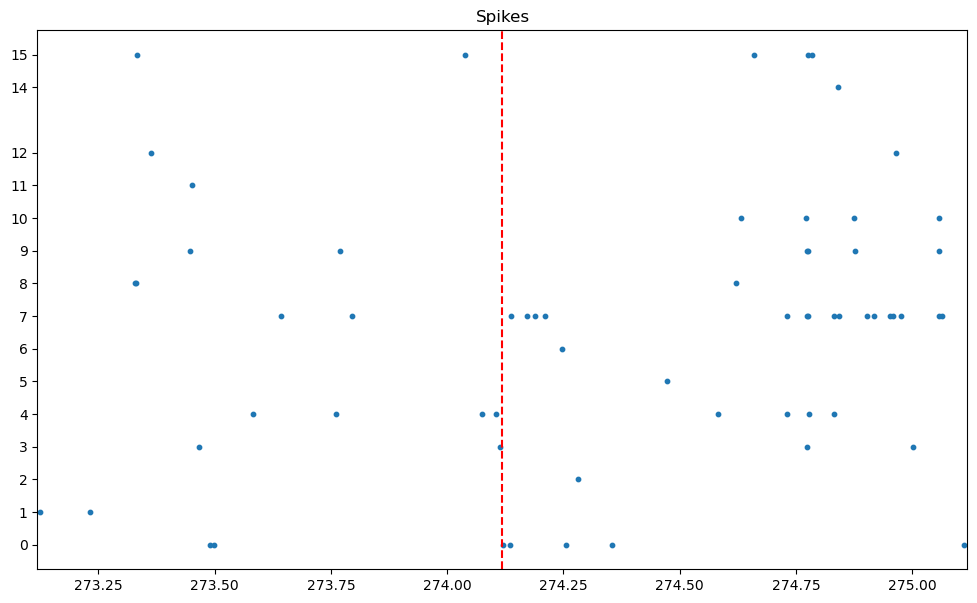

In [145]:
starting_row = 100
max_rows_to_plot = 2
i = 0
for time in ff_caught_T_sorted[starting_row:starting_row+max_rows_to_plot]:
    i+=1
    duration = [time - 1, time + 1] 
    spike_subset = spike_df[(spike_df['time'] >= duration[0]) & (spike_df['time'] <= duration[1])]
    print("Number of spikes plotted: ", len(spike_subset))
    plt.figure(figsize=(12, 7))
    spike_cluster_numbers = spike_subset.cluster
    plt.scatter(spike_subset.time, spike_cluster_numbers, s=10)
    plt.axvline(x=time, color='r', linestyle='--')
    # fix the yticks to be the cluster names
    plt.xlim([time - 1, time + 1])
    plt.yticks(spike_cluster_numbers.unique(), spike_cluster_numbers.unique())
    plt.title("Spikes")
    plt.show()
    plt.close()


    # cum_indices, cum_t, cum_angles, cum_mx, cum_my, cum_speed, cum_speeddummy = plot_behaviors.find_monkey_information_in_the_duration(duration, monkey_information)
    # step_to_mark = np.where(cum_t <= row.last_visible_time)[0][-1]
    # step_to_mark2 = np.where(cum_t >= row.caught_time)[0][0]

    # with basic_func.initiate_plot(10, 10, 100):
    #     fig = plt.figure()
    #     whether_plotted, axes, R, cum_mxy_rotate_1, shown_ff_indices_1 = plot_behaviors.PlotTrials(duration,
    #               *plot_behaviors.PlotTrials_args,
    #               **plot_chunks_kwargs3,
    #               minimal_margin=250,
    #               show_path_when_target_visible = True,
    #               currentTrial=row.target_index,
    #               #steps_to_be_marked = np.array([step_to_mark, step_to_mark2]),
    #               num_trials=2,
    #               fig=fig)


    plt.show()
    plt.close()


    if i == max_rows_to_plot:
        break

In [146]:
unique_clusters = spike_df.cluster.unique()
unique_clusters = np.sort(unique_clusters)

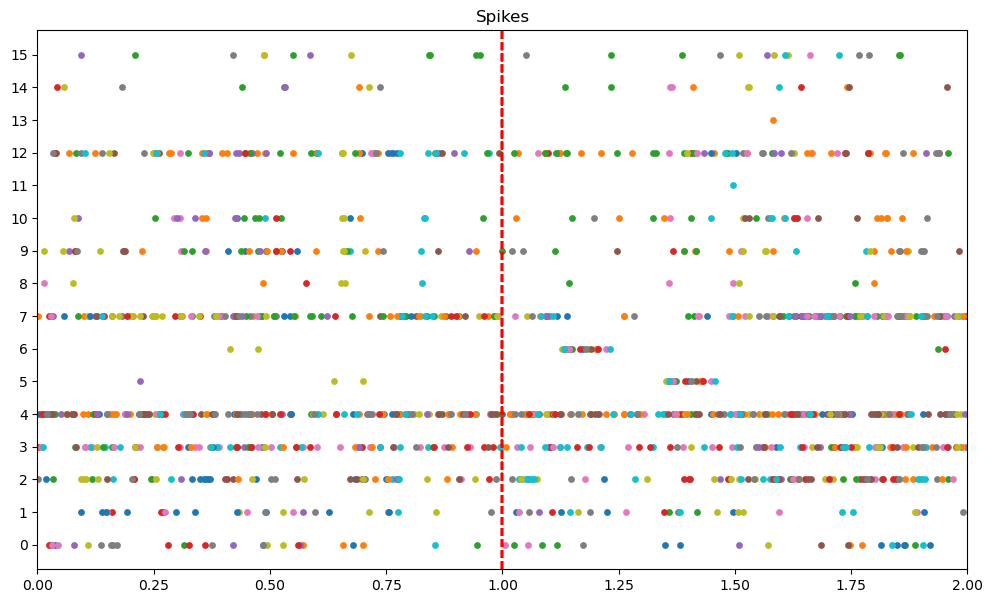

In [147]:
starting_row = 100
max_rows_to_plot = 20
i = 0
plt.figure(figsize=(12, 7))
random_sample = random.randint(0, len(ff_caught_T_sorted), max_rows_to_plot)
for time in ff_caught_T_sorted[random_sample]:
    i+=1
    duration = [time - 1, time + 1] 
    spike_subset = spike_df[(spike_df['time'] >= duration[0]) & (spike_df['time'] <= duration[1])]
    #print("Number of spikes plotted: ", len(spike_subset))
    
    spike_time = spike_subset.time
    spike_cluster_numbers = spike_subset.cluster
    spike_time = spike_time - duration[0]
    plt.scatter(spike_time, spike_cluster_numbers, s=15)
    plt.axvline(x=1, color='r', linestyle='--')
    # fix the yticks to be the cluster names    
    plt.xlim([0, duration[1]-duration[0]])
    plt.yticks(unique_clusters, unique_clusters)
    

    # cum_indices, cum_t, cum_angles, cum_mx, cum_my, cum_speed, cum_speeddummy = plot_behaviors.find_monkey_information_in_the_duration(duration, monkey_information)
    # step_to_mark = np.where(cum_t <= row.last_visible_time)[0][-1]
    # step_to_mark2 = np.where(cum_t >= row.caught_time)[0][0]

    # with basic_func.initiate_plot(10, 10, 100):
    #     fig = plt.figure()
    #     whether_plotted, axes, R, cum_mxy_rotate_1, shown_ff_indices_1 = plot_behaviors.PlotTrials(duration,
    #               *plot_behaviors.PlotTrials_args,
    #               **plot_chunks_kwargs3,
    #               minimal_margin=250,
    #               show_path_when_target_visible = True,
    #               currentTrial=row.target_index,
    #               #steps_to_be_marked = np.array([step_to_mark, step_to_mark2]),
    #               num_trials=2,
    #               fig=fig)



    if i == max_rows_to_plot:
        break

plt.title("Spikes")
plt.show()
plt.close()

### Stop (whether or not resulting in a capture?)

In [148]:
monkey_information_subset = monkey_information[monkey_information['monkey_speeddummy'] == 0]

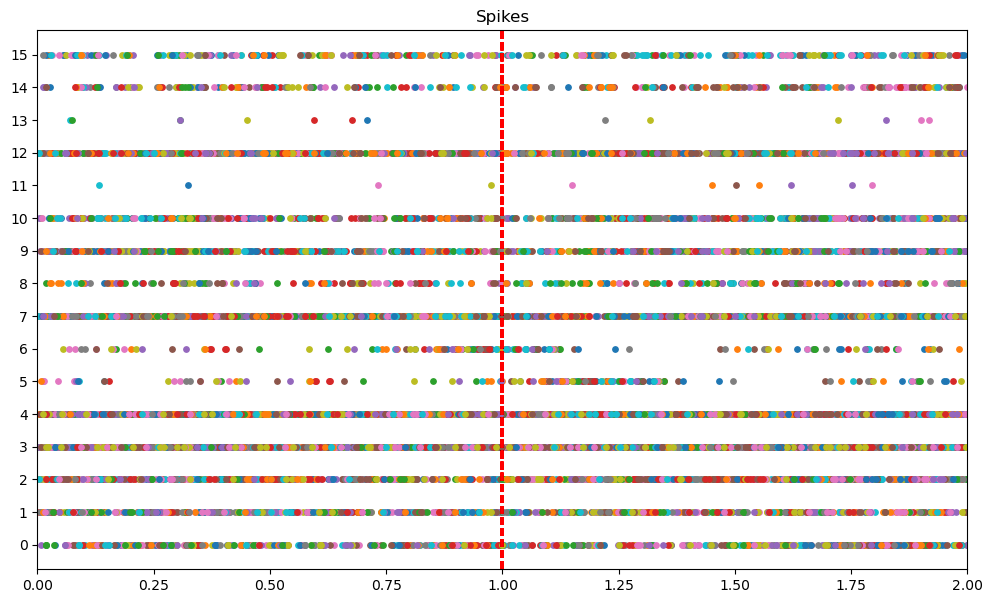

In [149]:
starting_row = 600
max_rows_to_plot = 200
interval_half_length = 1
i = 0
plt.figure(figsize=(12, 7))

random_sample = random.randint(0, len(monkey_information_subset), max_rows_to_plot)
for time in monkey_information_subset.monkey_t.iloc[random_sample]:
    i+=1
    duration = [time - interval_half_length, time + interval_half_length] 
    spike_subset = spike_df[(spike_df['time'] >= duration[0]) & (spike_df['time'] <= duration[1])]
    spike_time = spike_subset.time
    spike_cluster_numbers = spike_subset.cluster
    spike_time = spike_time - duration[0]
    plt.scatter(spike_time, spike_cluster_numbers, s=15)
    plt.axvline(x=interval_half_length, color='r', linestyle='--')  
    plt.xlim([0, duration[1]-duration[0]])
    plt.yticks(unique_clusters, unique_clusters)
    

    if i == max_rows_to_plot:
        break

plt.title("Spikes")
plt.show()
plt.close()

### High speed

In [150]:
monkey_information_subset = monkey_information[monkey_information['monkey_speed'] > 100]
monkey_information_subset

monkey_t  monkey_x  monkey_y  monkey_speed  monkey_angles  monkey_dw  \
1484       24.86     -0.06     25.69        123.54          -1.32       0.87   
1485       24.87      0.58     23.57        145.69          -1.31       1.05   
1486       24.89      1.16     21.07        152.31          -1.32       1.21   
1487       24.91      1.87     18.54        154.22          -1.26       1.35   
1488       24.92      2.76     16.13        158.68          -1.21       1.48   
...          ...       ...       ...           ...            ...        ...   
219070   3598.94   -315.68    245.21        197.13           1.01       0.65   
219071   3598.95   -313.87    248.02        189.52           0.99       0.59   
219072   3598.97   -312.10    250.63        180.12           1.00       0.56   
219073   3598.99   -310.76    252.90        155.76           1.04       0.51   
219074   3599.00   -309.49    255.11        130.15           1.05       0.30   

         LDy    LDz   RDy   RDz  ...  crossing_boundary  time_box  \
1484   15.49  -4.39 10.35 -2.32  ...                  0      1484   
1485   15.47  -4.29 10.37 -2.30  ...                  0      1485   
1486   15.46  -4.10 10.34 -2.21  ...                  0      1486   
1487   15.37  -3.83 10.30 -2.11  ...                  0      1487   
1488   15.14  -3.75 10.27 -2.02  ...                  0      1488   
...      ...    ...   ...   ...  ...                ...       ...   
219070  4.21 -10.39  2.14 -8.82  ...                  0    219070   
219071  3.71  -8.94  2.00 -8.93  ...                  0    219071   
219072  3.79 -11.26  1.75 -8.75  ...                  0    219072   
219073  3.70 -11.35  1.66 -8.97  ...                  0    219073   
219074  3.39 -11.70  1.35 -8.95  ...                  0    219074   

        gaze_monkey_view_x  gaze_monkey_view_y  gaze_world_x  gaze_world_y  \
1484                  7.35             -188.18          7.29       -162.49   
1485                  9.83             -190.56         10.41       -166.99   
1486                  7.89             -199.01          9.05       -177.94   
1487                 21.53             -208.83         23.40       -190.29   
1488                 33.14             -215.28         35.91       -199.14   
...                    ...                 ...           ...           ...   
219070               34.62               48.37       -281.06        293.58   
219071               38.09               50.92       -275.78        298.95   
219072               33.68               46.72       -278.42        297.35   
219073               31.16               47.20       -279.60        300.09   
219074               29.99               47.14       -279.49        302.25   

        monkey_ddw  monkey_ddv  turning_right    bin  
1484          0.20       25.82              0     99  
1485          0.17       14.39              0     99  
1486          0.15        4.27              0     99  
1487          0.14        3.18              0     99  
1488          0.09        5.12              0     99  
...            ...         ...            ...    ...  
219070       -0.04       -5.22              0  14395  
219071       -0.04       -8.50              0  14395  
219072       -0.04      -16.88              0  14395  
219073       -0.13      -24.99              0  14395  
219074       -0.15      -35.82              0  14396  

[127143 rows x 21 columns]

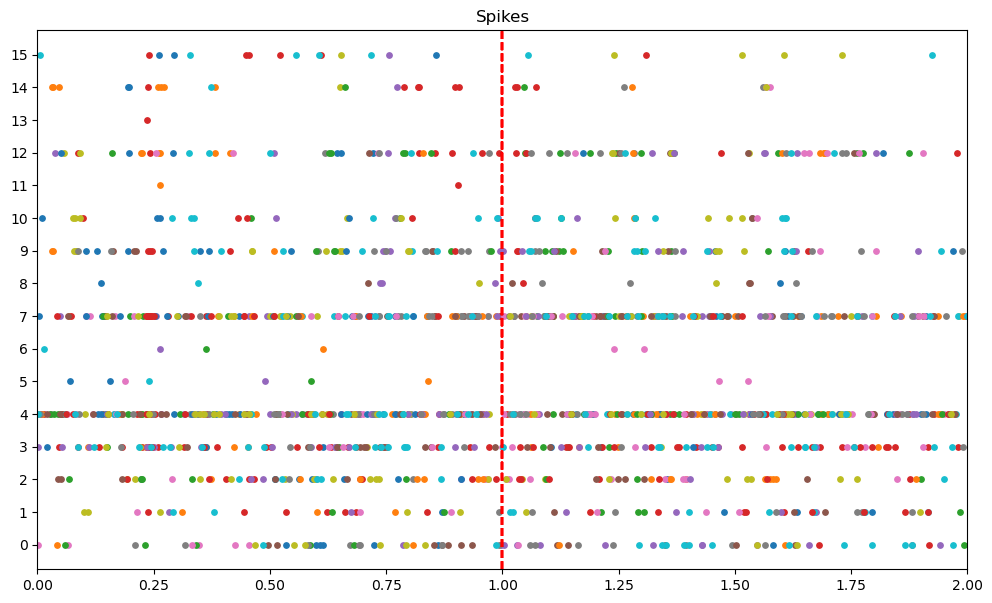

In [151]:
starting_row = 600
max_rows_to_plot = 20
interval_half_length = 1
i = 0
plt.figure(figsize=(12, 7))
random_sample = random.randint(0, len(monkey_information_subset), max_rows_to_plot)
for time in monkey_information_subset.monkey_t.iloc[random_sample]:
    i+=1
    duration = [time - interval_half_length, time + interval_half_length] 
    spike_subset = spike_df[(spike_df['time'] >= duration[0]) & (spike_df['time'] <= duration[1])]
    #print("Number of spikes plotted: ", len(spike_subset))
    
    spike_time = spike_subset.time
    spike_cluster_numbers = spike_subset.cluster
    spike_time = spike_time - duration[0]
    plt.scatter(spike_time, spike_cluster_numbers, s=15)
    plt.axvline(x=interval_half_length, color='r', linestyle='--')
    # fix the yticks to be the cluster names    
    plt.xlim([0, duration[1]-duration[0]])
    plt.yticks(unique_clusters, unique_clusters)



    if i == max_rows_to_plot:
        break

plt.title("Spikes")
plt.show()
plt.close()

### Visible_before_last_one instances

In [152]:
filepath = os.path.join(data_instance.data_folder_name, 'target_cluster_df.csv')
#target_cluster_df.to_csv(filepath)

if exists(filepath):
    target_cluster_df = pd.read_csv(filepath).drop(["Unnamed: 0"], axis=1)

In [153]:
target_cluster_df['caught_time'] = ff_caught_T_sorted[target_cluster_df.target_index]
target_cluster_df['prev_caught_time'] = ff_caught_T_sorted[target_cluster_df.target_index-1]
target_cluster_df.loc[0, 'prev_caught_time'] = 0
target_cluster_df['last_visible_time'] = target_cluster_df['caught_time'] - target_cluster_df['time_since_last_visible']
target_cluster_df['trial_duration'] = target_cluster_df['caught_time'] - target_cluster_df['prev_caught_time']

target_cluster_subset = target_cluster_df[target_cluster_df['last_visible_time'] < target_cluster_df['prev_caught_time']-0.1]
target_cluster_subset = target_cluster_subset[target_cluster_subset['caught_time'] != target_cluster_subset['prev_caught_time']]
target_cluster_subset = target_cluster_subset[target_cluster_subset['trial_duration'] < 25]

target_cluster_subset[['target_index', 'time_since_last_visible', 'last_visible_time', 'caught_time', 'prev_caught_time']]

target_index  time_since_last_visible  last_visible_time  caught_time  \
21              22                     2.66              93.27        95.92   
33              34                     1.86             113.14       114.99   
34              35                     0.83             114.86       115.69   
51              52                     0.88             151.03       151.91   
70              71                     0.85             192.15       193.00   
...            ...                      ...                ...          ...   
1273          1277                     2.56            3410.85      3413.40   
1277          1281                     0.71            3429.60      3430.32   
1290          1294                     1.83            3469.64      3471.47   
1306          1310                     2.32            3525.82      3528.14   
1314          1318                     2.12            3541.85      3543.98   

      prev_caught_time  
21               94.71  
33              113.38  
34              114.99  
51              151.17  
70              192.35  
...                ...  
1273           3411.03  
1277           3430.30  
1290           3469.99  
1306           3525.93  
1314           3543.11  

[123 rows x 5 columns]

In [154]:
unique_clusters = spike_df.cluster.unique()
unique_clusters = np.sort(unique_clusters)

spike_df.groupby('cluster').count()

time
cluster       
0         7336
1         9733
2        17801
3        32107
4        43339
5         1541
6         1544
7        30007
8         3384
9        12324
10        9437
11         179
12       13523
13          97
14        4210
15        4659

In [155]:
plot_behaviors.PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_sorted)


plot_polar_args = (monkey_information,
                    ff_dataframe, 
                    ff_life_sorted,
                    ff_real_position_sorted,
                    ff_caught_T_sorted,
                    ff_flash_sorted,)

plot_chunks_kwargs1 = plot_chunks_kwargs.copy()
plot_chunks_kwargs1['trail_color_var'] = None
plot_chunks_kwargs1['show_colorbar'] = False
plot_chunks_kwargs1['show_alive_fireflies'] = False
plot_chunks_kwargs1['show_legend'] = True
plot_chunks_kwargs1['vary_color_for_connecting_path_ff'] = True
plot_chunks_kwargs1['show_null_agent_trajectory'] = True
plot_chunks_kwargs1['show_null_agent_trajectory_2nd_time'] = True



plot_chunks_kwargs3 = plot_chunks_kwargs1.copy()
plot_chunks_kwargs3['show_null_agent_trajectory'] = False
plot_chunks_kwargs3['show_null_agent_trajectory_2nd_time'] = False

Number of spikes plotted:  12171


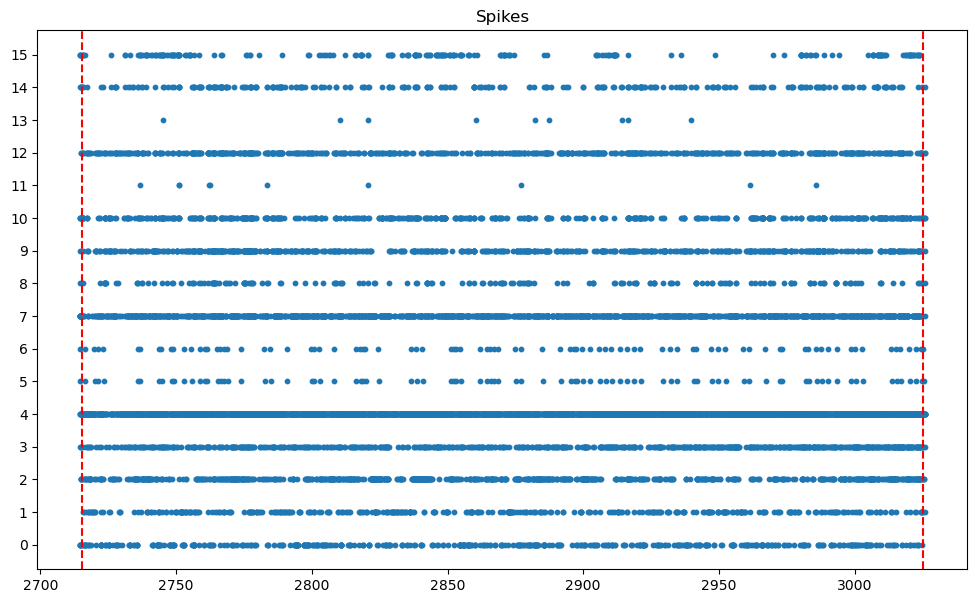

Number of spikes plotted:  10121


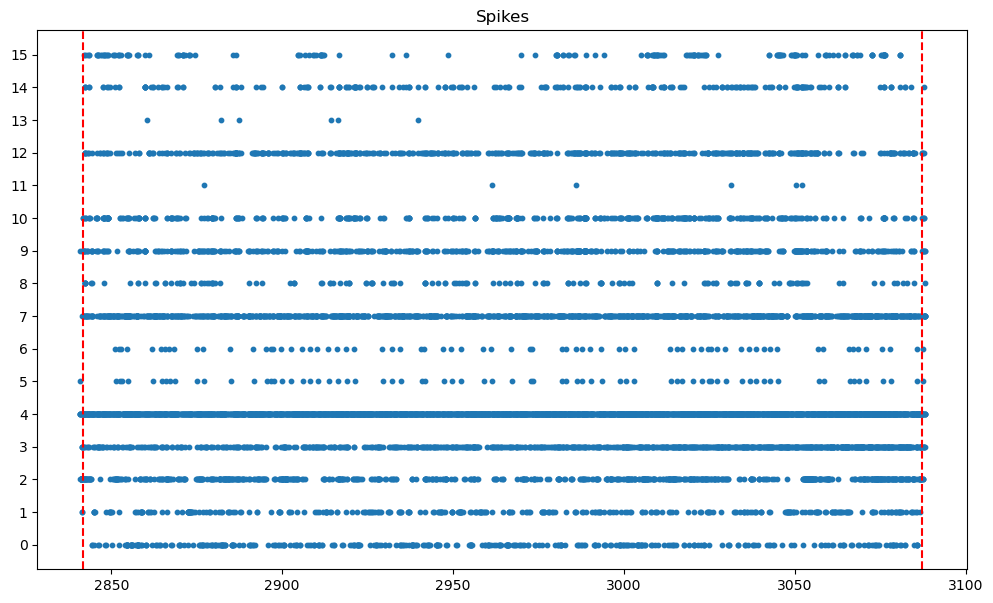

In [156]:
starting_row = 100
max_rows_to_plot = 2
i = 0
for index, row in target_cluster_subset.iloc[starting_row:starting_row+max_rows_to_plot].iterrows():
    i+=1
    duration = [row.last_visible_time - 1, row.caught_time + 1] 
    spike_subset = spike_df[(spike_df['time'] >= duration[0]) & (spike_df['time'] <= duration[1])]
    print("Number of spikes plotted: ", len(spike_subset))
    plt.figure(figsize=(12, 7))
    spike_cluster_numbers = spike_subset.cluster
    plt.scatter(spike_subset.time, spike_cluster_numbers, s=10)
    plt.axvline(x=row.last_visible_time, color='r', linestyle='--')
    plt.axvline(x=row.caught_time, color='r', linestyle='--')
    # fix the yticks to be the cluster names
    plt.yticks(spike_cluster_numbers.unique(), spike_cluster_numbers.unique())
    plt.title("Spikes")
    plt.show()
    plt.close()


    cum_indices, cum_t, cum_angles, cum_mx, cum_my, cum_speed, cum_speeddummy = plot_behaviors.find_monkey_information_in_the_duration(duration, monkey_information)
    step_to_mark = np.where(cum_t <= row.last_visible_time)[0][-1]
    step_to_mark2 = np.where(cum_t >= row.caught_time)[0][0]

    # with basic_func.initiate_plot(10, 10, 100):
    #     fig = plt.figure()
    #     whether_plotted, axes, R, cum_mxy_rotate_1, shown_ff_indices_1 = plot_behaviors.PlotTrials(duration,
    #               *plot_behaviors.PlotTrials_args,
    #               **plot_chunks_kwargs3,
    #               minimal_margin=250,
    #               show_path_when_target_visible = True,
    #               currentTrial=row.target_index,
    #               steps_to_be_marked = np.array([step_to_mark, step_to_mark2]),
    #               num_trials=2,
    #               fig=fig)


    plt.show()
    plt.close()


    if i == max_rows_to_plot:
        break

### Just try it randomly

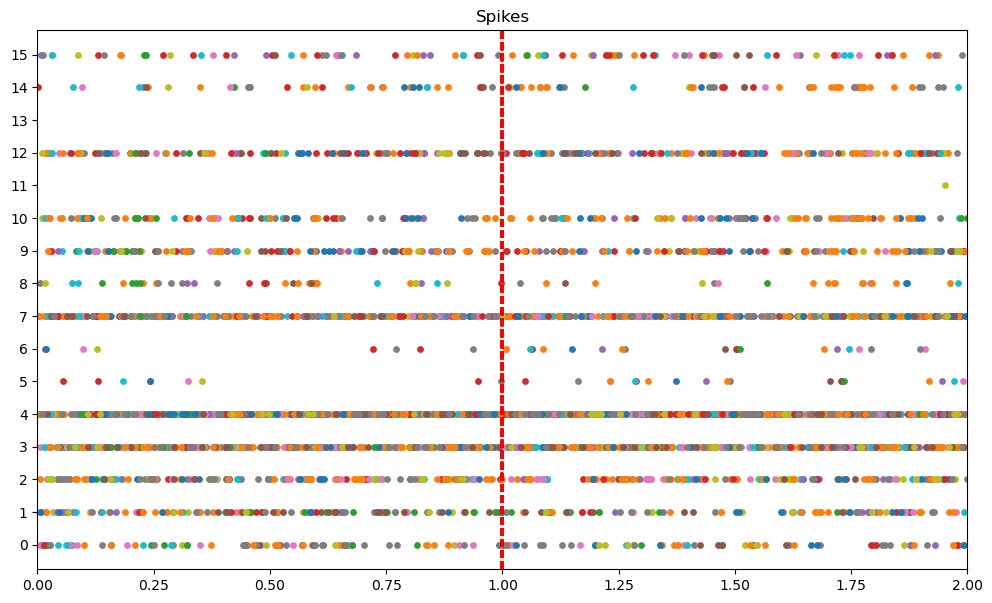

In [157]:
starting_row = 300
max_rows_to_plot = 100
interval_half_length = 1
i = 0
plt.figure(figsize=(12, 7))
for time in random.uniform(100, 10000, max_rows_to_plot):
    i+=1
    duration = [time - interval_half_length, time + interval_half_length] 
    spike_subset = spike_df[(spike_df['time'] >= duration[0]) & (spike_df['time'] <= duration[1])]
    spike_time = spike_subset.time
    spike_cluster_numbers = spike_subset.cluster
    spike_time = spike_time - duration[0]
    plt.scatter(spike_time, spike_cluster_numbers, s=15)
    plt.axvline(x=interval_half_length, color='r', linestyle='--')  
    plt.xlim([0, duration[1]-duration[0]])
    plt.yticks(unique_clusters, unique_clusters)
    

    if i == max_rows_to_plot:
        break

plt.title("Spikes")
plt.show()
plt.close()

## Linear regression

y_var: bin


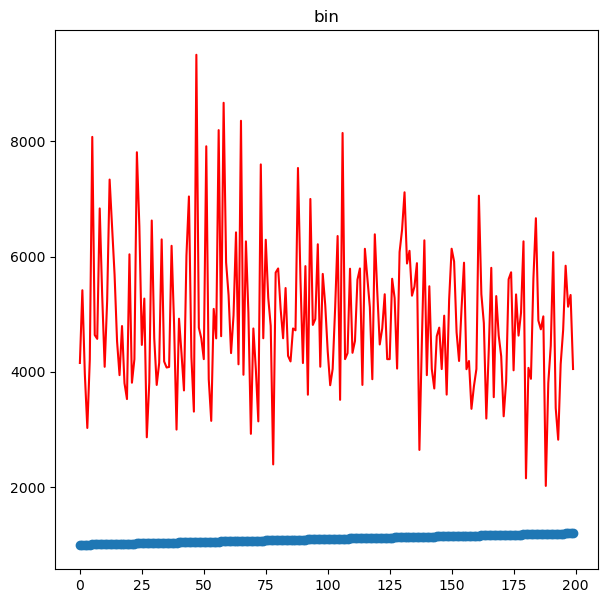

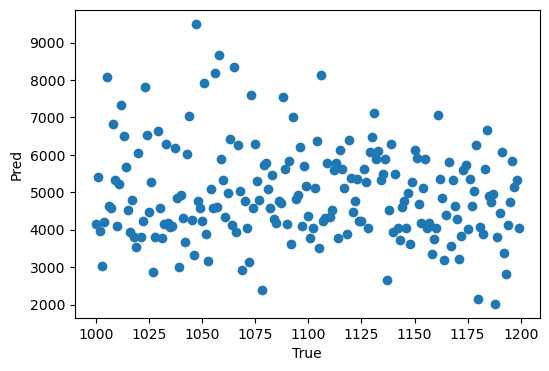

y_var: LDy


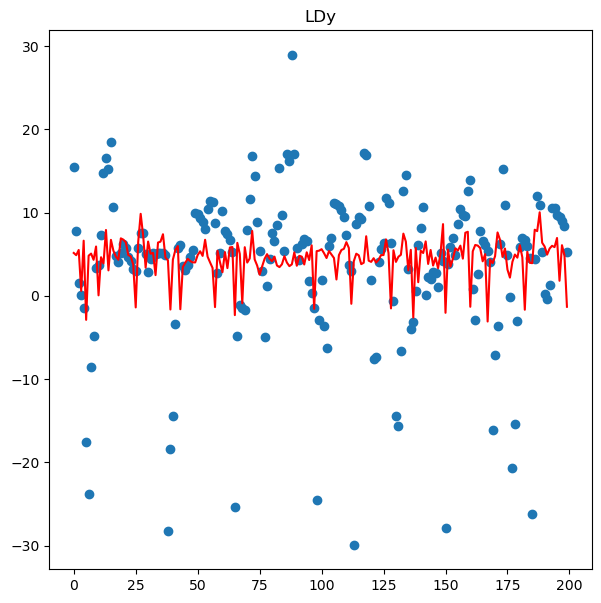

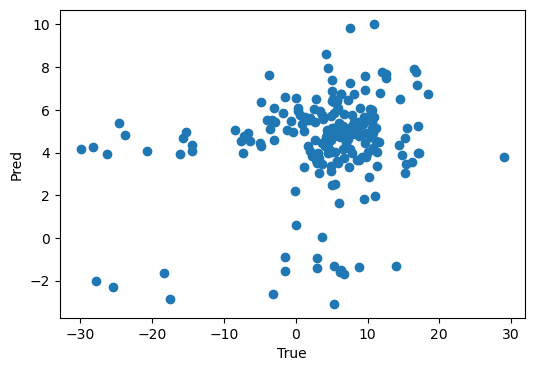

y_var: LDz


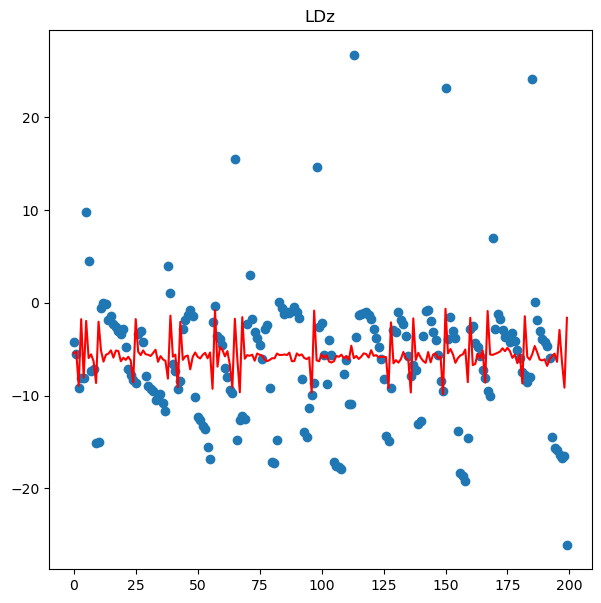

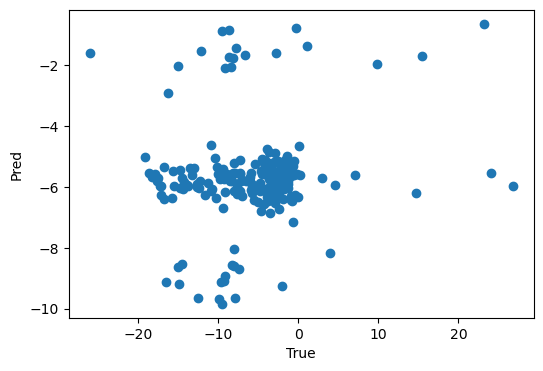

y_var: RDy


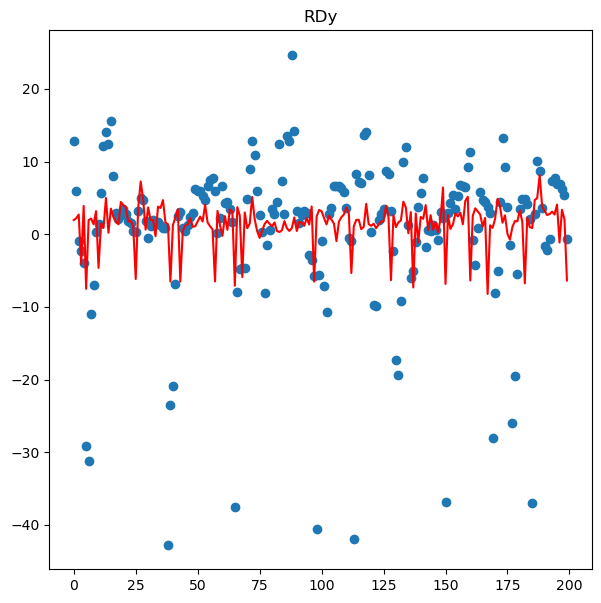

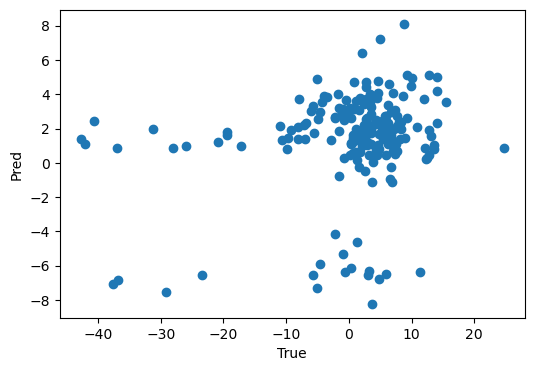

y_var: RDz


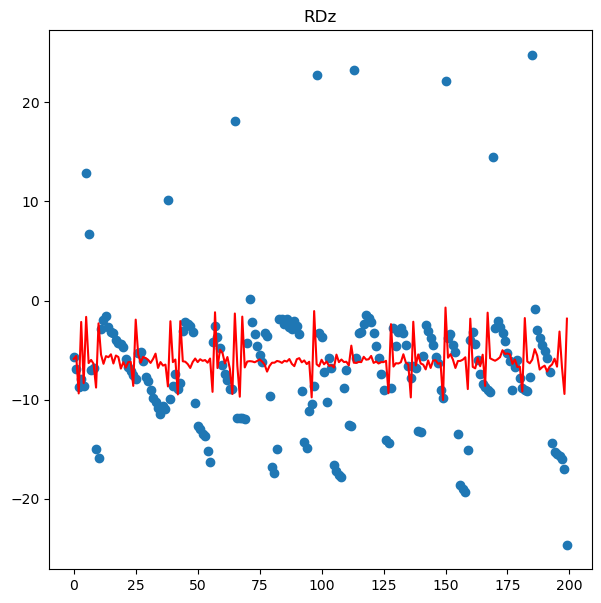

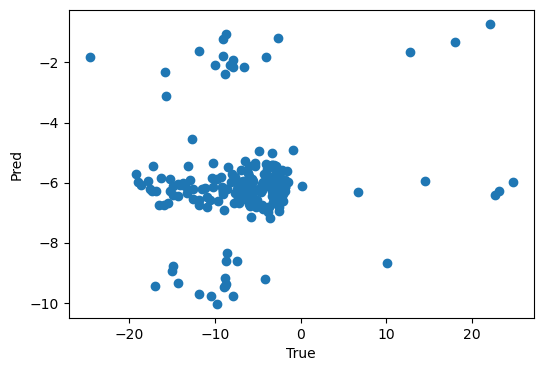

y_var: gaze_monkey_view_x


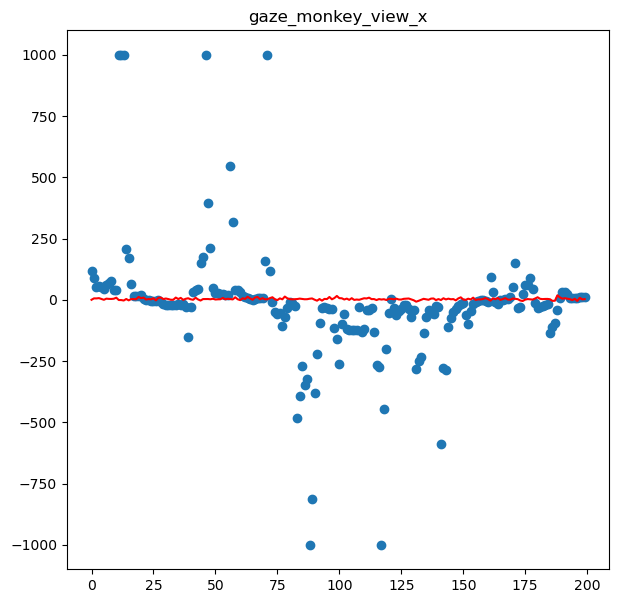

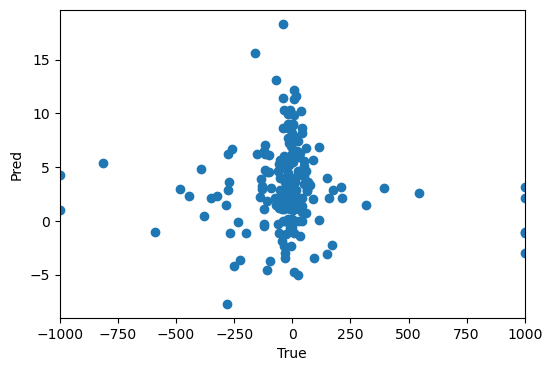

y_var: gaze_monkey_view_y


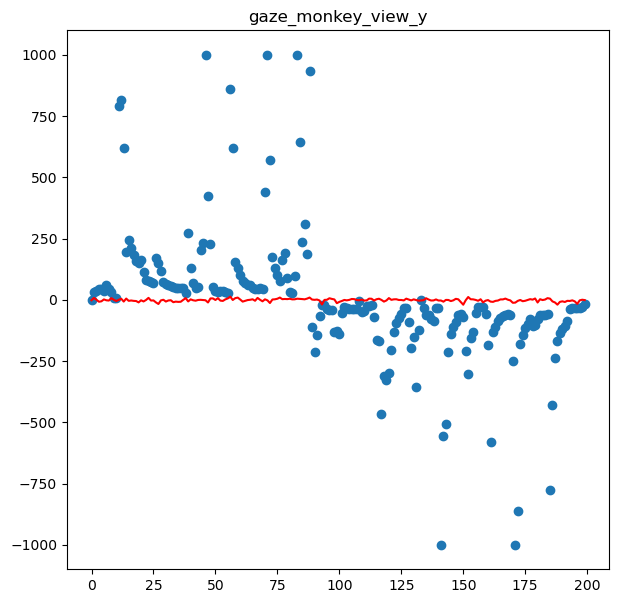

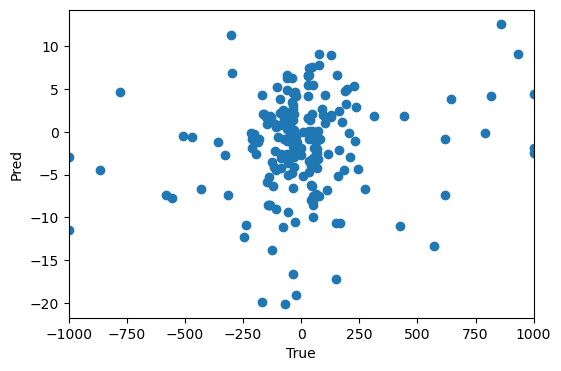

y_var: gaze_world_x


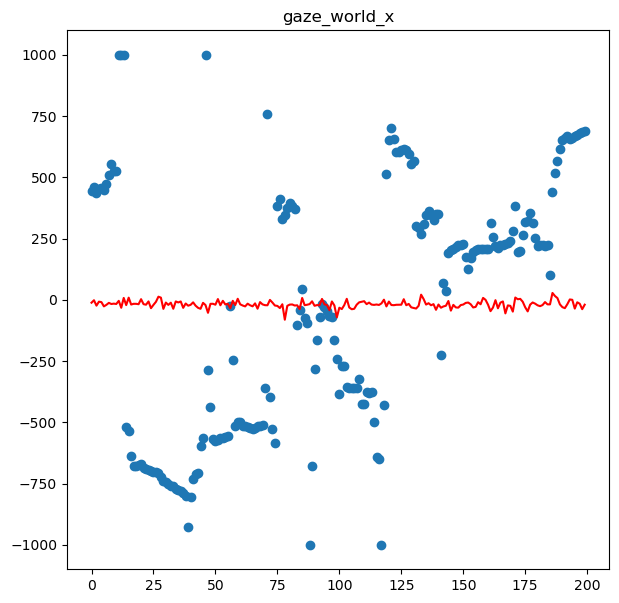

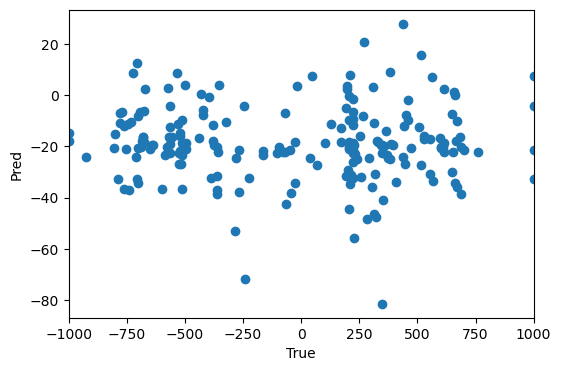

y_var: gaze_world_y


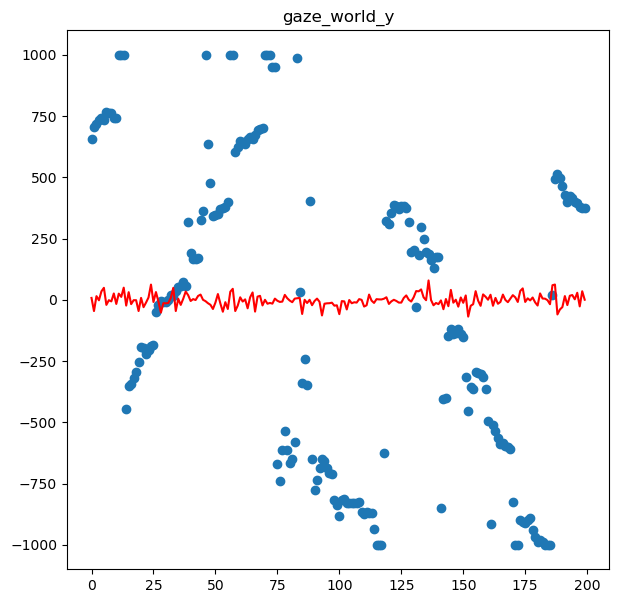

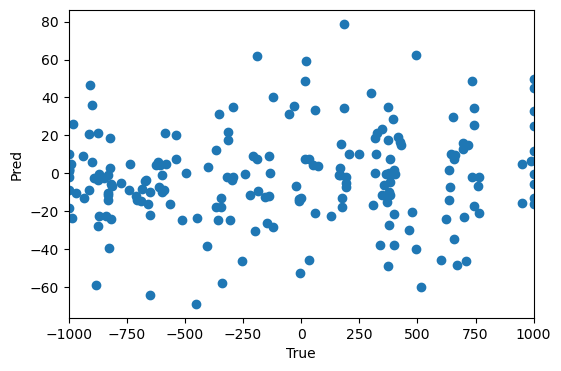

y_var: monkey_speed


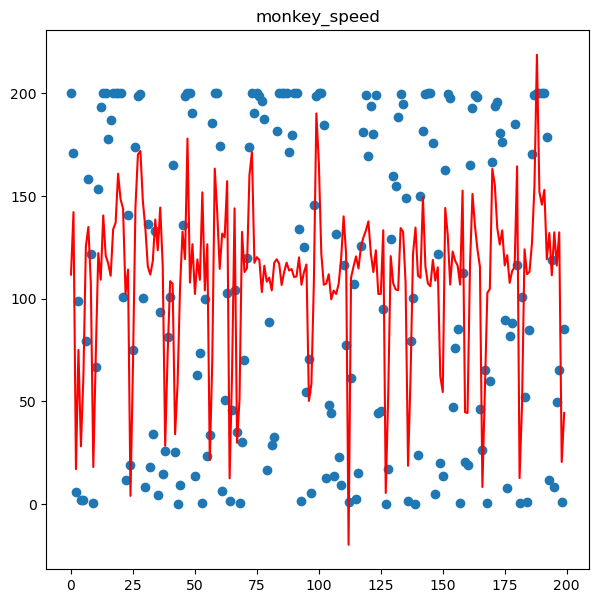

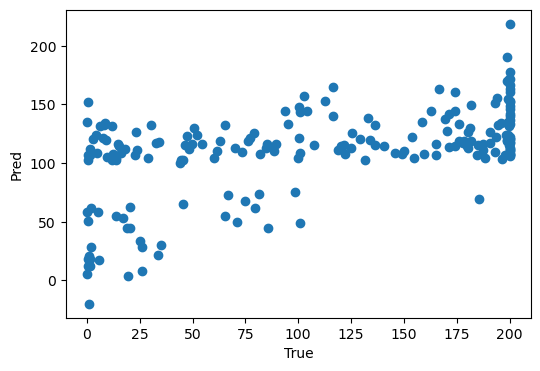

y_var: monkey_angles


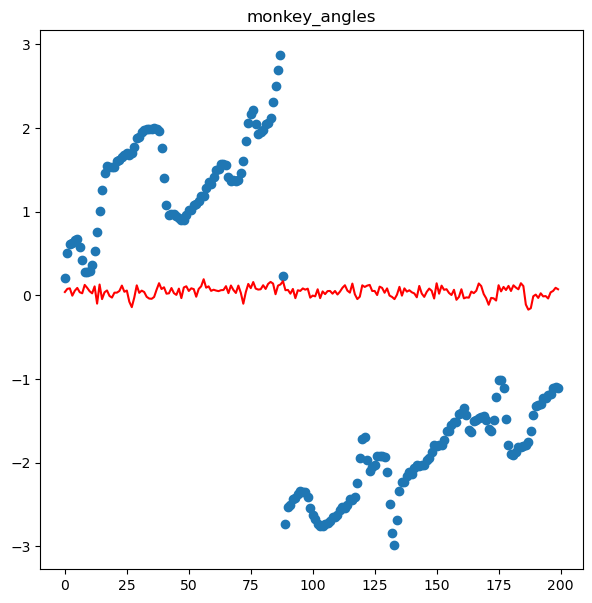

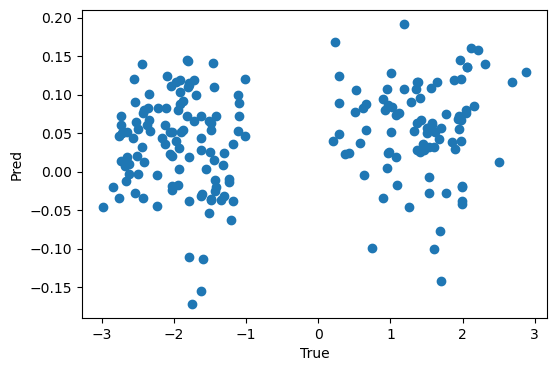

y_var: monkey_dw


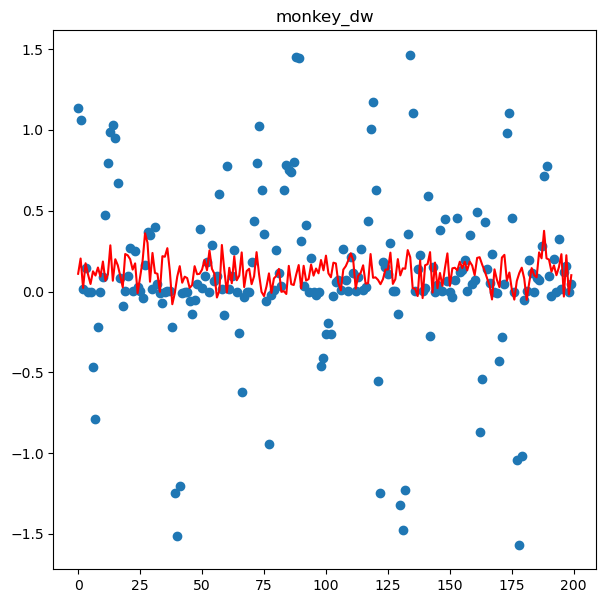

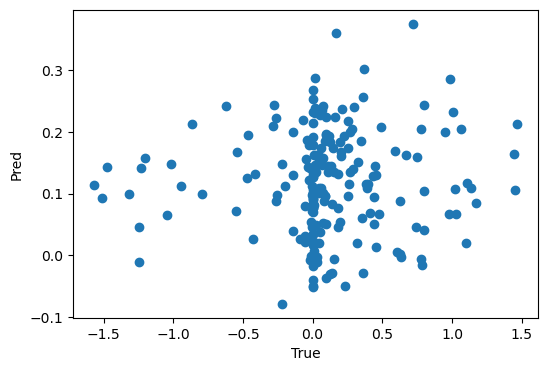

y_var: monkey_speeddummy


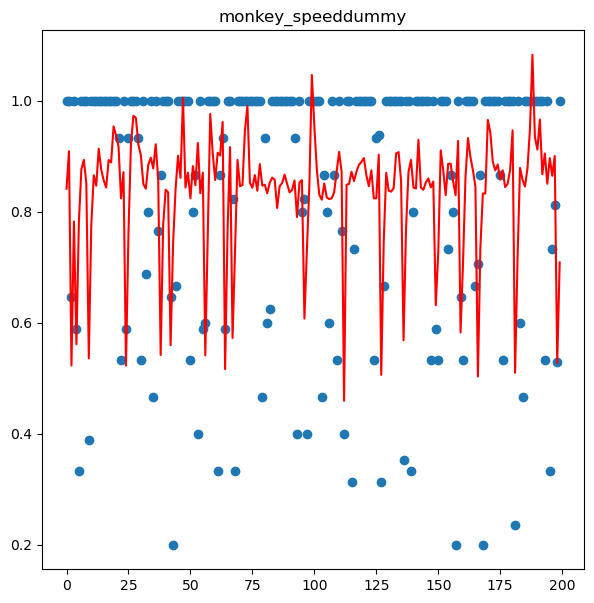

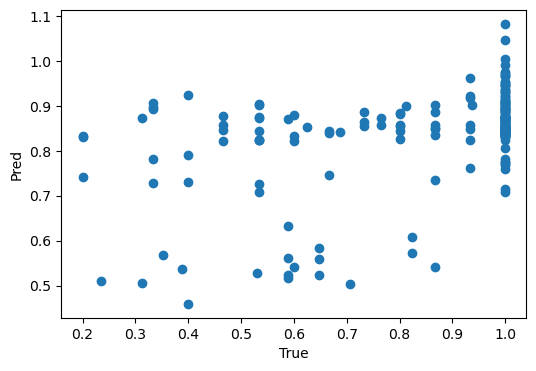

y_var: monkey_ddw


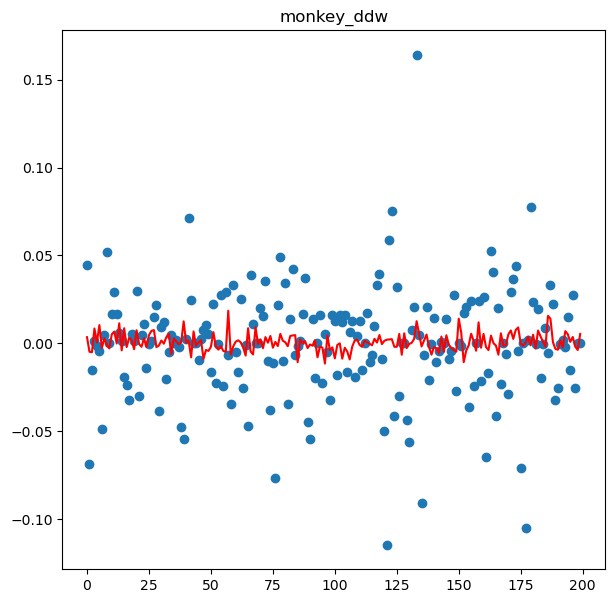

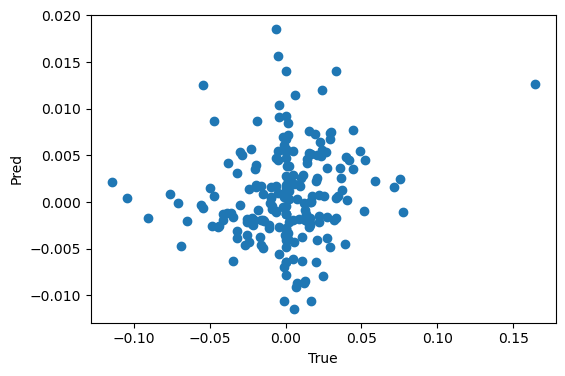

y_var: monkey_ddv


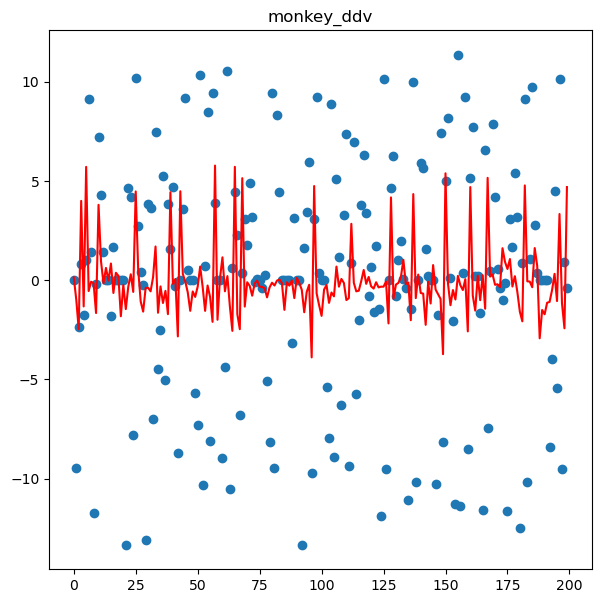

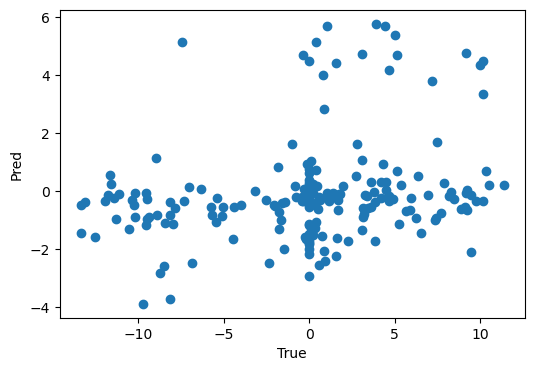

y_var: num_stops


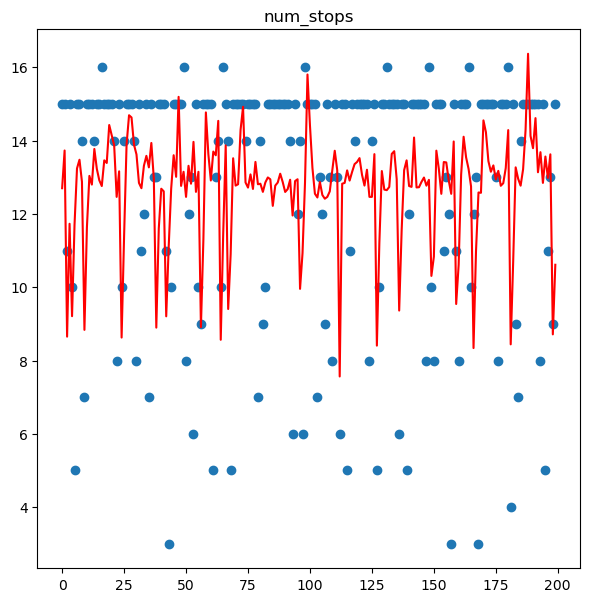

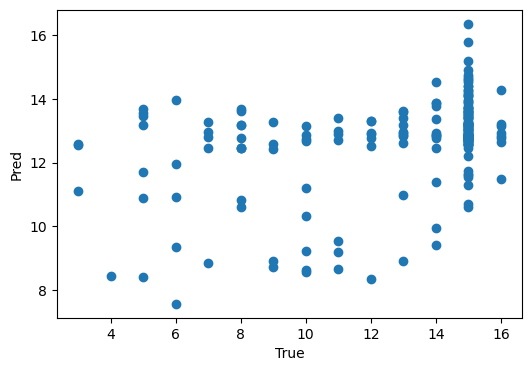

y_var: num_caught_ff


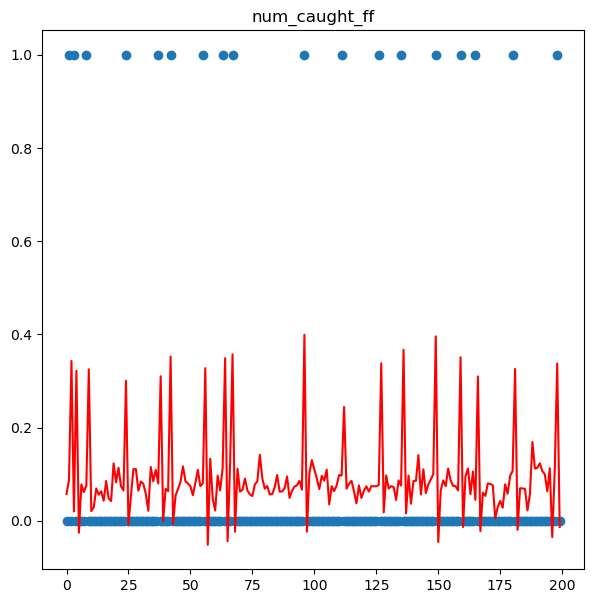

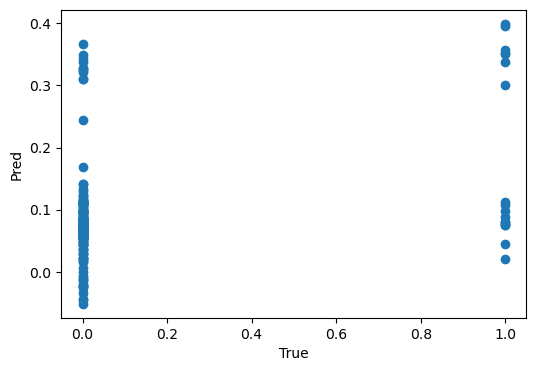

y_var: stop_rate


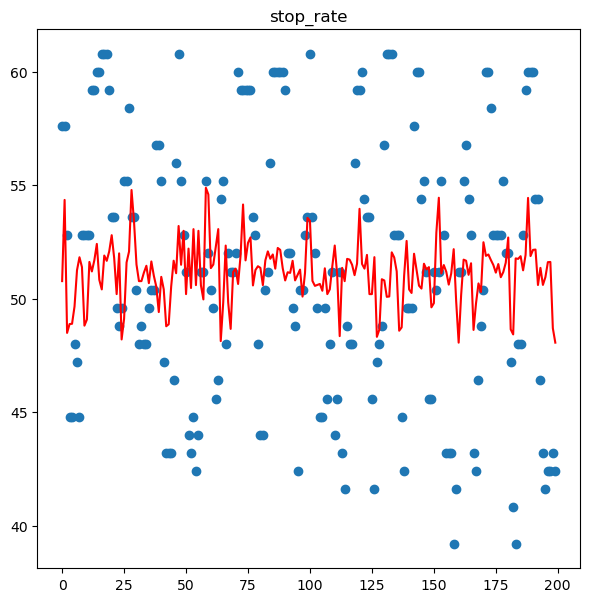

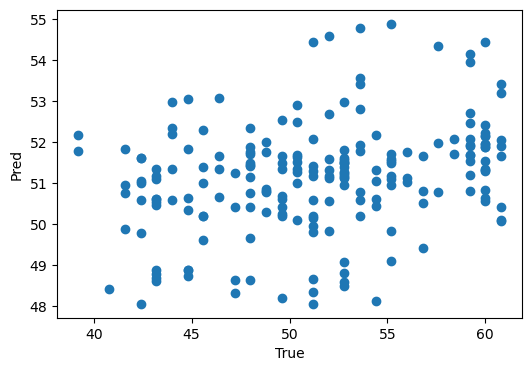

y_var: stop_success_rate


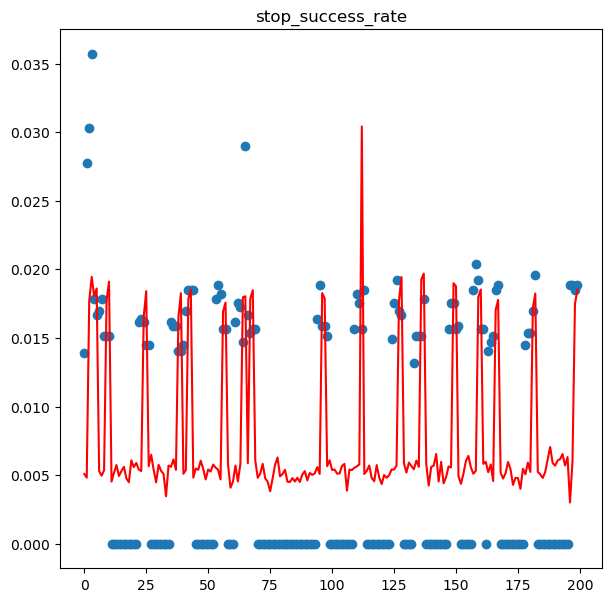

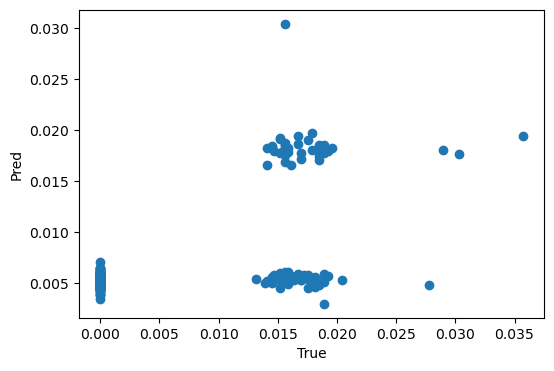

y_var: num_ff


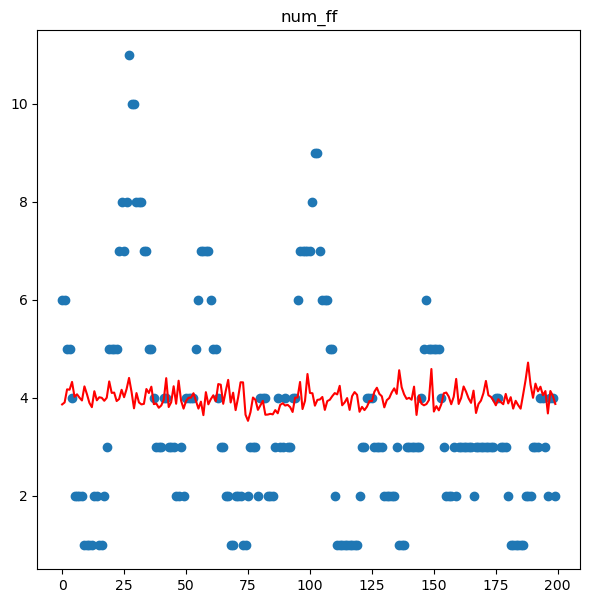

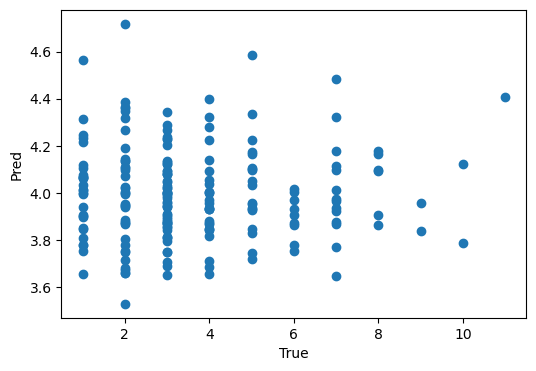

y_var: num_visible_ff


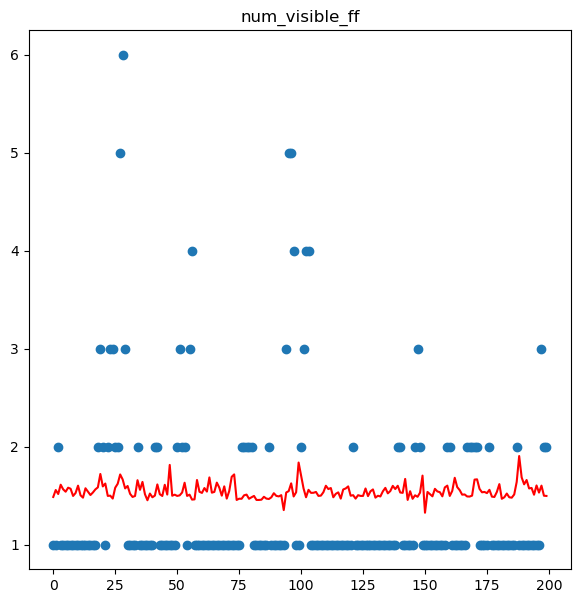

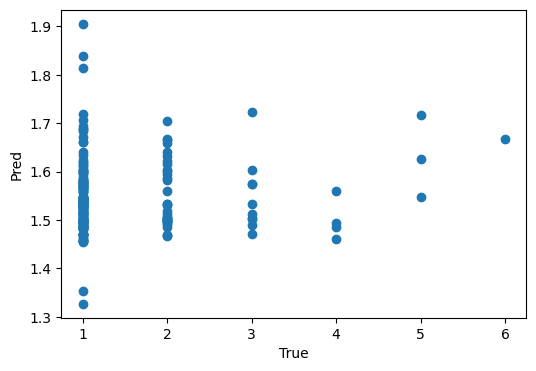

y_var: min_ff_distance


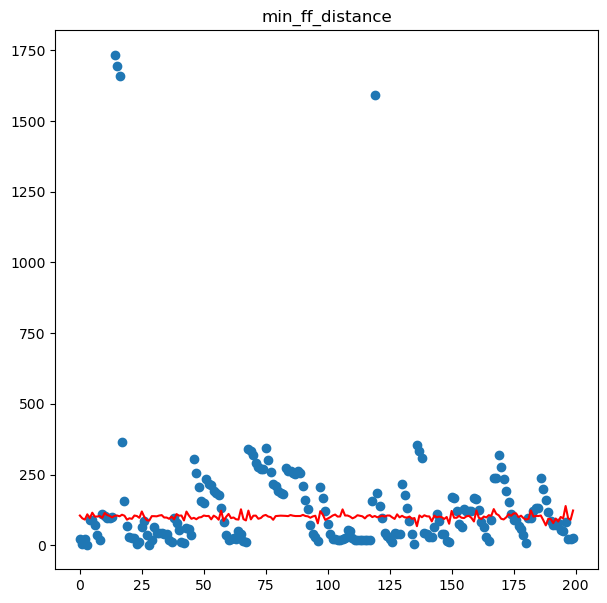

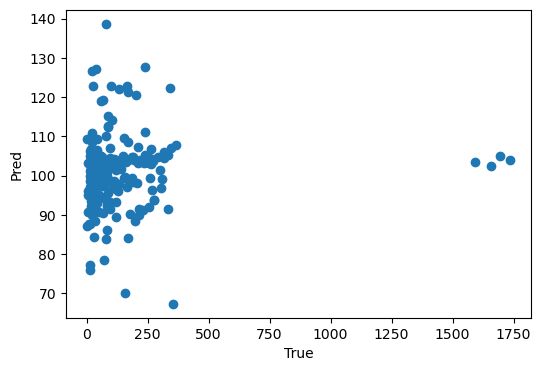

y_var: min_abs_ff_angle


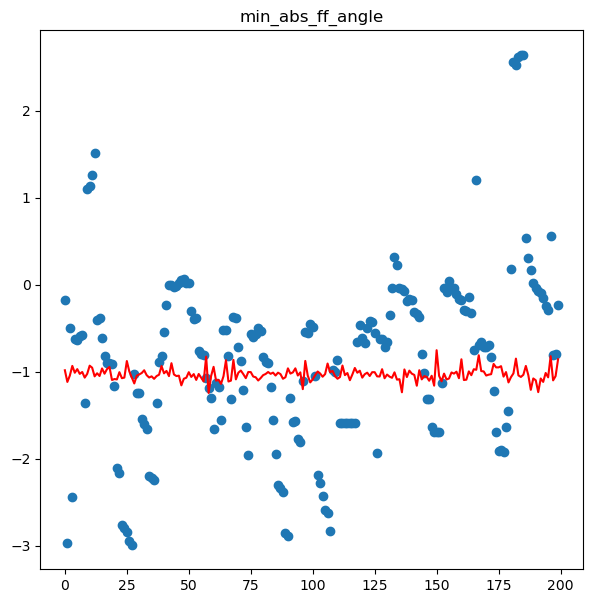

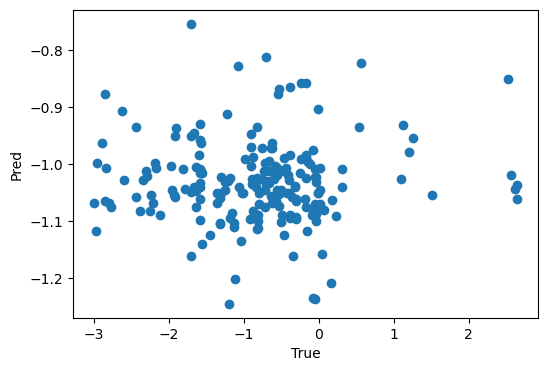

y_var: min_abs_ff_angle_boundary


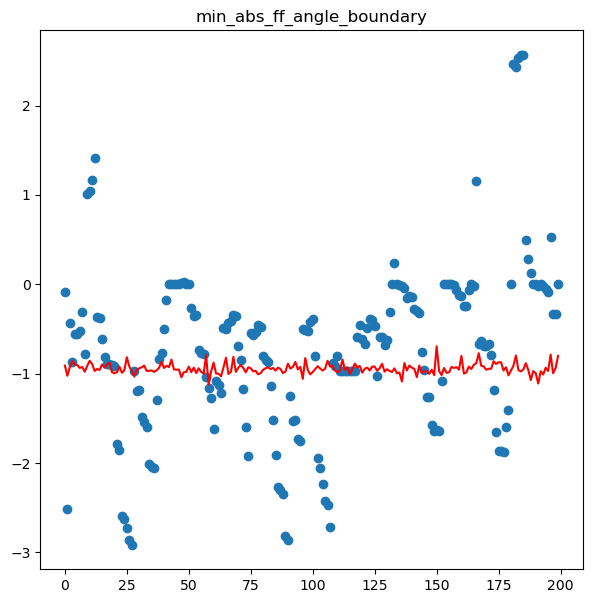

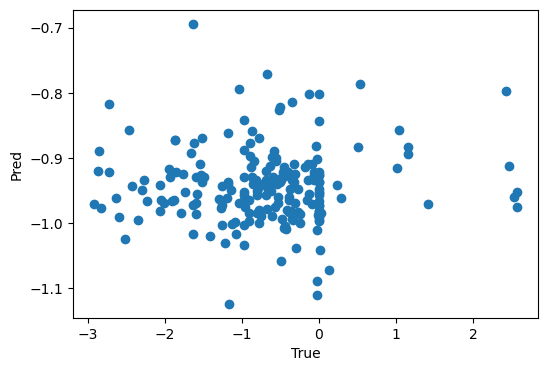

y_var: min_visible_ff_distance


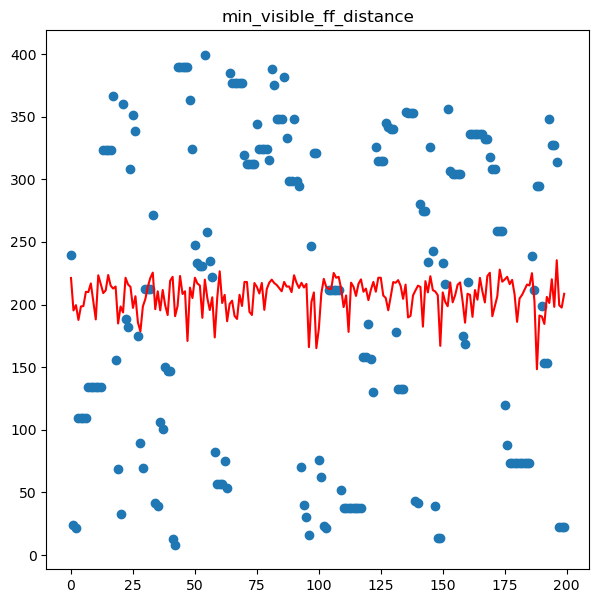

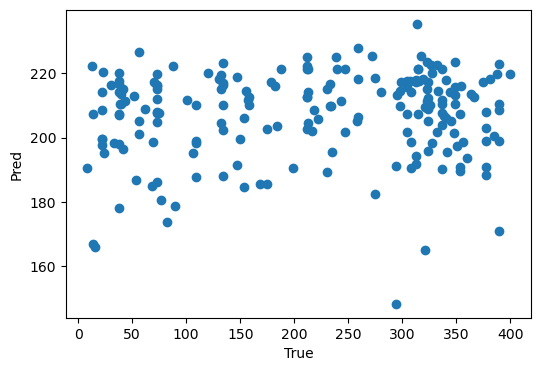

y_var: min_abs_visible_ff_angle


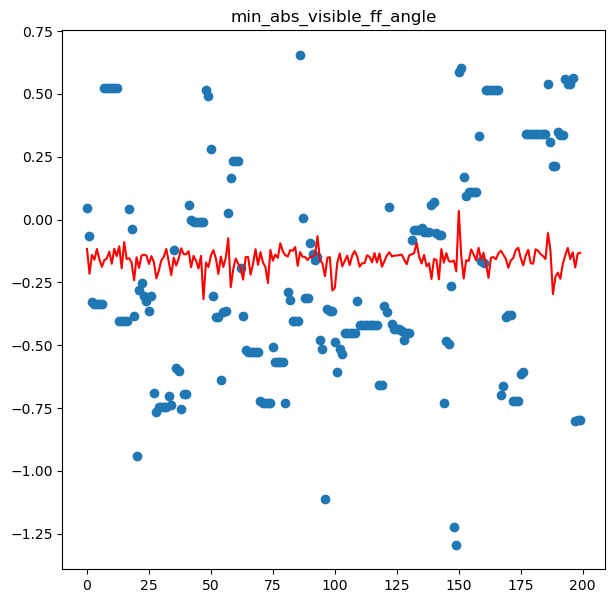

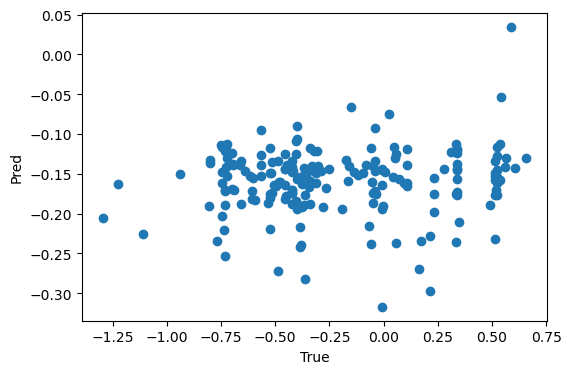

y_var: min_abs_visible_ff_angle_boundary


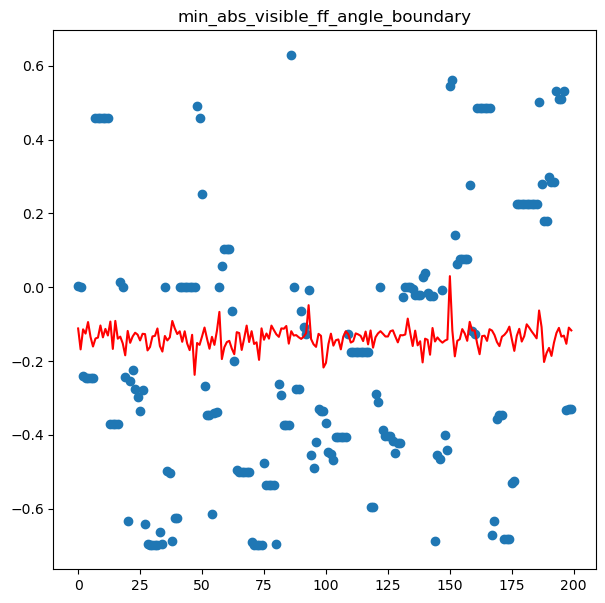

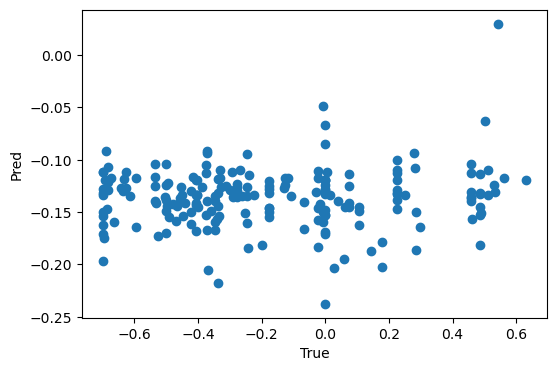

y_var: avg_target_distance


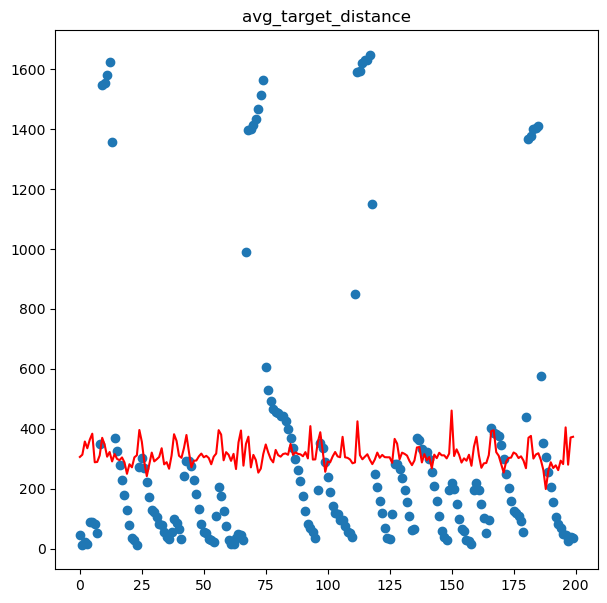

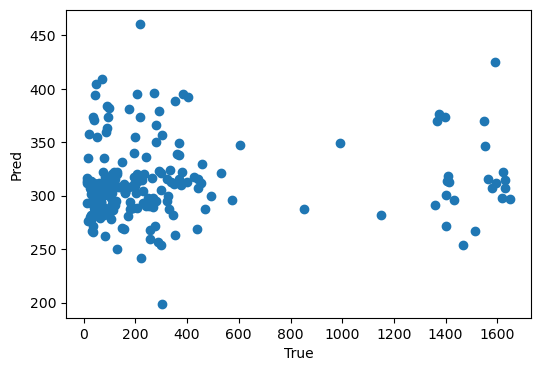

y_var: avg_target_angle


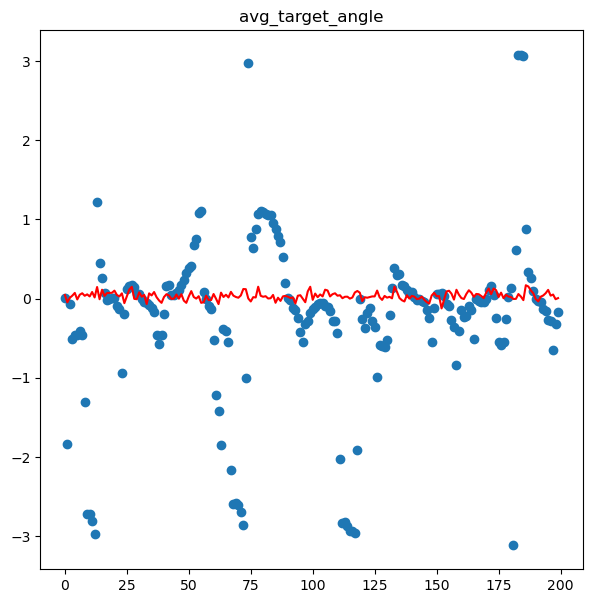

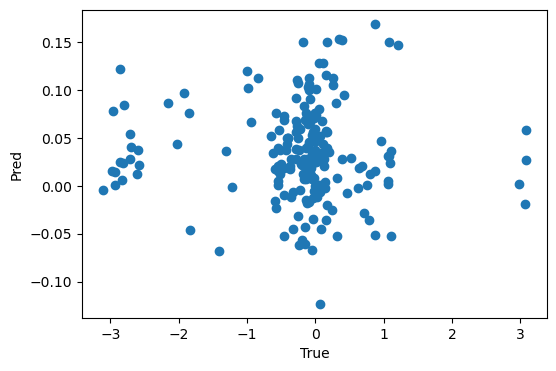

y_var: avg_target_angle_to_boundary


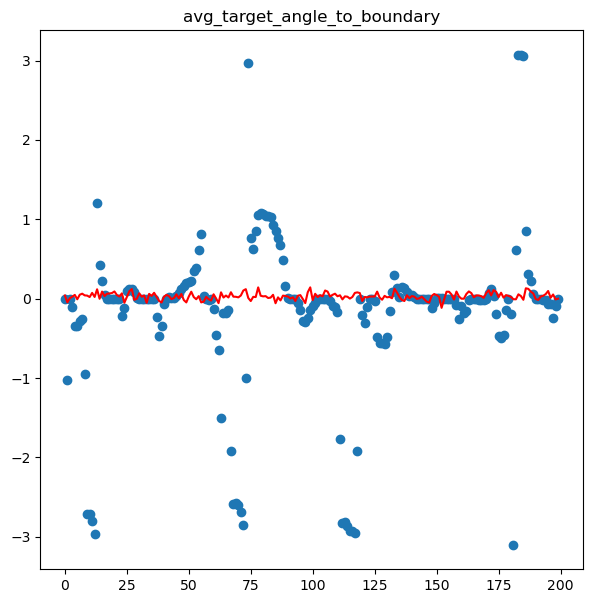

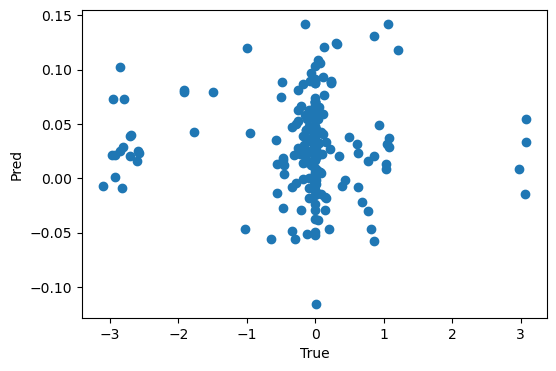

y_var: avg_target_last_seen_time


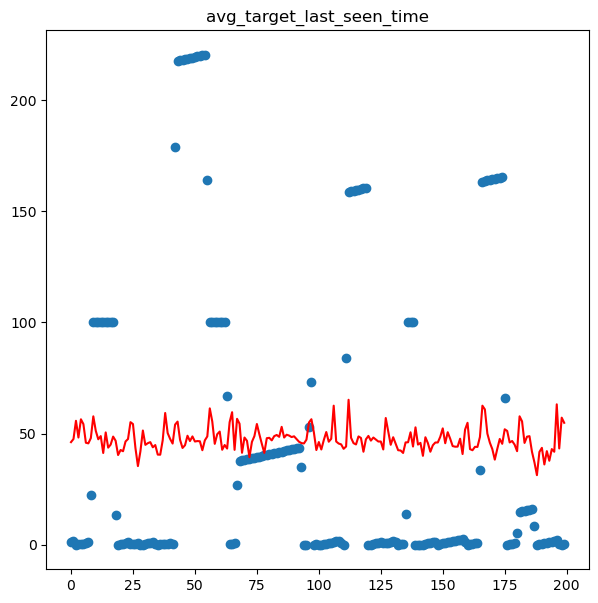

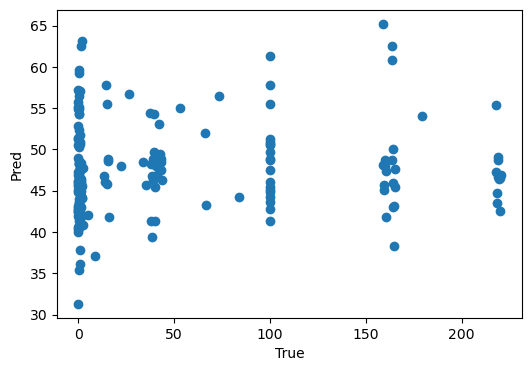

y_var: avg_target_last_seen_distance


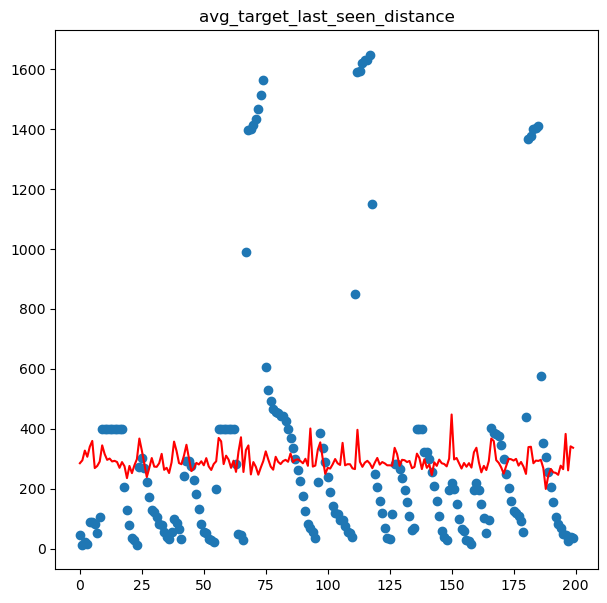

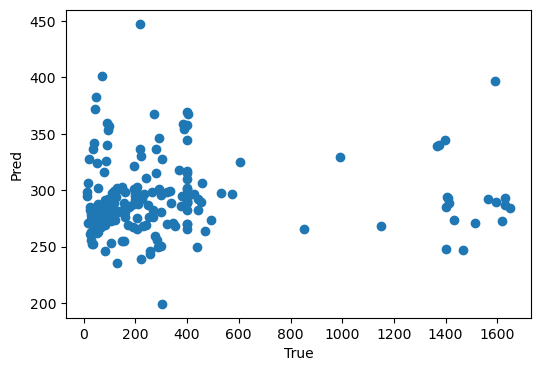

y_var: avg_target_last_seen_angle


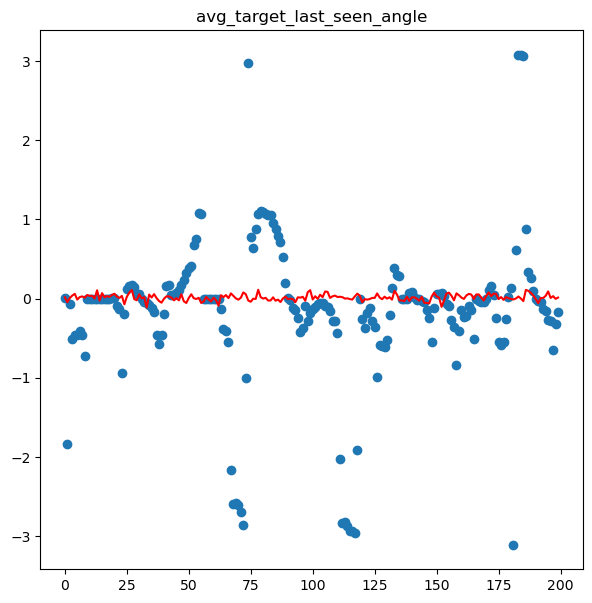

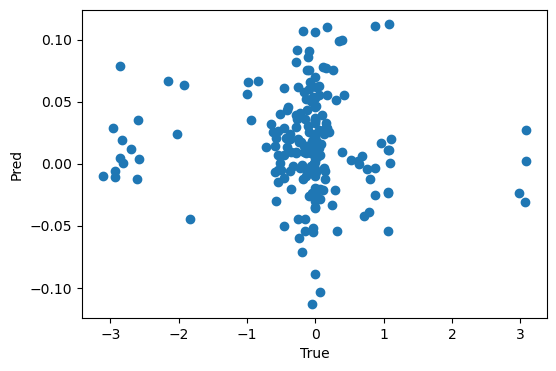

y_var: avg_target_last_seen_angle_to_boundary


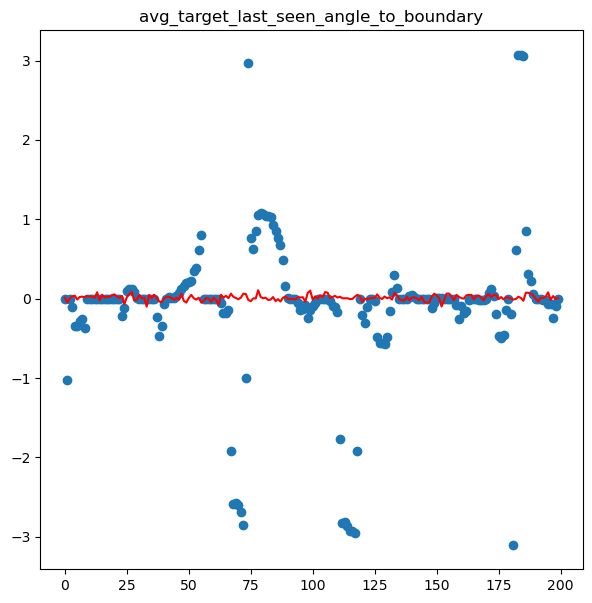

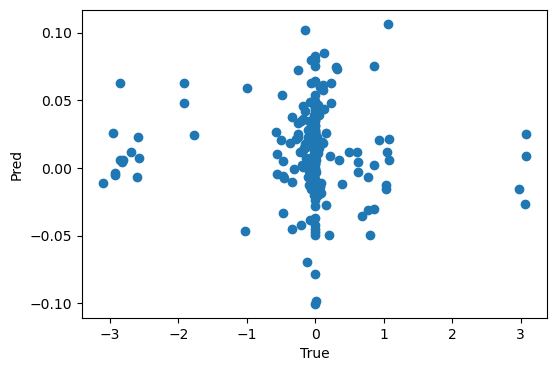

y_var: avg_target_last_seen_distance_frozen


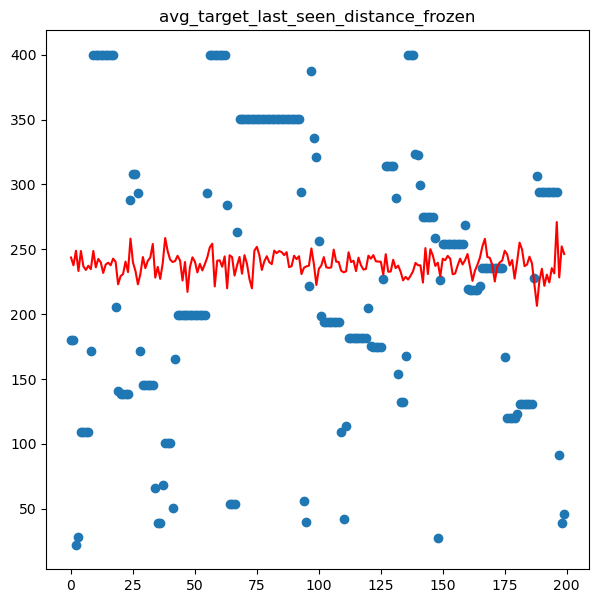

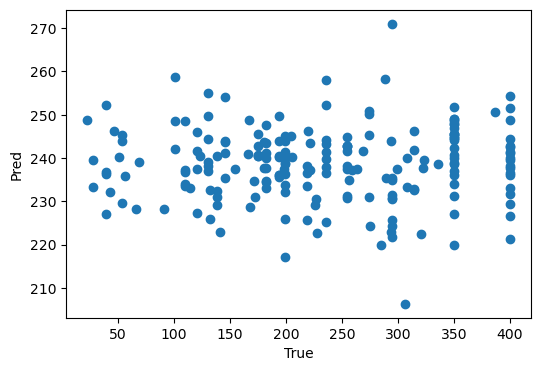

y_var: avg_target_last_seen_angle_frozen


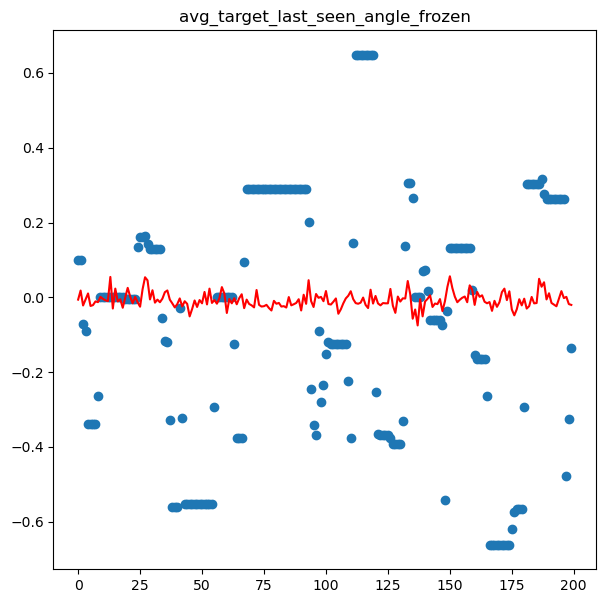

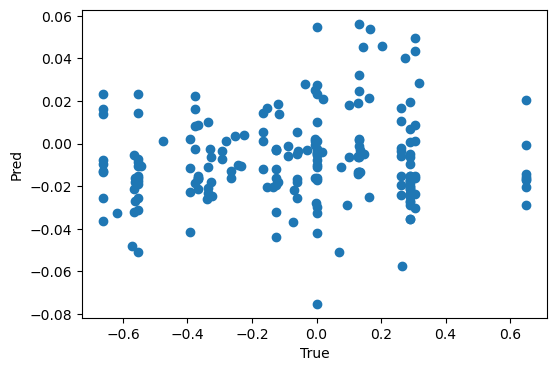

y_var: avg_target_last_seen_angle_to_boundary_frozen


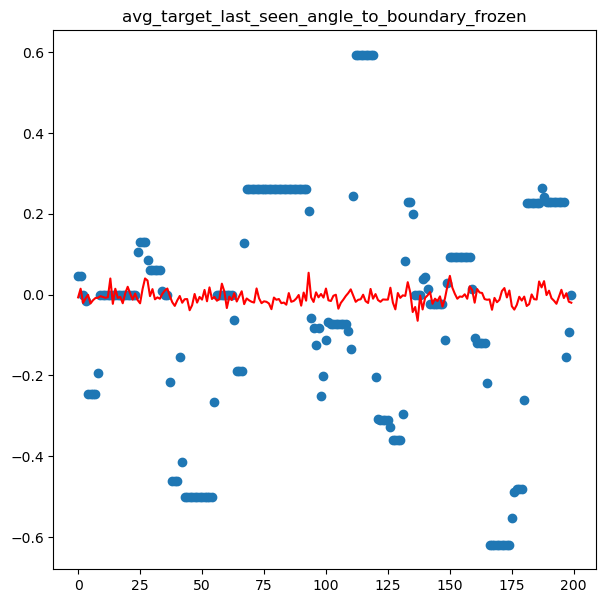

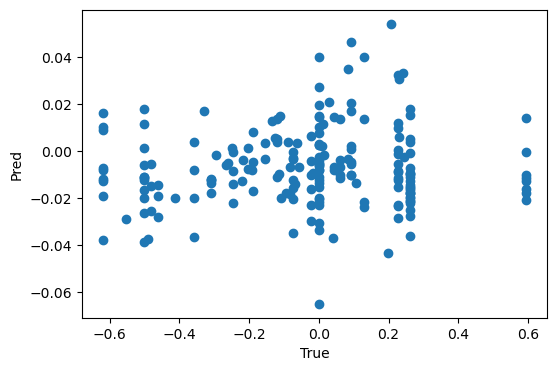

y_var: avg_target_cluster_last_seen_time


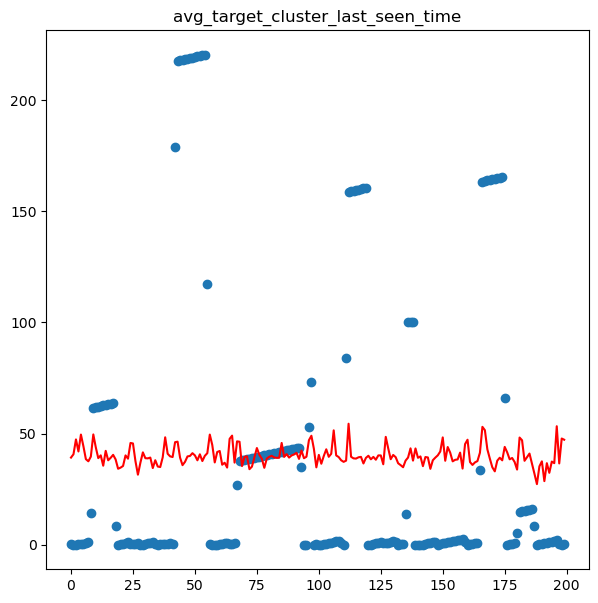

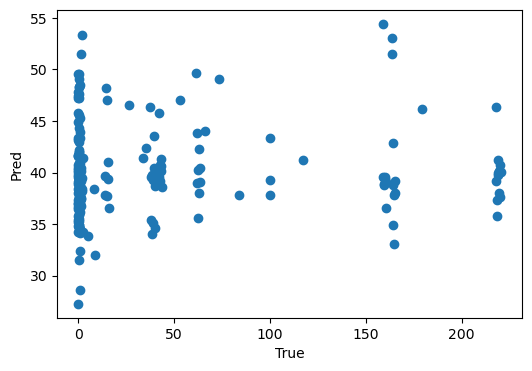

y_var: avg_target_cluster_last_seen_distance


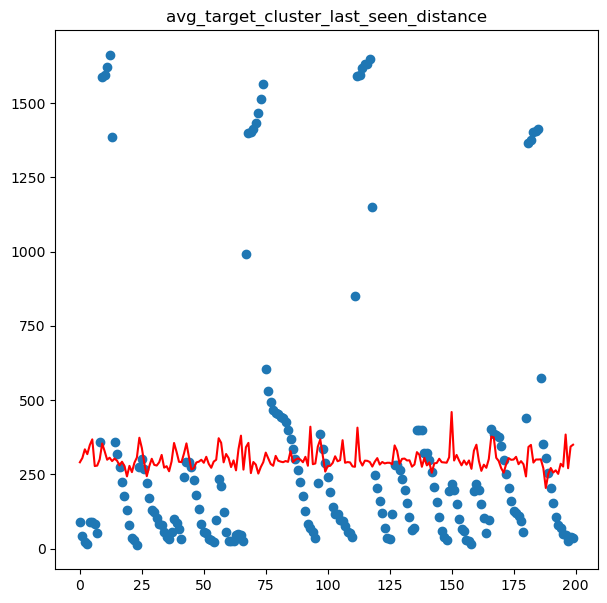

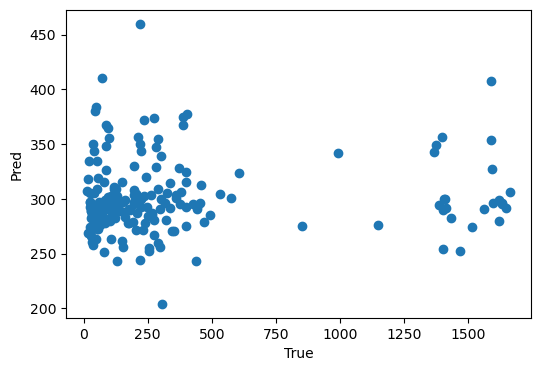

y_var: avg_target_cluster_last_seen_angle


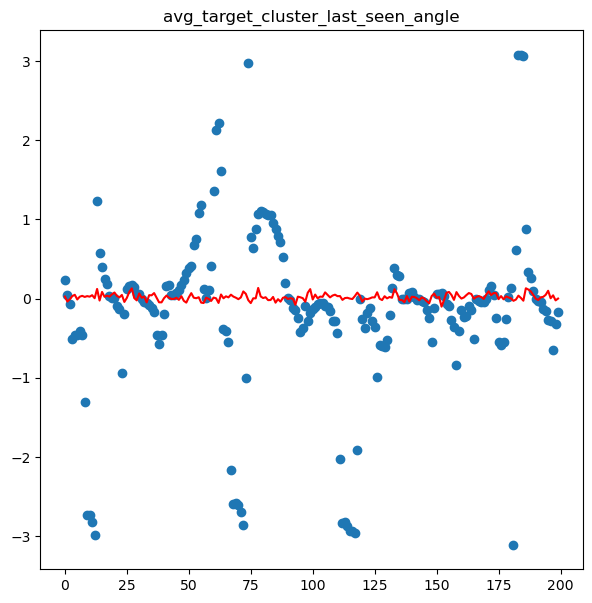

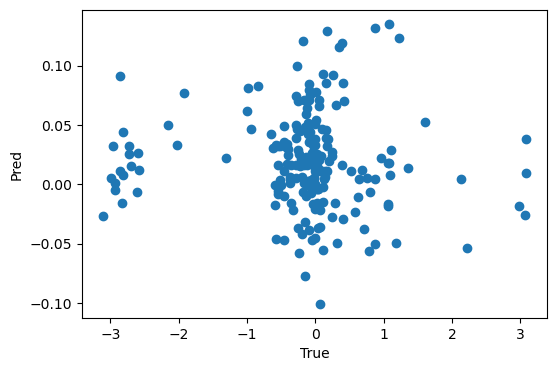

y_var: avg_target_cluster_last_seen_angle_to_boundary


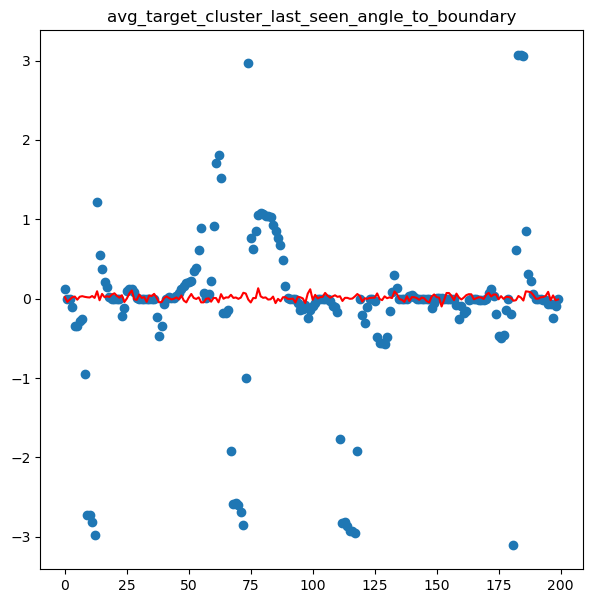

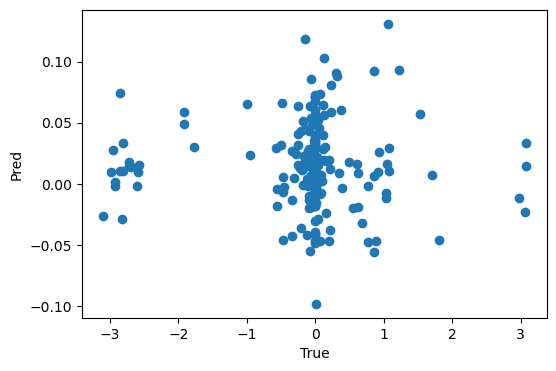

y_var: avg_target_cluster_last_seen_distance_frozen


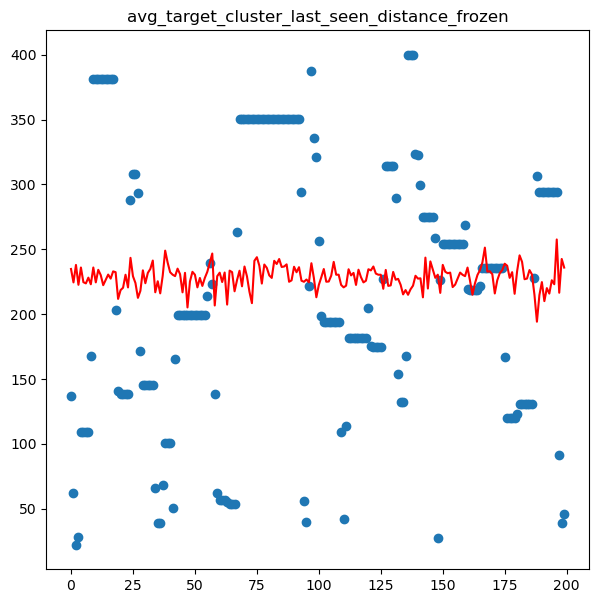

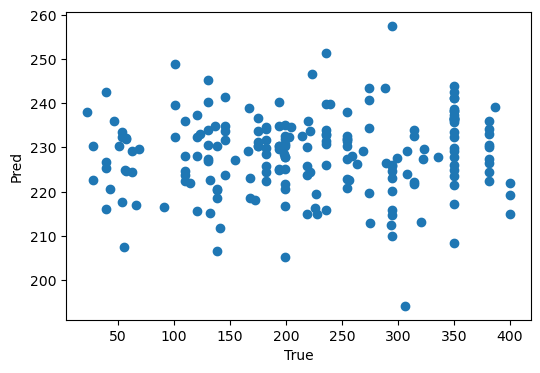

y_var: avg_target_cluster_last_seen_angle_frozen


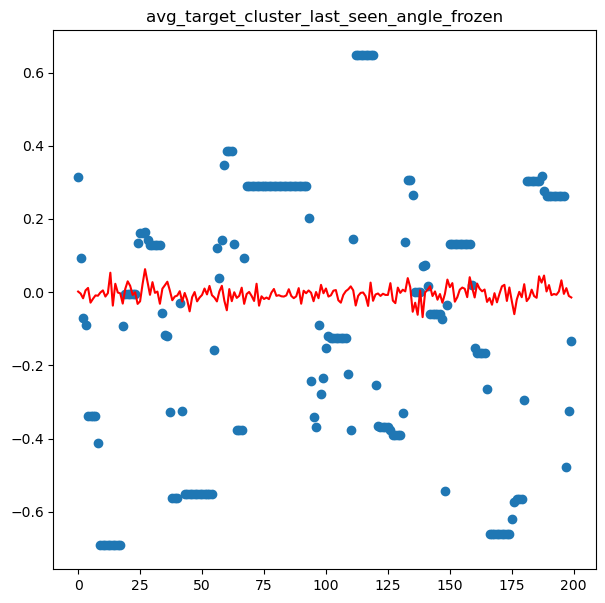

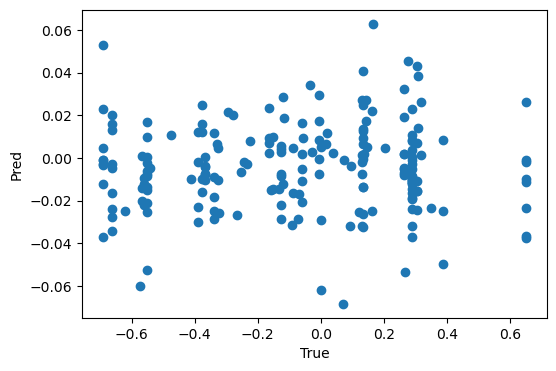

y_var: avg_target_cluster_last_seen_angle_to_boundary_frozen


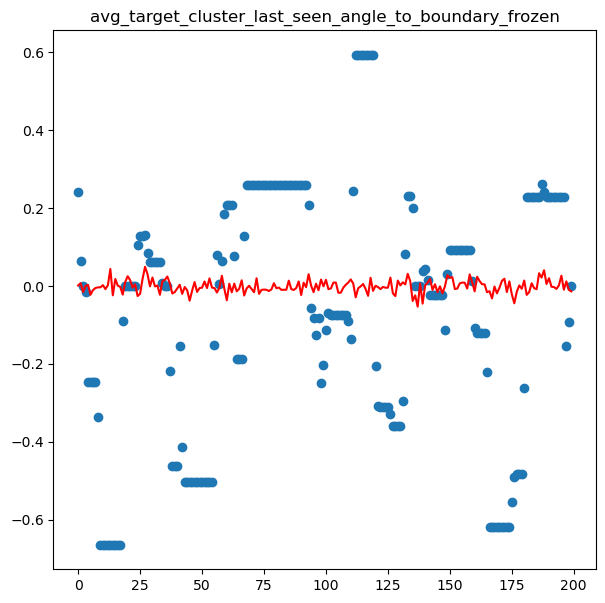

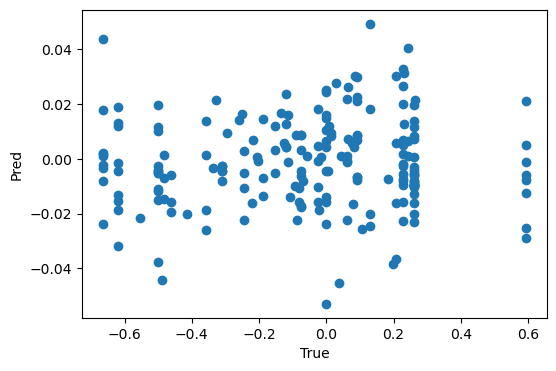

y_var: min_target_has_disappeared_for_last_time_dummy


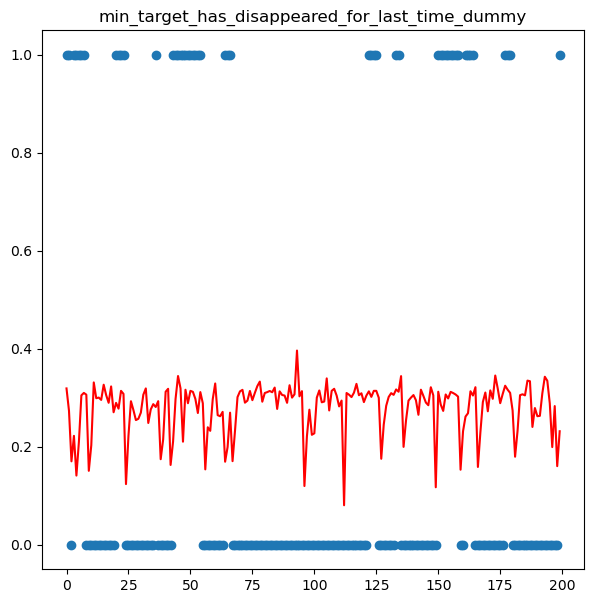

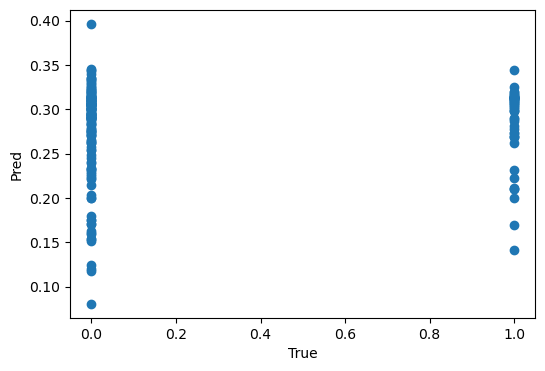

y_var: min_target_cluster_has_disappeared_for_last_time_dummy


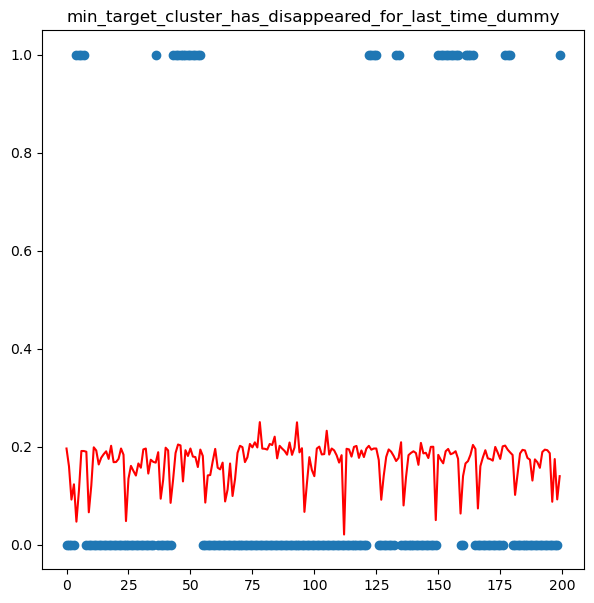

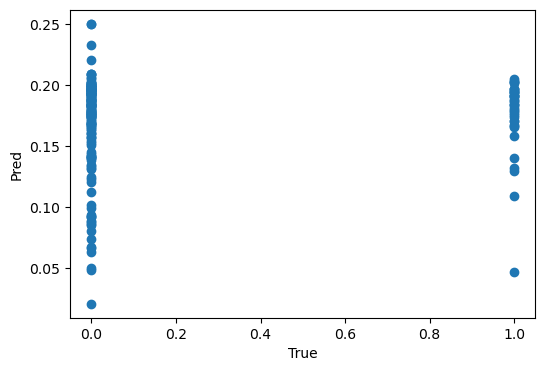

y_var: max_target_visible_dummy


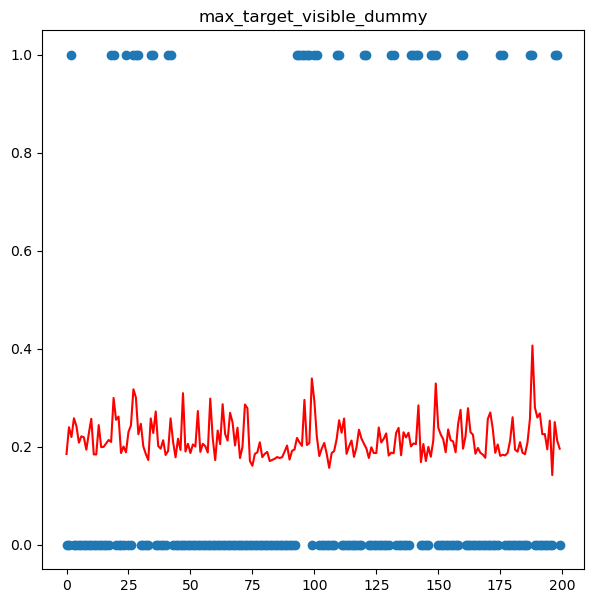

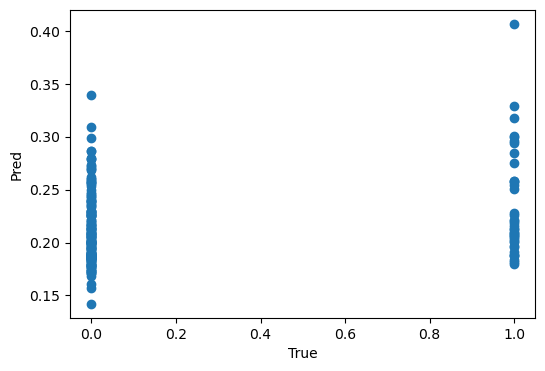

y_var: max_target_cluster_visible_dummy


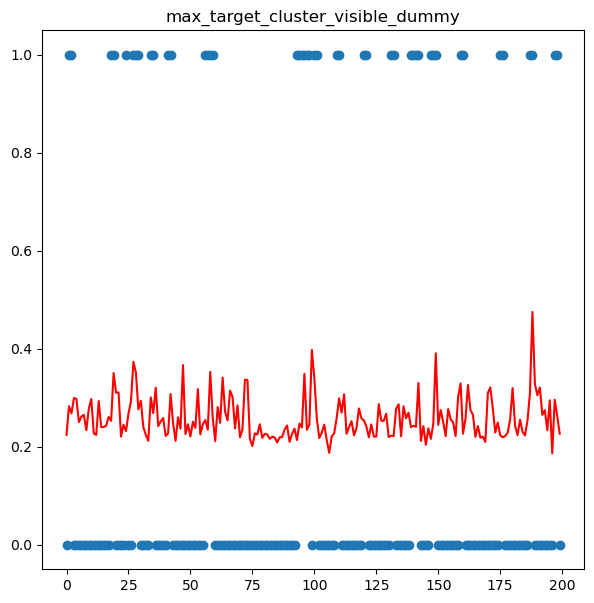

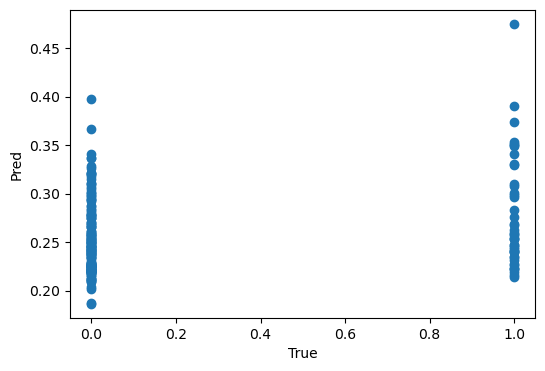

y_var: try_a_few_times_indice_dummy


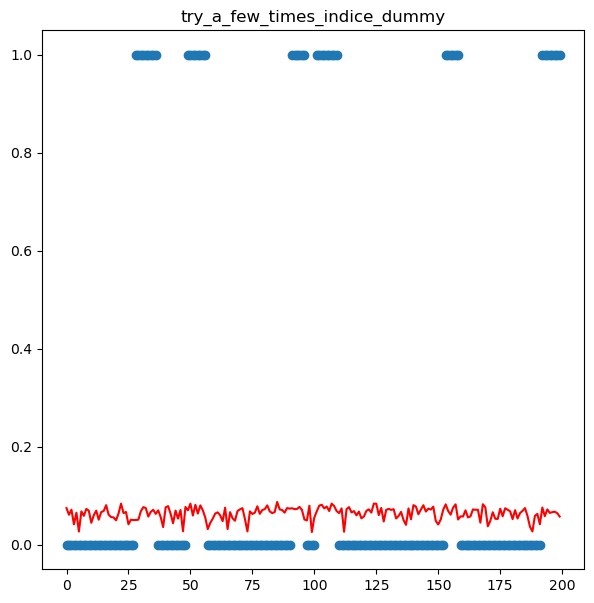

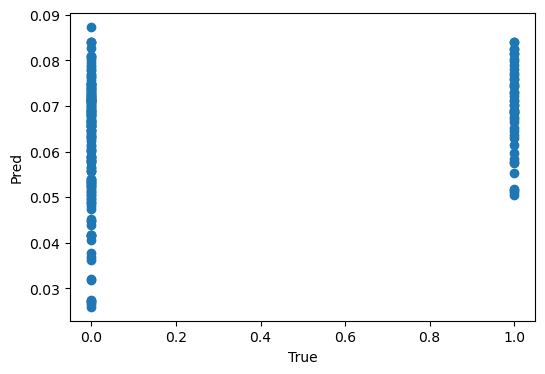

y_var: give_up_after_trying_indice_dummy


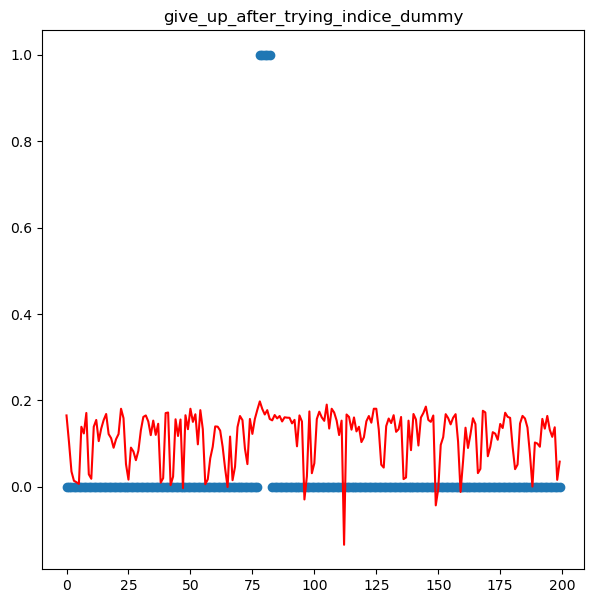

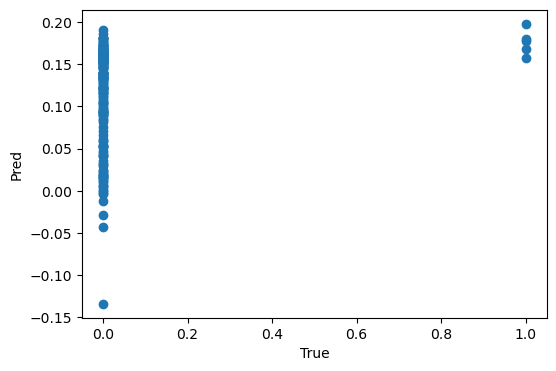

y_var: ignore_sudden_flas_indice_dummy


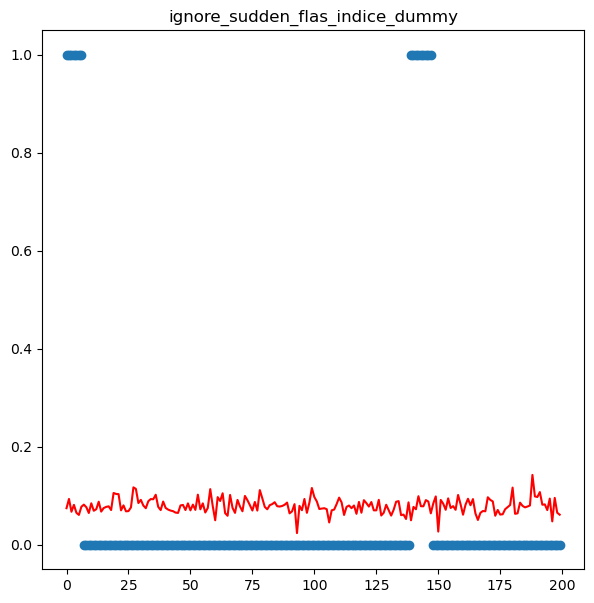

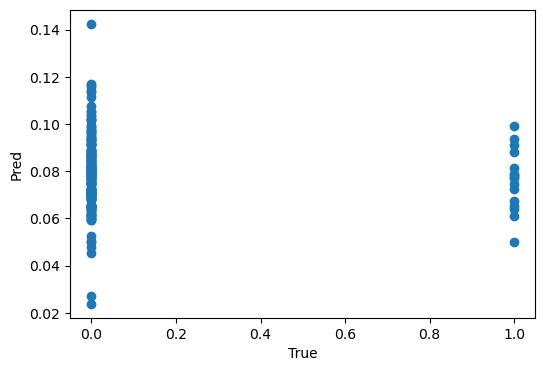

y_var: two_in_a_row


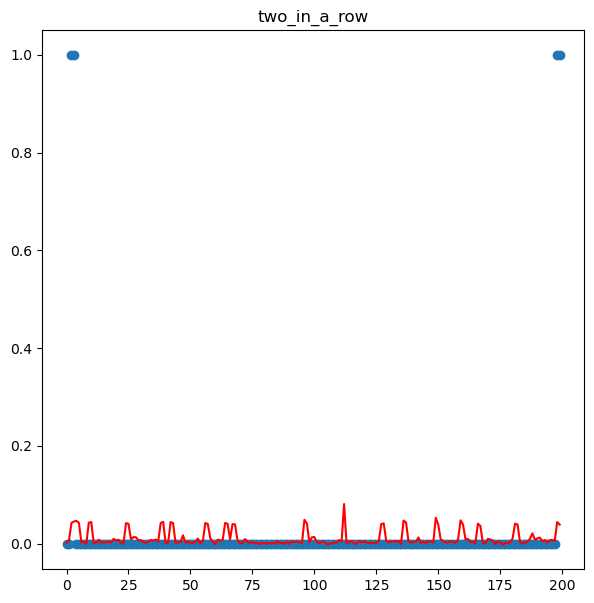

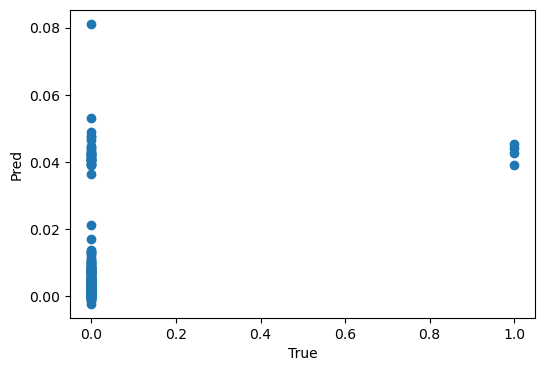

y_var: visible_before_last_one


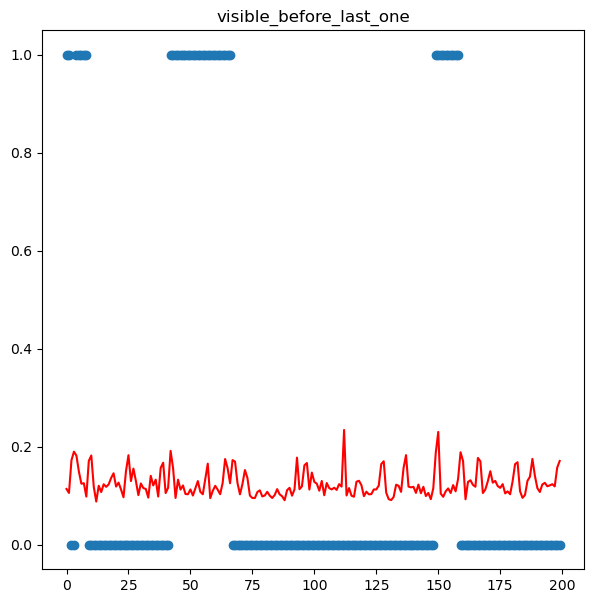

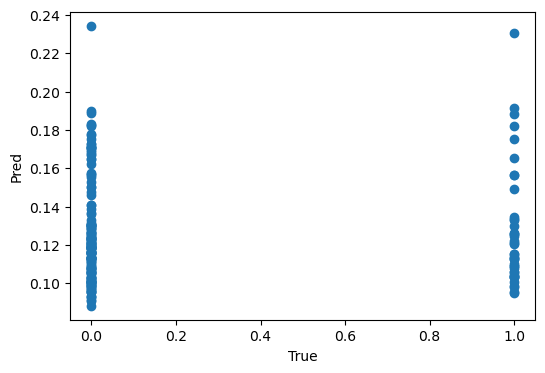

y_var: disappear_latest


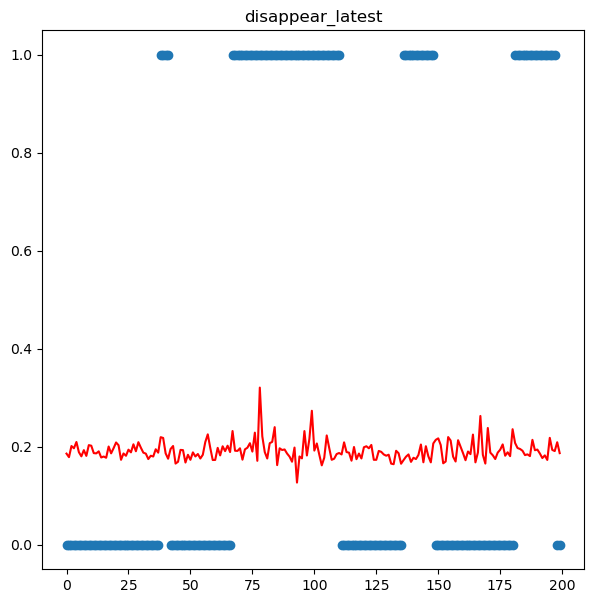

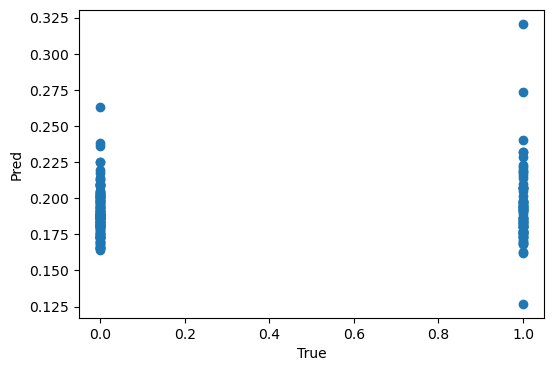

y_var: ignore_sudden_flash


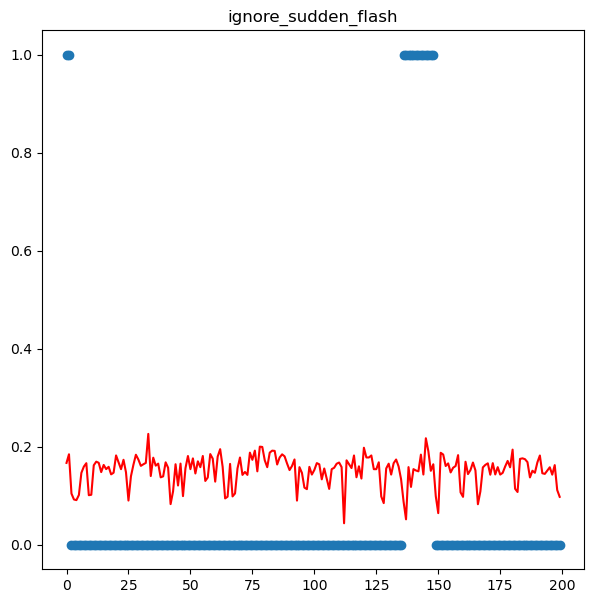

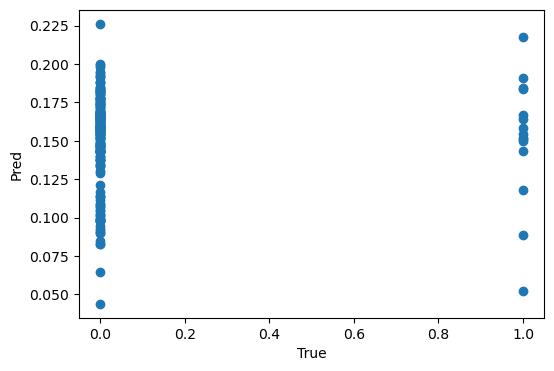

y_var: try_a_few_times


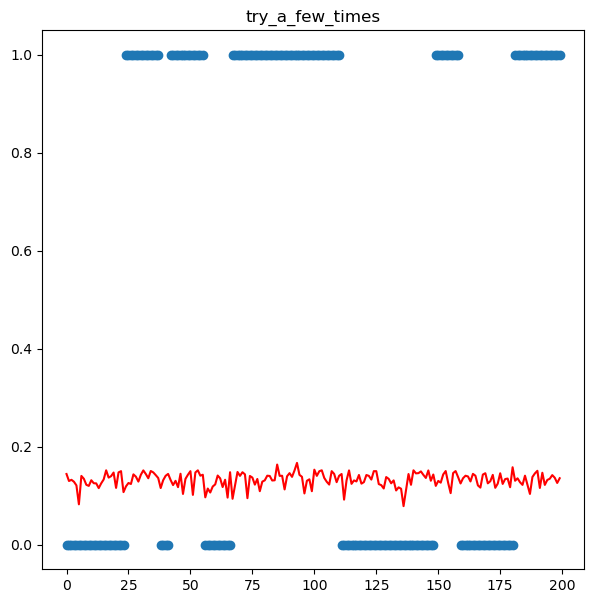

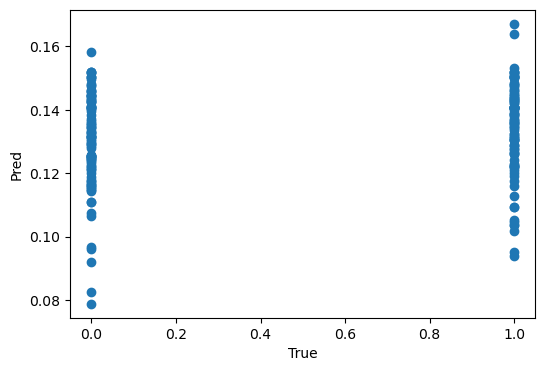

y_var: give_up_after_trying


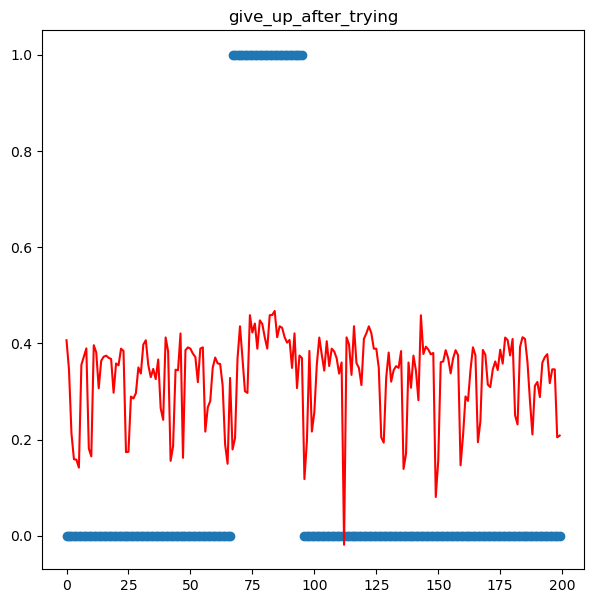

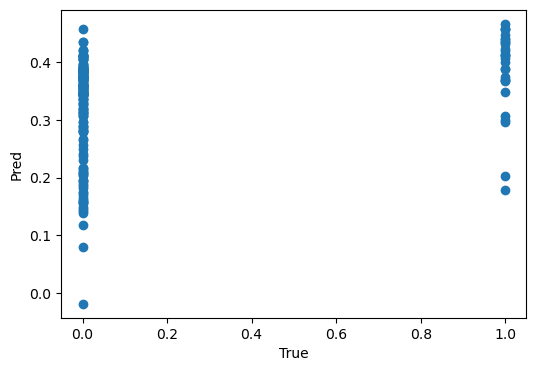

y_var: cluster_around_target


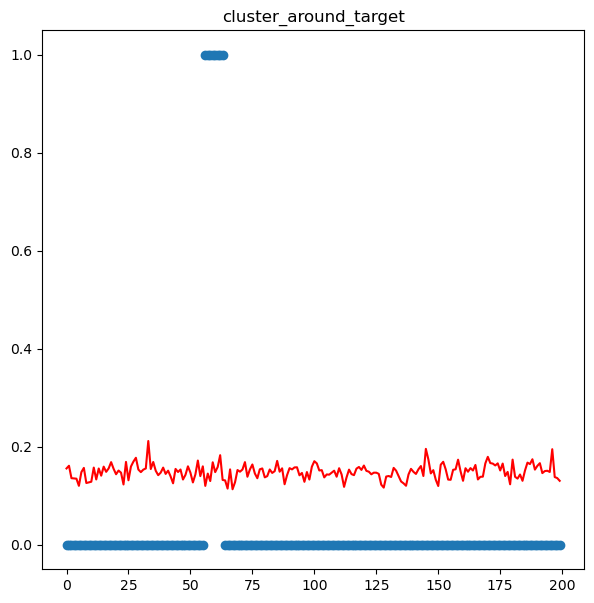

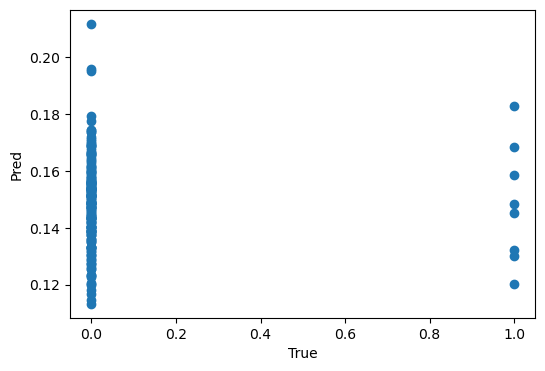

y_var: waste_cluster_around_target


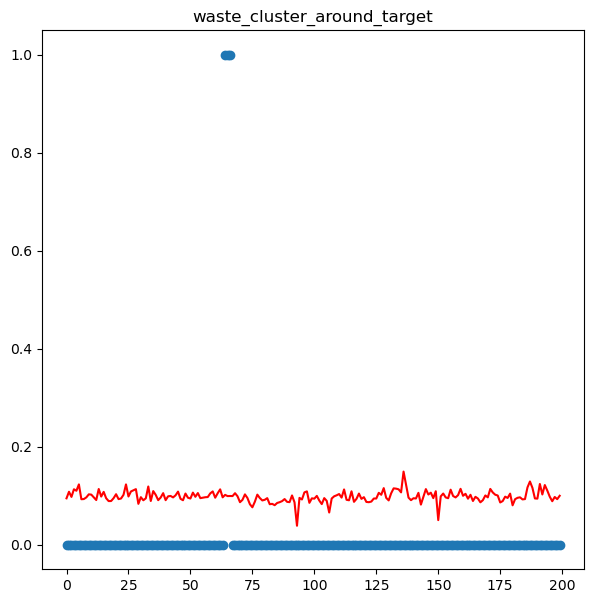

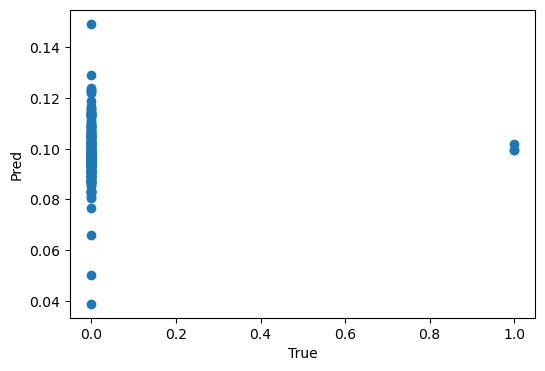

y_var: catching_ff


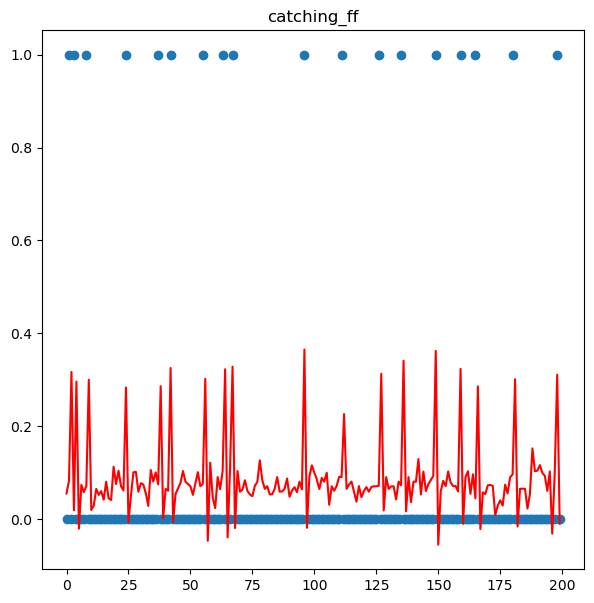

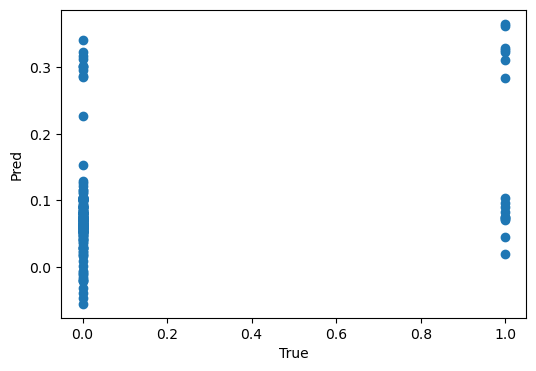

In [158]:
# conduct linear regression on X and y

for column in final_behavioral_data.columns:
  y_var = final_behavioral_data[column]
  print('y_var:', column)
  reg = LinearRegression().fit(x_var, y_var)


  # plot fit
  plt.subplots(figsize=(7, 7))
  bins_to_plot = range(1000, 1200)
  mean_squared_error(y_var, reg.predict(x_var))
  # plot the regression line
  plt.title(column)
  plt.scatter(range(len(bins_to_plot)), y_var[bins_to_plot])
  plt.plot(range(len(bins_to_plot)), reg.predict(x_var)[bins_to_plot], color='red')
  plt.show()
  plt.close()



  # plot pred against true
  plt.subplots(figsize=(6, 4))
  bins_to_plot = range(1000, 1200)
  cluster_num = 3
  mean_squared_error(y_var, reg.predict(x_var))
  # plot the regression line
  plt.scatter(y_var[bins_to_plot], reg.predict(x_var)[bins_to_plot])
  plt.xlabel("True")
  plt.ylabel("Pred")
  if column in ['gaze_monkey_view_x', 'gaze_monkey_view_y', 'gaze_world_x', 'gaze_world_y']:
      plt.xlim(-1000, 1000)
  plt.show()
  plt.close()

In [159]:
y_var

0        0
1        0
2        0
3        0
4        0
        ..
14392    0
14393    0
14394    0
14395    0
14396    1
Name: catching_ff, Length: 14397, dtype: int64

In [160]:
ff_dataframe

ff_index  point_index    time  target_index    ff_x    ff_y  monkey_x  \
0              1         1784   29.80             1  167.05  534.37    339.50   
1              1         1785   29.82             1  167.05  534.37    338.44   
2              1         1786   29.84             1  167.05  534.37    337.35   
3              1         1787   29.85             1  167.05  534.37    336.33   
4              1         1788   29.87             1  167.05  534.37    335.15   
...          ...          ...     ...           ...     ...     ...       ...   
772725      1864       210708 3461.36          1290 -982.75 -171.59   -943.80   
772726      1864       210709 3461.37          1290 -982.75 -171.59   -945.01   
772727      1864       210710 3461.39          1290 -982.75 -171.59   -946.14   
772728      1864       210711 3461.41          1290 -982.75 -171.59   -947.37   
772729      1864       210712 3461.42          1290 -982.75 -171.59   -948.51   

        monkey_y  visible  memory  ...  abs_ffangle_boundary_decreasing  \
0         231.94        1     100  ...                             1.00   
1         235.26        1     100  ...                             1.00   
2         238.20        1     100  ...                             1.00   
3         241.23        1     100  ...                            -1.00   
4         244.58        1     100  ...                             1.00   
...          ...      ...     ...  ...                              ...   
772725    -97.79        0       5  ...                            -1.00   
772726    -95.04        0       4  ...                            -1.00   
772727    -92.15        0       3  ...                            -1.00   
772728    -89.17        0       2  ...                            -1.00   
772729    -86.37        0       1  ...                            -1.00   

        IS_TARGET  monkey_dw  ff_index_string  dw_same_sign_as_ffangle  \
0            True       1.28                1                     1.00   
1            True       1.29                1                     1.00   
2            True       1.28                1                     1.00   
3            True       1.28                1                     1.00   
4            True       1.28                1                     1.00   
...           ...        ...              ...                      ...   
772725      False      -0.47             1864                    -1.00   
772726      False      -0.42             1864                    -1.00   
772727      False      -0.36             1864                    -1.00   
772728      False      -0.24             1864                    -1.00   
772729      False      -0.16             1864                    -1.00   

        dw_same_sign_as_ffangle_boundary  caught_time  whether_caught    bin  \
0                                   1.00        32.34               0    119   
1                                   1.00        32.34               0    119   
2                                   1.00        32.34               0    119   
3                                   1.00        32.34               0    119   
4                                   1.00        32.34               0    119   
...                                  ...          ...             ...    ...   
772725                             -1.00    100099.00               0  13845   
772726                             -1.00    100099.00               0  13845   
772727                             -1.00    100099.00               0  13845   
772728                             -1.00    100099.00               0  13845   
772729                             -1.00    100099.00               0  13845   

        monkey_angle  
0               1.87  
1               1.90  
2               1.91  
3               1.90  
4               1.92  
...              ...  
772725          1.96  
772726          1.96  
772727          1.95  
772728          1.96  
772729          1.97  

[772730

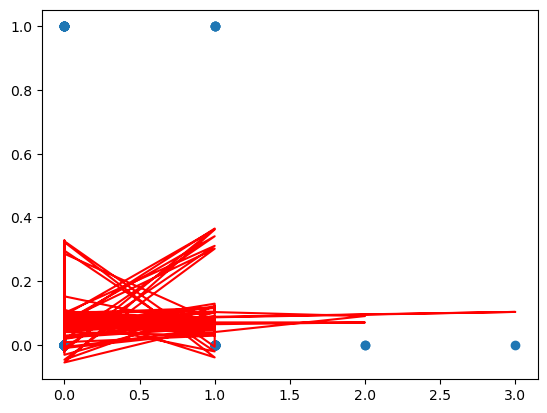

In [161]:
# let x axis be one of the spike cluster
bins_to_plot = range(1000, 1200)
cluster_num = 3
mean_squared_error(y_var, reg.predict(x_var))
# plot the regression line
plt.scatter(x_var[bins_to_plot, cluster_num], y_var[bins_to_plot])
plt.plot(x_var[bins_to_plot, cluster_num], reg.predict(x_var)[bins_to_plot], color='red')
plt.show()

# CCA

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## Loop over lags

In [162]:
# iterate across different lags
for n_lags in range(2, 4):
    
    #print("n_lags", n_lags, "include_negative_lags:", include_negative_lags)

    #lag_numbers = range(-n_lags,0+1)
    lag_numbers = range(-n_lags, n_lags+1)
    #lag_numbers = range(0, n_lags+1)
    print("lag_numbers:", lag_numbers)

    x_var_lags = add_lags_to_each_feature(spikes_in_bins, lag_numbers = lag_numbers)

    y_var_lags = add_lags_to_each_feature(final_behavioral_data.drop(columns=['bin', 'RDy', 'RDz']), lag_numbers= range(-3, 4))
    y_var_lags['bin'] = final_behavioral_data['bin']

    #X1 = pd.DataFrame(neural_stacked_bins_sub) 
    #X1 = pd.DataFrame(modelX.copy())

    X1 = x_var_lags
    X2 = y_var_lags

    scaler = StandardScaler()
    X1_sc = scaler.fit_transform(X1) #scale data
    X2_sc = scaler.fit_transform(X2) 
    n_comp=12 #choose number of canonical variates pairs 
    cca = CCA(scale=False, n_components=n_comp) #define CCA
    cca.fit(X1_sc, X2_sc) #fit our scaled data
    X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

    comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(n_comp)]
    print(np.around(np.array(comp_corr), 2))
    # bar_names = ['CC {}'.format(i+1) for i in range(n_comp)]
    # plt.bar(bar_names, comp_corr, color='lightgrey', width = 0.8, edgecolor='k')
    # plt.show() 
    # plt.close()

coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [X2.columns])
coef_df.index = X1.columns
    

lag_numbers: range(-2, 3)
[0.97 0.93 0.87 0.85 0.8  0.74 0.69 0.5  0.48 0.44 0.4  0.39]
lag_numbers: range(-3, 4)
[0.97 0.95 0.9  0.87 0.85 0.81 0.77 0.72 0.62 0.51 0.5  0.47]


/Users/dusiyi/.conda/envs/Multifirefly-Project/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


## loading ranked

### Neurons

In [163]:
# loading_df = pd.DataFrame(np.round(cca.x_loadings_, 2))
# loading_df['feature'] = X1.columns
# loading_df['feature_category'] = loading_df['feature'].apply(lambda x: '_'.join(x.split('_')[:-1]))
# loading_df.sort_values(by=0, ascending=True).head(5)

In [164]:
loading_squared = pd.DataFrame(np.round(cca.x_loadings_**2, 3))
loading_squared['feature'] = X1.columns
loading_squared['feature_category'] = loading_squared['feature'].apply(lambda x: '_'.join(x.split('_')[:-1]))

for variate in range(cca.x_loadings_.shape[1]):
    print("variate:", variate)
    print(loading_squared.sort_values(by=variate, ascending=False).head(10))

variate: 0
      0    1    2    3    4    5    6    7    8    9   10   11    feature  \
54 0.17 0.00 0.15 0.00 0.01 0.15 0.05 0.13 0.01 0.00 0.00 0.00   unit_6_0   
37 0.17 0.00 0.14 0.00 0.02 0.12 0.08 0.11 0.03 0.00 0.00 0.00  unit_5_-1   
53 0.14 0.07 0.05 0.00 0.15 0.00 0.20 0.06 0.07 0.00 0.00 0.00   unit_5_0   
38 0.14 0.09 0.01 0.00 0.17 0.08 0.01 0.16 0.00 0.00 0.00 0.00  unit_6_-1   
70 0.13 0.08 0.03 0.00 0.16 0.00 0.19 0.08 0.04 0.00 0.00 0.00   unit_6_1   
21 0.13 0.10 0.00 0.00 0.15 0.10 0.00 0.15 0.01 0.00 0.00 0.00  unit_5_-2   
69 0.07 0.15 0.04 0.00 0.01 0.15 0.12 0.01 0.21 0.00 0.00 0.00   unit_5_1   
22 0.07 0.14 0.10 0.00 0.01 0.02 0.16 0.16 0.00 0.00 0.00 0.00  unit_6_-2   
86 0.06 0.15 0.06 0.00 0.00 0.13 0.16 0.02 0.11 0.00 0.00 0.00   unit_6_2   
5  0.06 0.13 0.12 0.00 0.03 0.01 0.12 0.17 0.00 0.00 0.00 0.00  unit_5_-3   

   feature_category  
54           unit_6  
37           unit_5  
53           unit_5  
38           unit_6  
70           unit_6  
21       

12 out of 16 feature categories are included in the plot


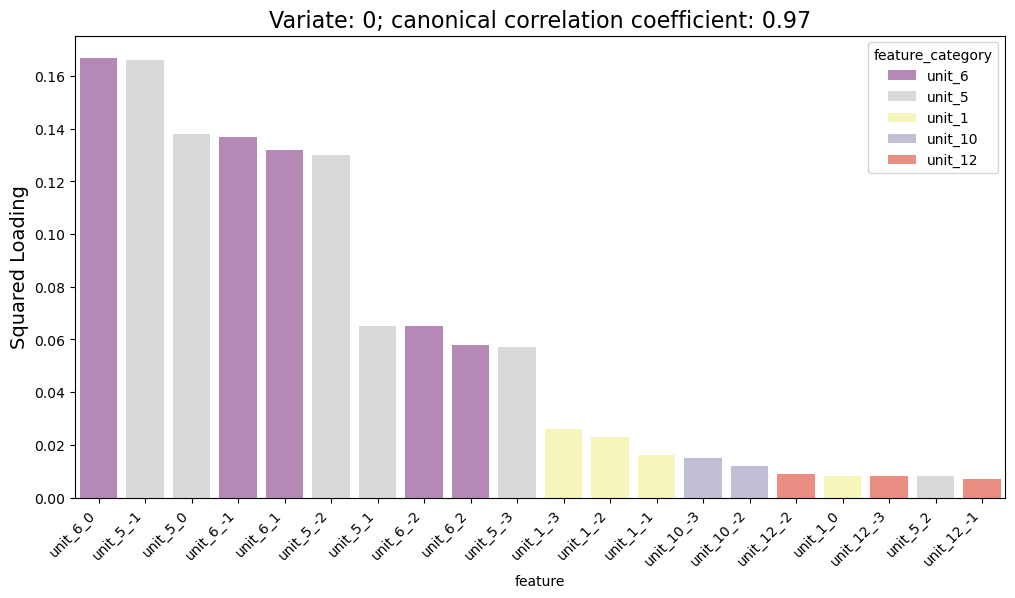

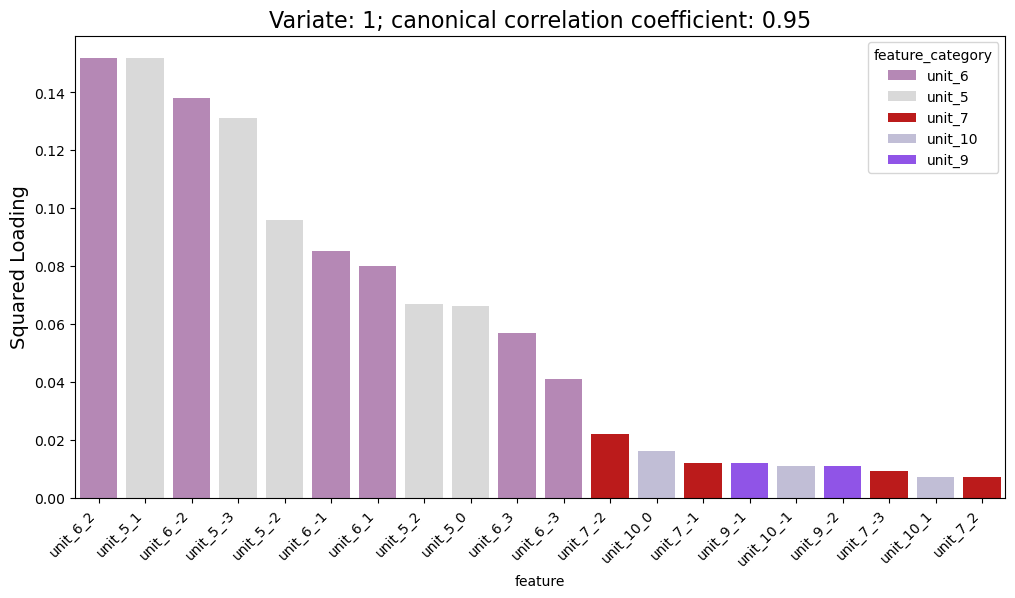

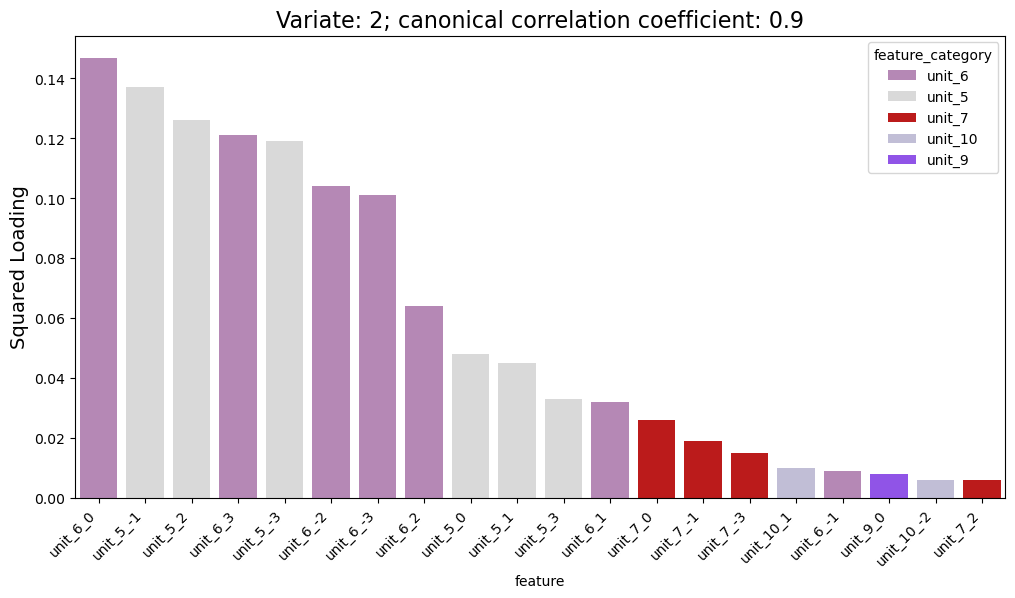

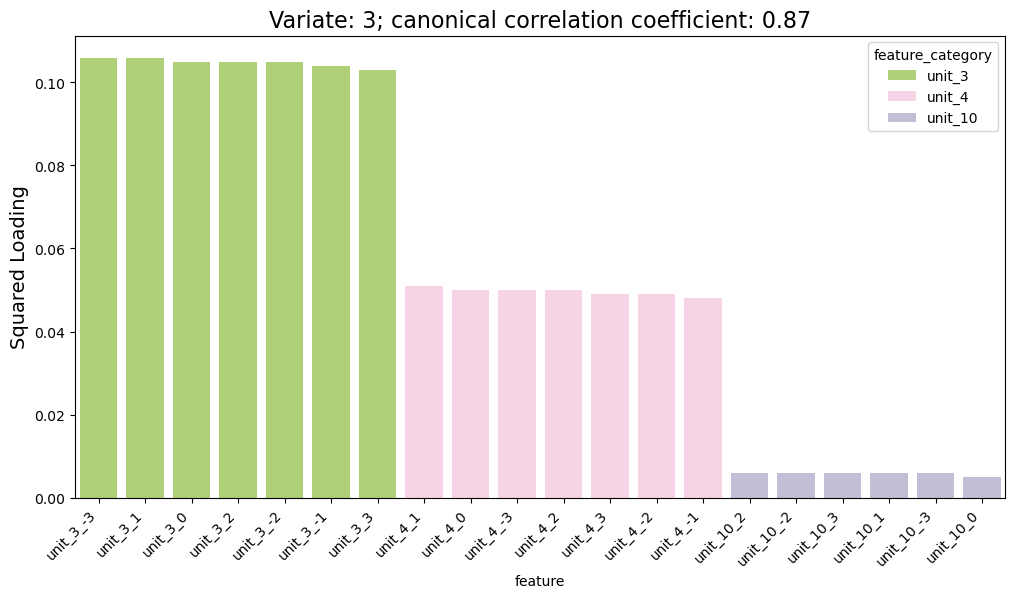

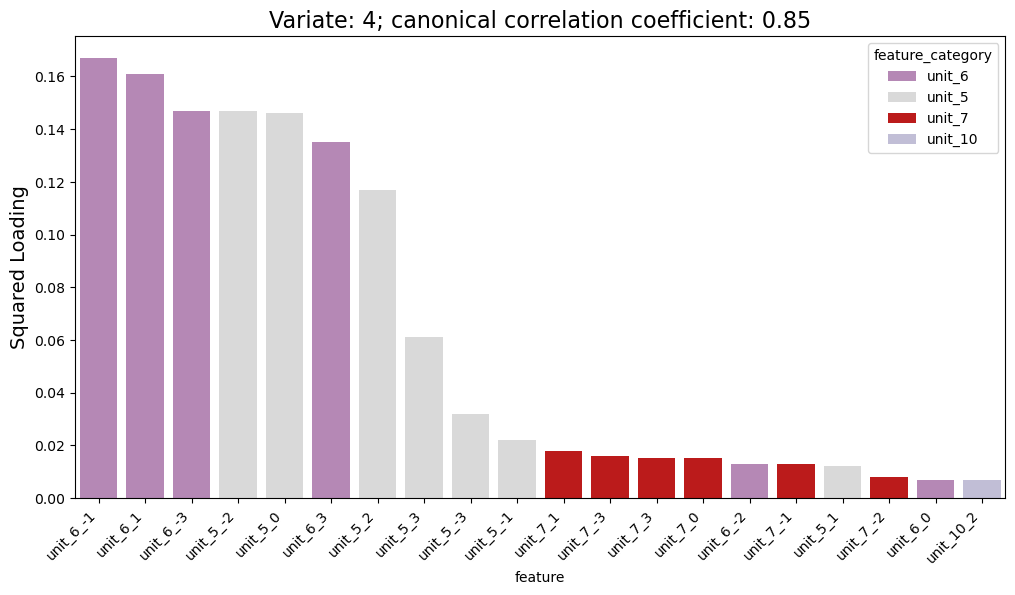

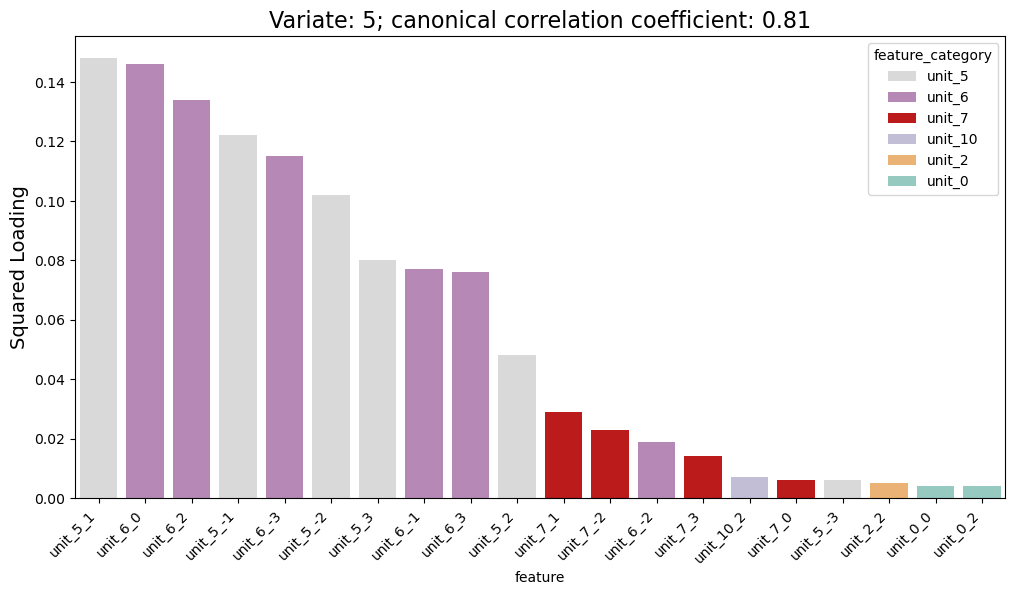

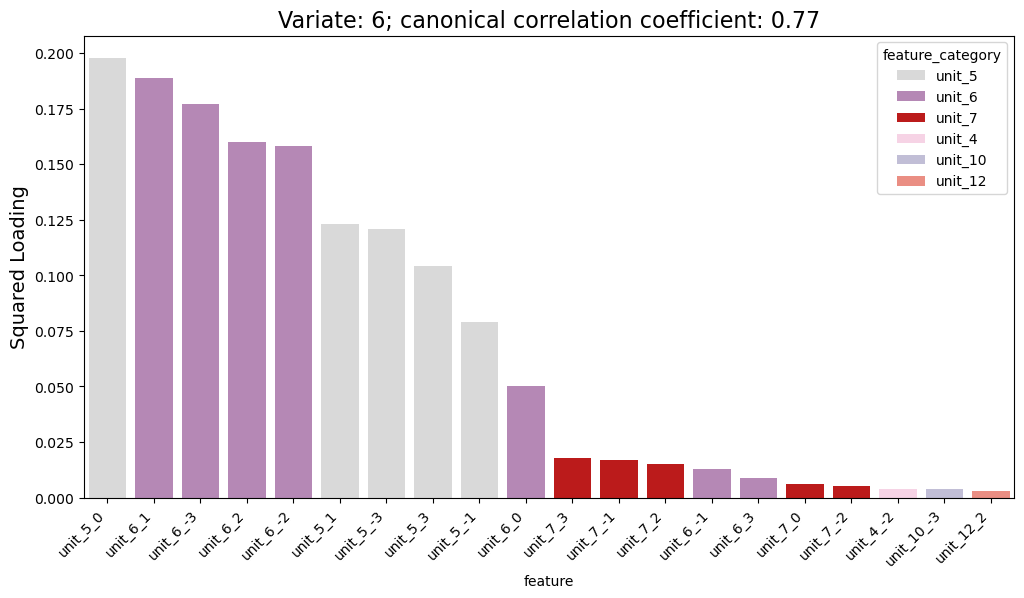

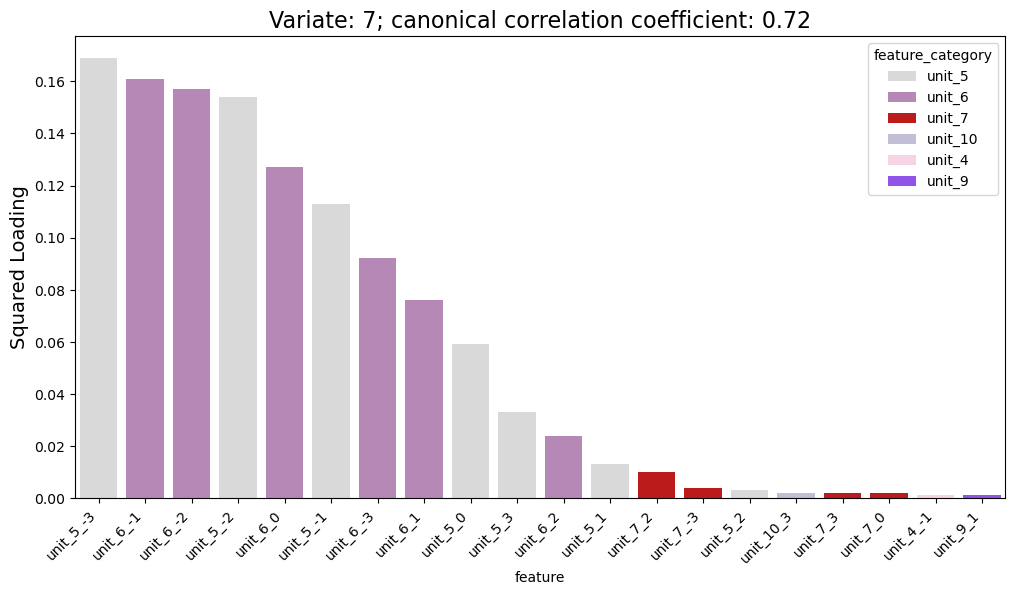

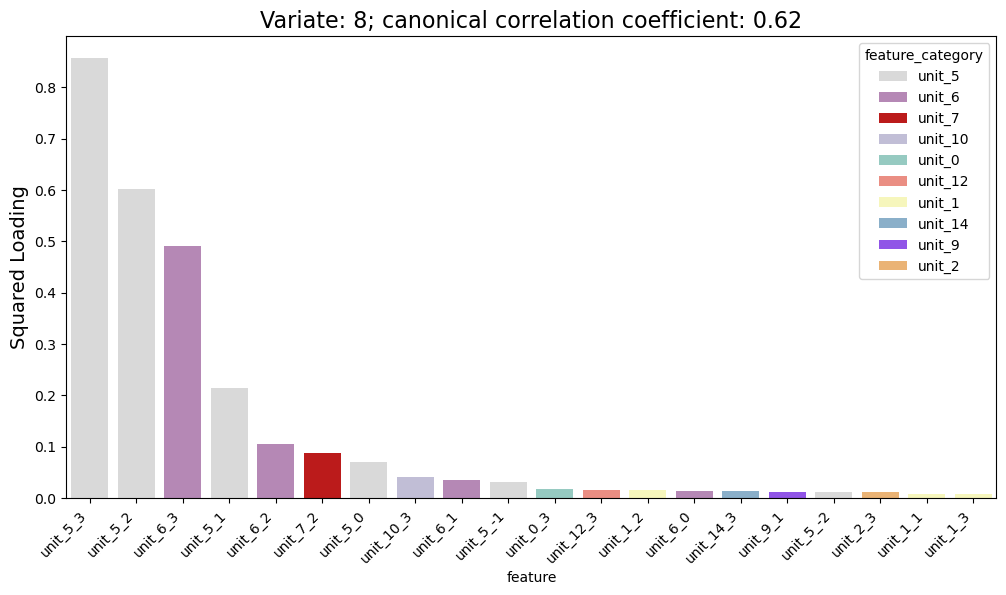

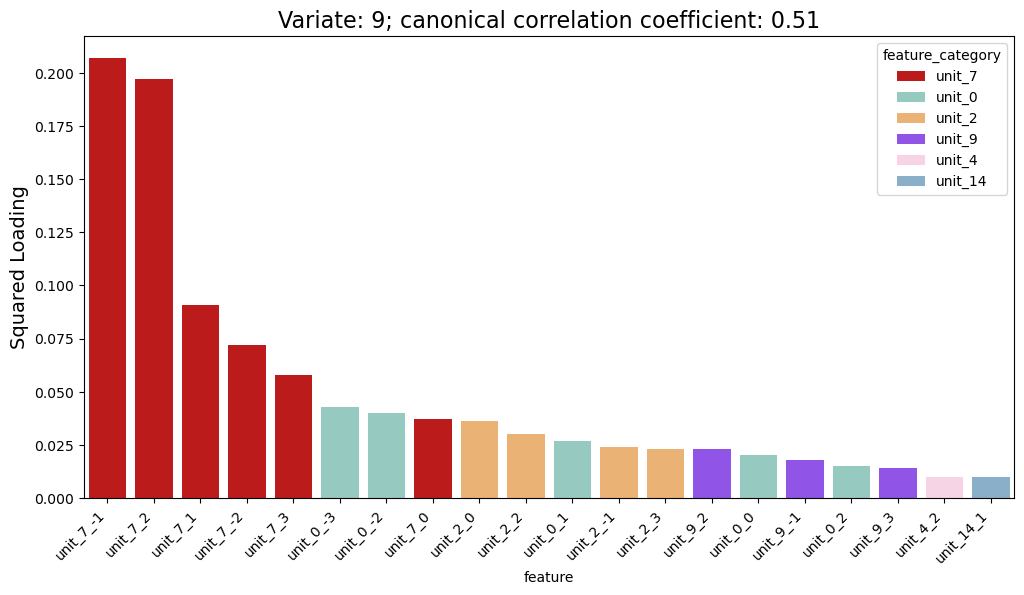

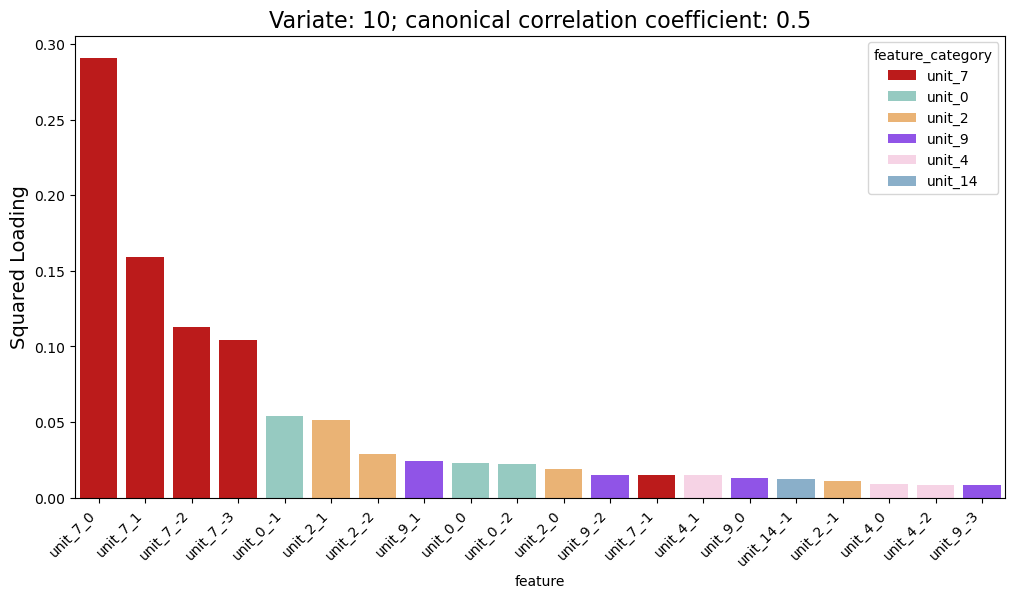

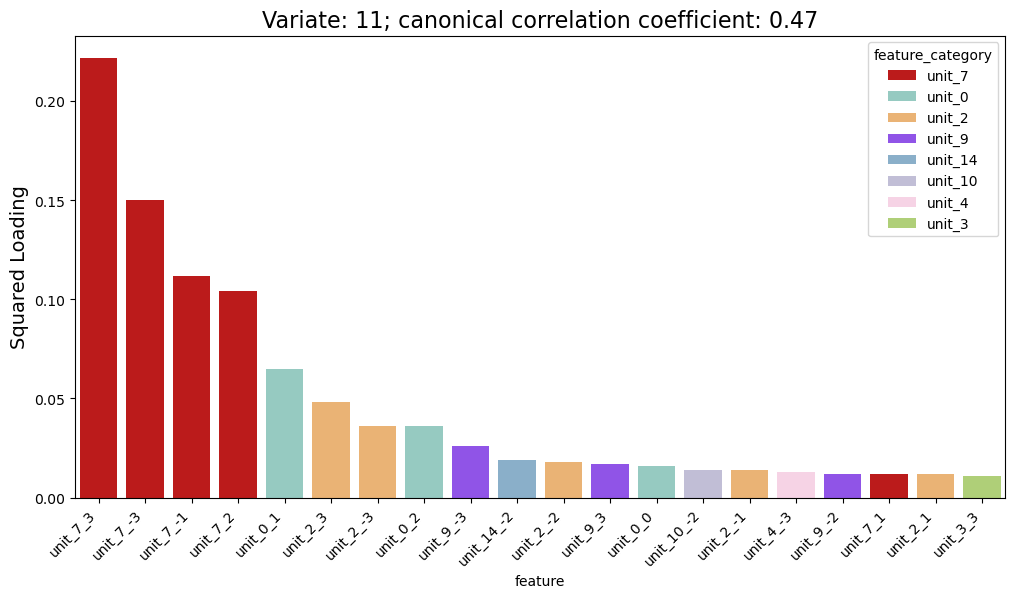

In [165]:
max_features_to_show = 20
unique_feature_category = np.array([])
for variate in range(cca.x_loadings_.shape[1]):
    loading_subset = loading_squared.sort_values(by=variate, ascending=False).iloc[:max_features_to_show]
    unique_feature_category = np.unique(np.concatenate([unique_feature_category, loading_subset.feature_category]))
print(len(unique_feature_category), "out of", len(loading_squared.feature_category.unique()), "feature categories are included in the plot")

# Assign a color to each feature category shown in the plot
# Take the colors from 2 colormaps because one is not enough
qualitative_colors = sns.color_palette("Set3", 10)  # this has only 10 unique colors, but prettier
qualitative_colors_2 = sns.color_palette(colorcet.glasbey, n_colors=len(unique_feature_category)-10)  # this has more unique colors, but a bit uglier
qualitative_colors.extend(qualitative_colors_2)


for variate in range(cca.x_loadings_.shape[1]):
    loading_subset = loading_squared.sort_values(by=variate, ascending=False).iloc[:max_features_to_show]
    color_dict = {}
    for i in range(len(unique_feature_category)):
        feature_category = unique_feature_category[i]
        color_dict[feature_category] = qualitative_colors[i]

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=loading_subset, x='feature', y=variate, dodge=False, ax=ax, hue='feature_category', palette=color_dict)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Squared Loading", fontsize=14)
    coefficient = np.around(np.array(comp_corr), 2)[variate]
    plt.title('Variate: ' + str(variate) + '; canonical correlation coefficient: ' + str(coefficient), fontsize=16)
    plt.show()
    plt.close()

### Behavioral

In [166]:
cca.y_loadings_[cca.y_loadings_<-1]

array([-1.55389359, -1.30277244, -1.19008387, -1.40562505, -1.43540896,
       -1.14225751, -1.25397127, -1.32448758, -1.3529854 , -1.54817811,
       -1.01757919, -1.32624182, -1.26799404, -1.13203378, -1.68647479,
       -1.08860244, -1.06885457, -1.77747782, -1.12231586, -1.23868686,
       -1.20892766, -1.7273701 , -1.36324812, -1.51037635, -1.20137622,
       -1.08369467, -1.07479774, -1.08412842, -1.25234697, -1.08531016,
       -1.36013807, -1.00191759, -1.51553612, -1.21867014, -1.40244775,
       -1.31839771, -1.42156727, -1.19897026, -1.79452822, -1.16064762,
       -1.24605691, -1.36718269, -1.4657229 , -1.248336  , -1.87971612,
       -1.01193551, -1.20167927, -1.09426536, -1.23971725, -1.37346696,
       -1.23955895, -1.09369092, -2.2954721 , -2.2982047 , -1.10035943,
       -2.37336914, -2.3851264 , -1.26935713, -2.06984967, -1.23957115,
       -1.35062448, -1.45915877, -1.02956459, -1.97945684, -1.13471296,
       -1.48478831, -1.09070111, -1.77635624, -1.06729866, -1.33

In [167]:
loading_squared = pd.DataFrame(np.round(cca.y_loadings_**2, 3))
loading_squared['feature'] = X2.columns
loading_squared['feature_category'] = loading_squared['feature'].apply(lambda x: '_'.join(x.split('_')[:-1]))

for variate in range(cca.y_loadings_.shape[1]):
    print("variate:", variate)
    print(loading_squared.sort_values(by=variate, ascending=False).head(10))

variate: 0
       0    1    2    3    4    5    6    7    8    9   10   11  \
243 1.53 0.17 0.15 0.00 0.05 1.46 0.01 0.39 0.02 0.01 0.01 0.01   
186 1.48 0.44 0.06 0.00 0.38 0.00 0.14 0.16 0.03 0.01 0.01 0.00   
300 1.04 1.77 0.01 0.01 0.52 0.67 0.03 0.15 0.15 0.03 0.00 0.02   
129 0.89 1.71 0.06 0.00 0.07 1.44 0.34 0.02 0.01 0.00 0.00 0.01   
380 0.61 0.07 0.03 0.01 0.12 0.09 0.03 0.01 0.19 0.01 0.04 0.00   
323 0.56 0.13 0.23 0.01 0.03 0.34 0.07 0.18 0.00 0.04 0.01 0.00   
377 0.55 0.00 0.00 0.01 0.18 0.06 0.10 0.02 0.05 0.01 0.00 0.05   
370 0.54 0.00 0.00 0.01 0.17 0.07 0.09 0.02 0.05 0.02 0.01 0.05   
366 0.53 0.00 0.00 0.00 0.19 0.06 0.10 0.02 0.05 0.02 0.01 0.05   
373 0.52 0.06 0.03 0.01 0.11 0.08 0.03 0.02 0.17 0.02 0.04 0.01   

                                            feature  \
243                             stop_success_rate_1   
186                             stop_success_rate_0   
300                             stop_success_rate_2   
129                            

23 out of 58 feature categories are included in the plot


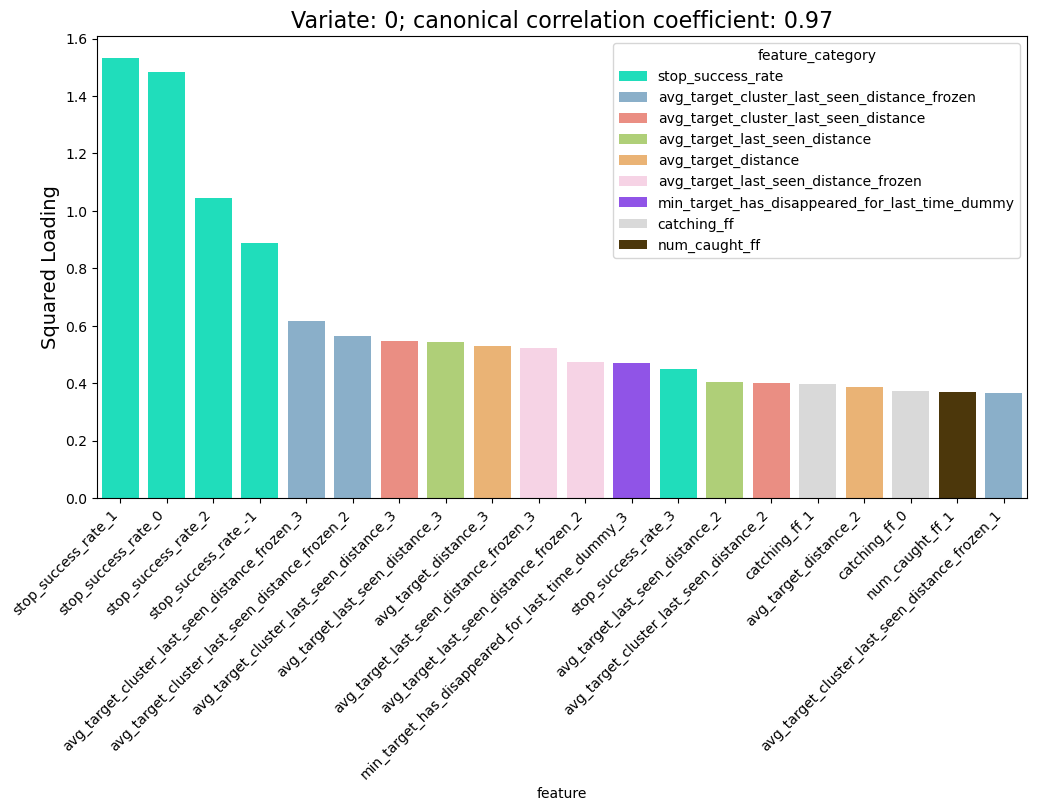

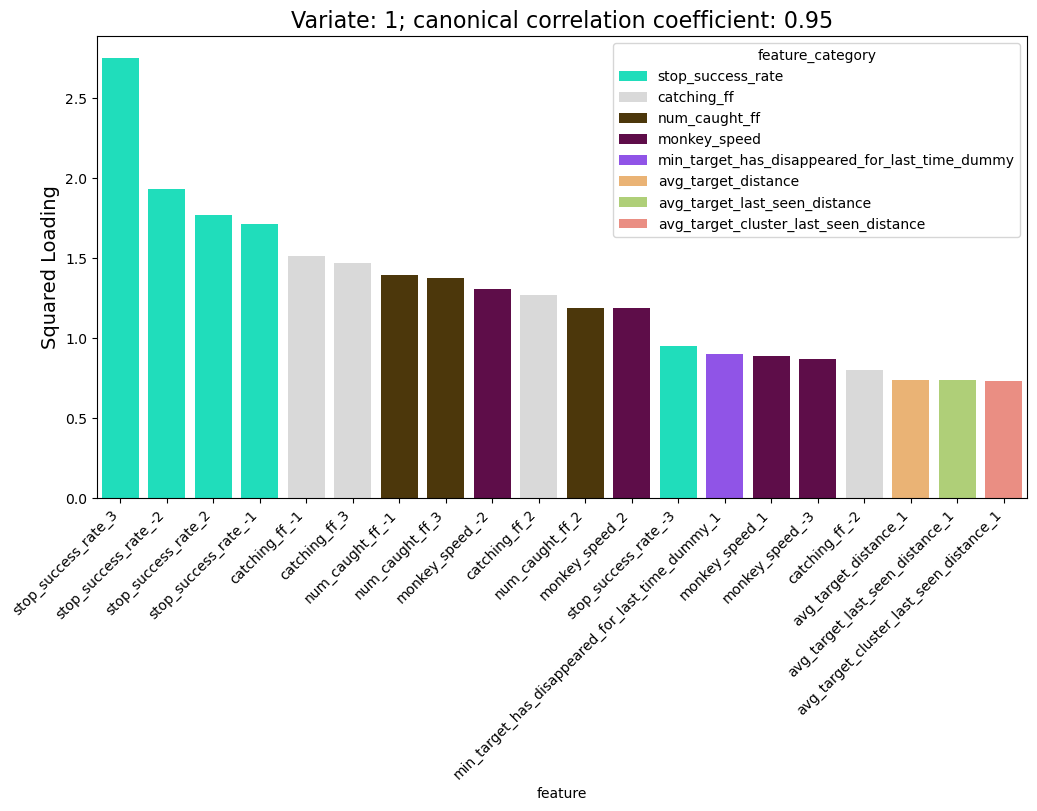

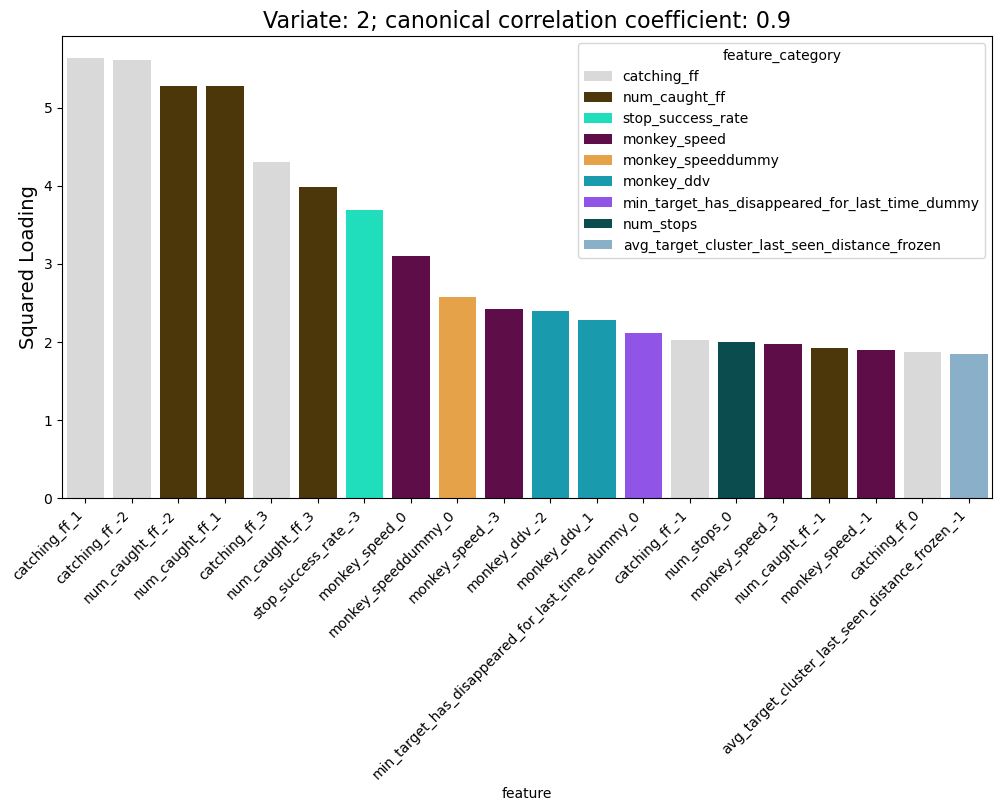

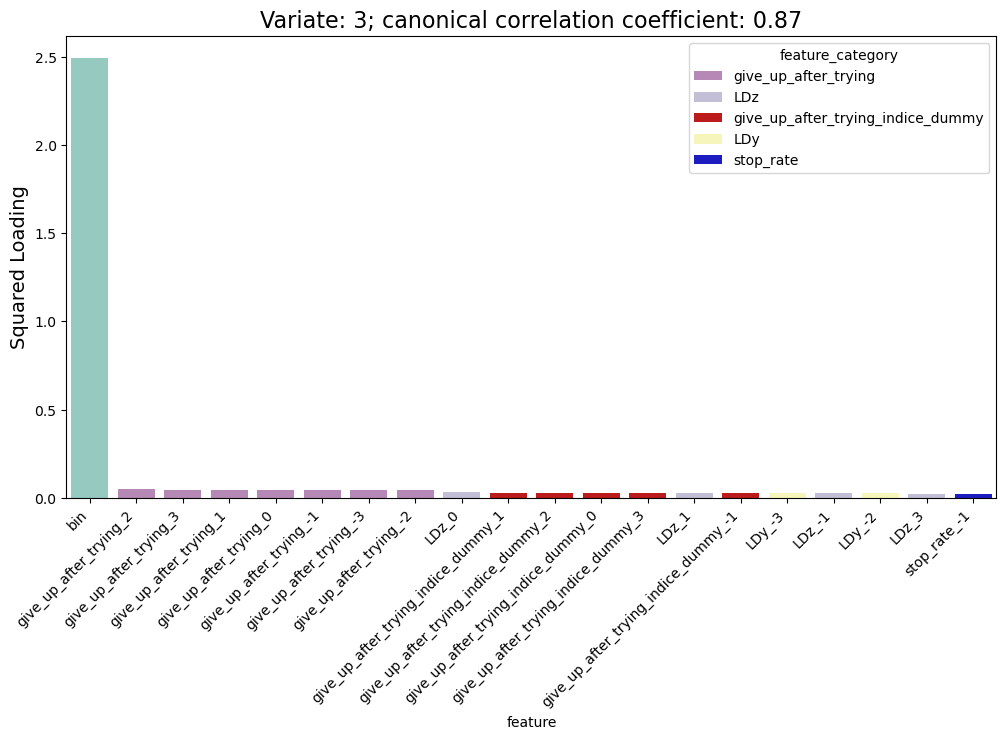

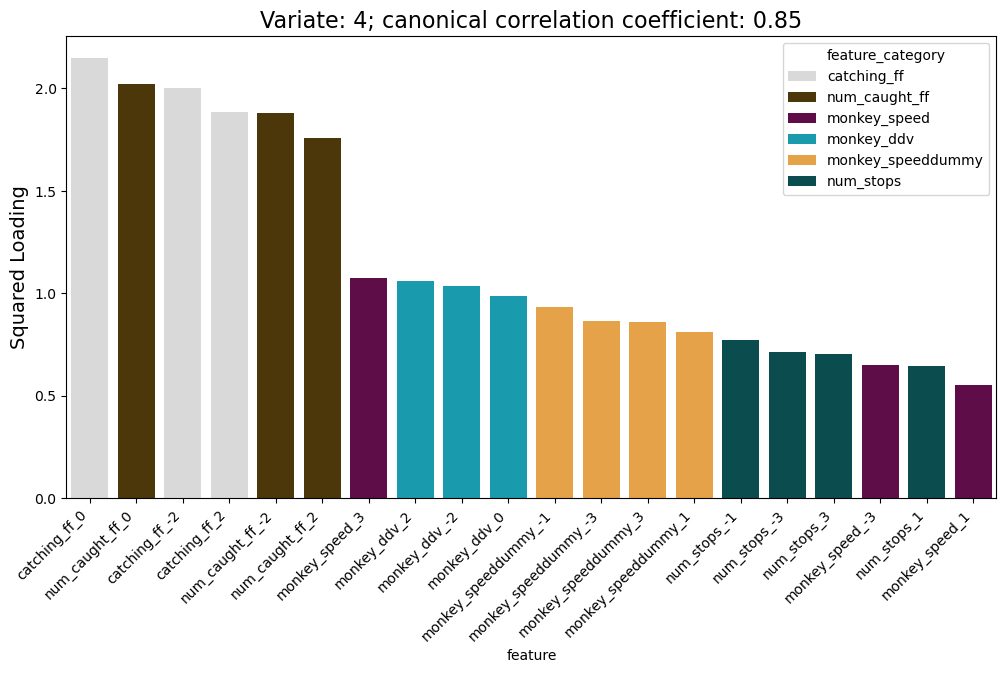

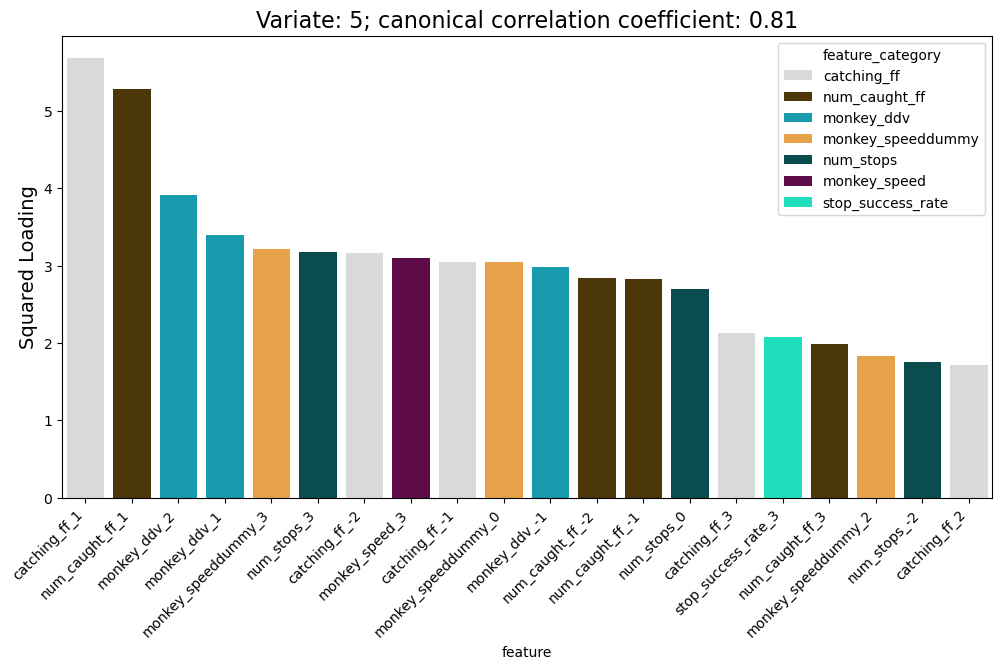

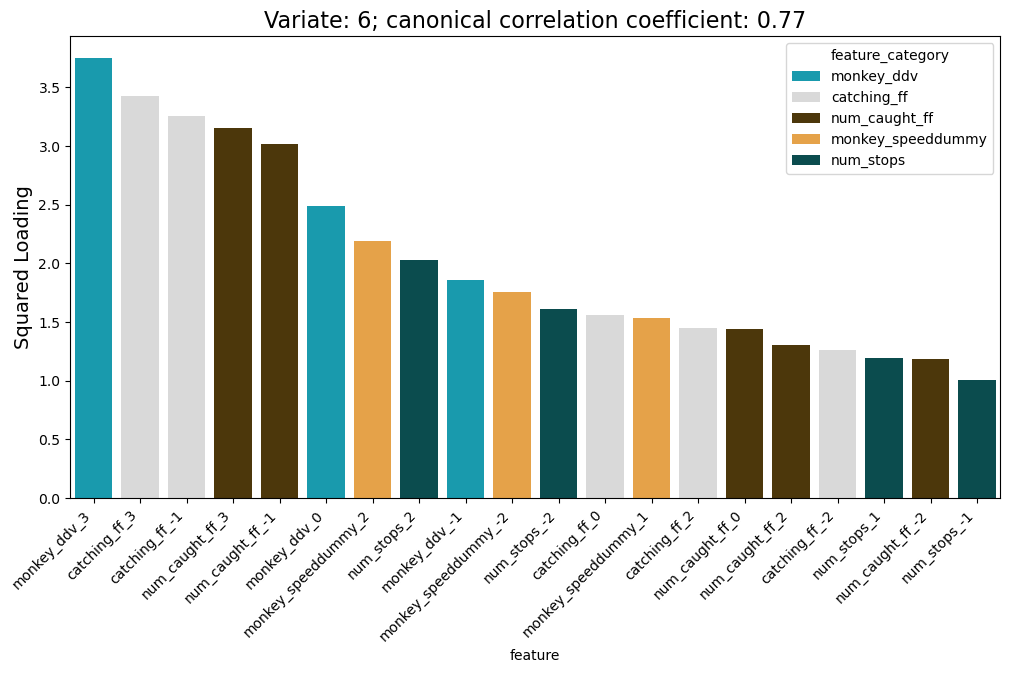

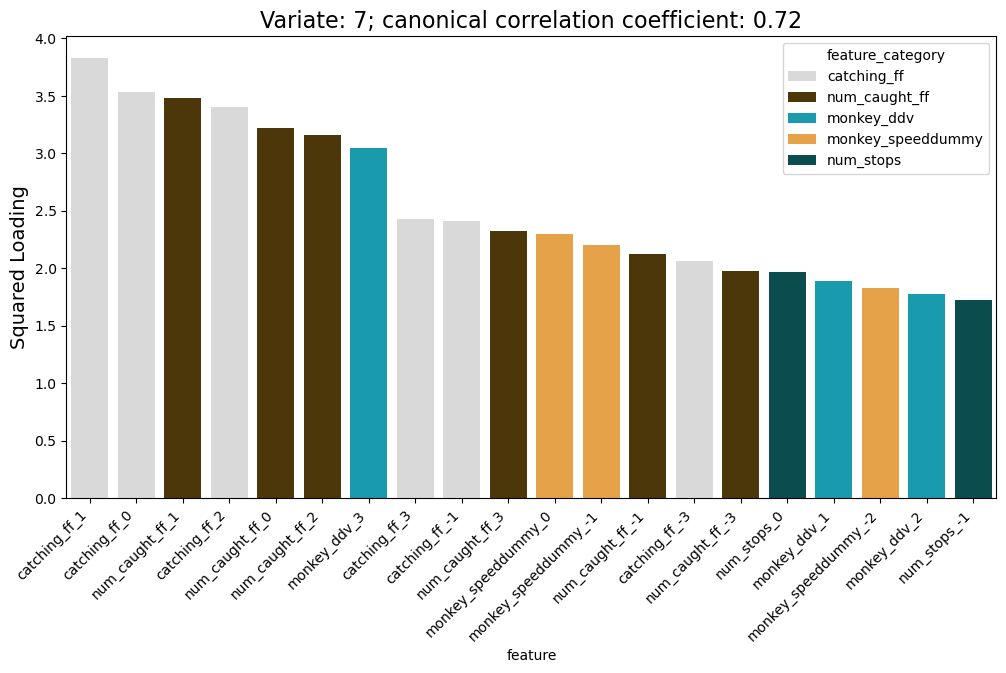

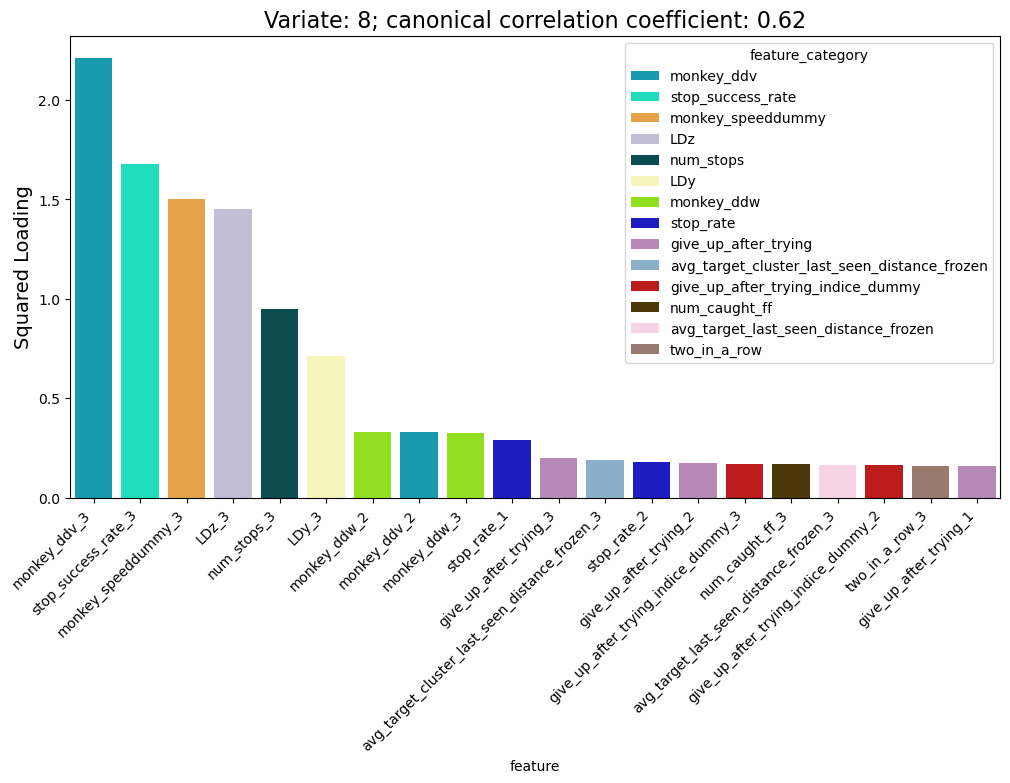

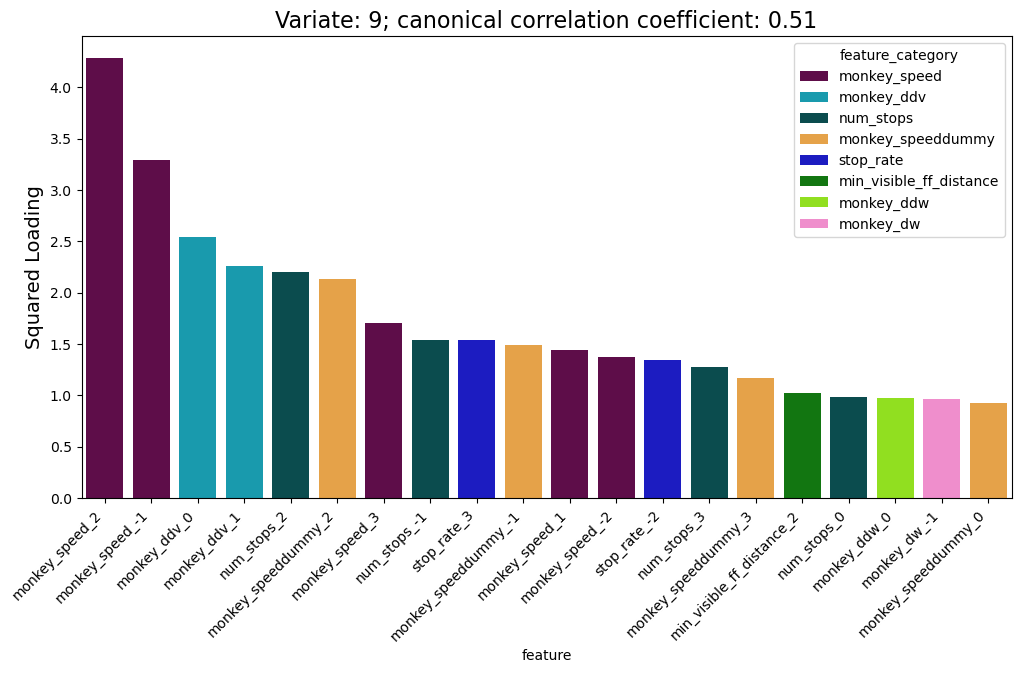

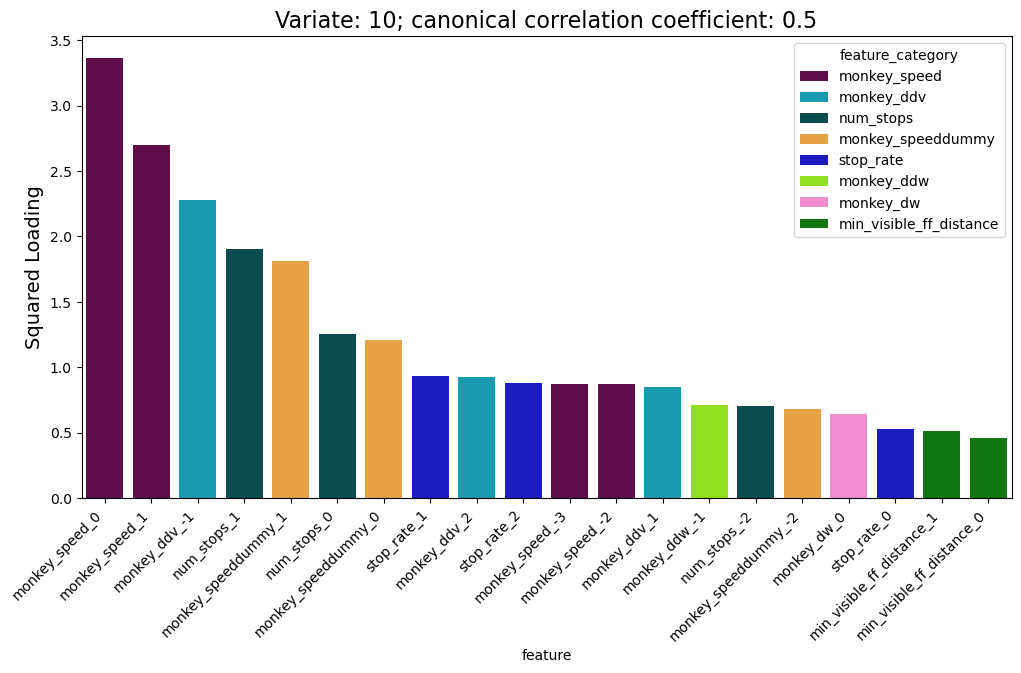

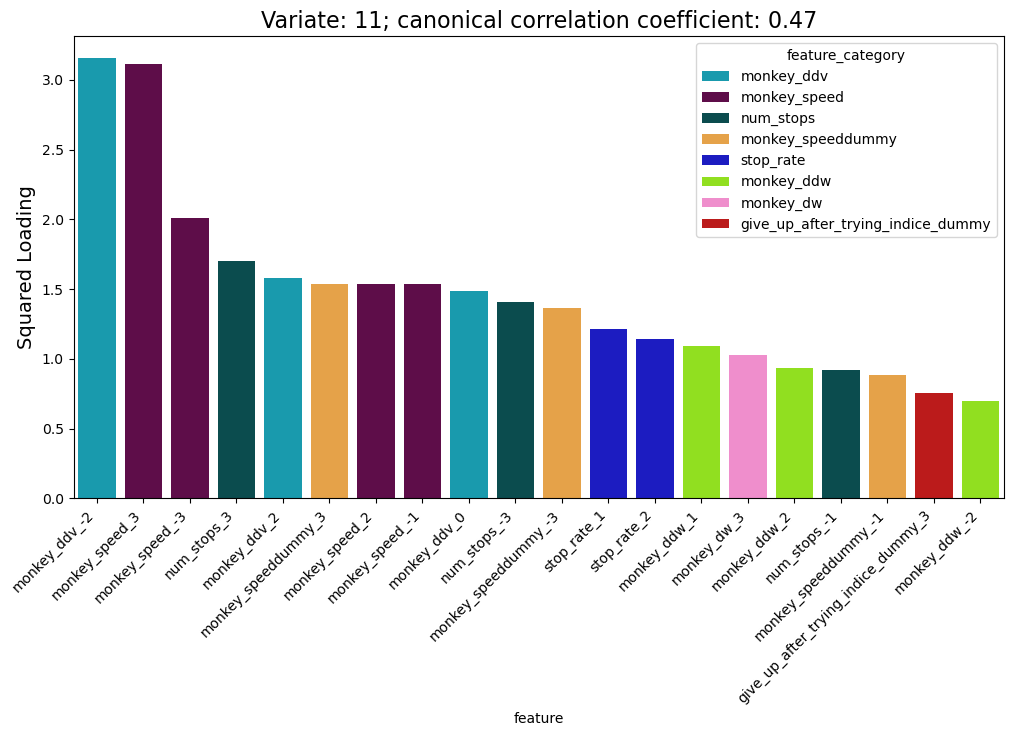

In [168]:
max_features_to_show = 20
unique_feature_category = np.array([])
for variate in range(cca.y_loadings_.shape[1]):
    loading_subset = loading_squared.sort_values(by=variate, ascending=False).iloc[:max_features_to_show]
    unique_feature_category = np.unique(np.concatenate([unique_feature_category, loading_subset.feature_category]))
print(len(unique_feature_category), "out of", len(loading_squared.feature_category.unique()), "feature categories are included in the plot")






# Assign a color to each feature category shown in the plot
# Take the colors from 2 colormaps because one is not enough
qualitative_colors = sns.color_palette("Set3", 10)  # this has only 10 unique colors, but prettier
qualitative_colors_2 = sns.color_palette(colorcet.glasbey, n_colors=len(unique_feature_category)-10)  # this has more unique colors, but a bit uglier
qualitative_colors.extend(qualitative_colors_2)


for variate in range(cca.y_loadings_.shape[1]):
    loading_subset = loading_squared.sort_values(by=variate, ascending=False).iloc[:max_features_to_show]
    color_dict = {}
    for i in range(len(unique_feature_category)):
        feature_category = unique_feature_category[i]
        color_dict[feature_category] = qualitative_colors[i]

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=loading_subset, x='feature', y=variate, dodge=False, ax=ax, hue='feature_category', palette=color_dict)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Squared Loading", fontsize=14)
    coefficient = np.around(np.array(comp_corr), 2)[variate]
    plt.title('Variate: ' + str(variate) + '; canonical correlation coefficient: ' + str(coefficient), fontsize=16)
    plt.show()
    plt.close()

## behavioral features' importance

In [169]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [X2.columns])
coef_df_max= coef_df.max(axis=0).reset_index(drop=False).rename(columns={"level_0": "feature", 0: "max_coef"})
coef_df_min = coef_df.min(axis=0).reset_index(drop=False).rename(columns={"level_0": "feature", 0: "min_coef"})
coef_df_summary = coef_df_max.merge(coef_df_min, on="feature")
coef_df_summary['feature_category'] = coef_df_summary['feature'].apply(lambda x: '_'.join(x.split('_')[:-1]))
coef_df_summary.sort_values(by="max_coef", ascending=False).head(5)

feature  max_coef  min_coef   feature_category
113       catching_ff_-2      4.14     -1.16        catching_ff
70      num_caught_ff_-2      3.96     -1.12      num_caught_ff
398        catching_ff_3      2.98     -1.56        catching_ff
355      num_caught_ff_3      2.90     -1.51      num_caught_ff
357  stop_success_rate_3      2.47     -0.55  stop_success_rate

In [170]:
coef_df_summary.sort_values(by="min_coef", ascending=True).head(5)

feature  max_coef  min_coef  \
9                               monkey_speeddummy_-3      0.74     -2.42   
6                                    monkey_speed_-3      0.96     -2.24   
353                                     monkey_ddv_3      2.02     -2.13   
12                                      num_stops_-3      0.75     -2.01   
95   avg_target_cluster_last_seen_distance_frozen_-2      0.67     -1.72   

                                 feature_category  
9                               monkey_speeddummy  
6                                    monkey_speed  
353                                    monkey_ddv  
12                                      num_stops  
95   avg_target_cluster_last_seen_distance_frozen

15 out of 58 feature categories are included in the plot


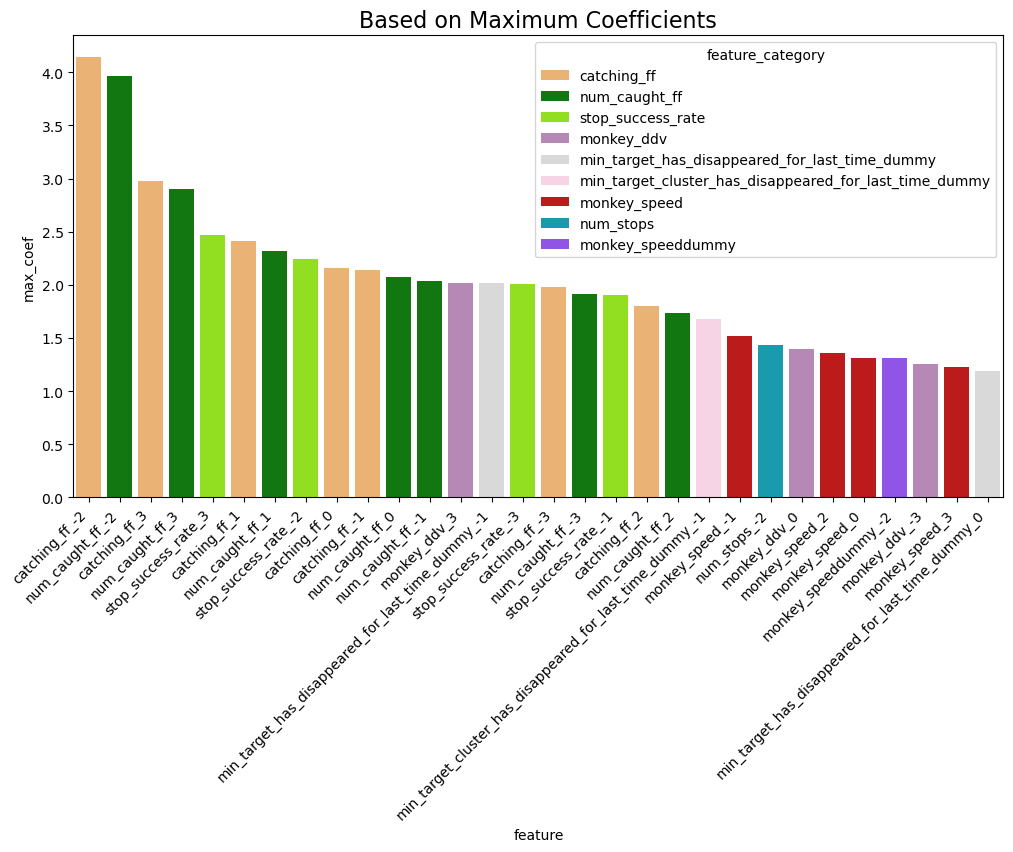

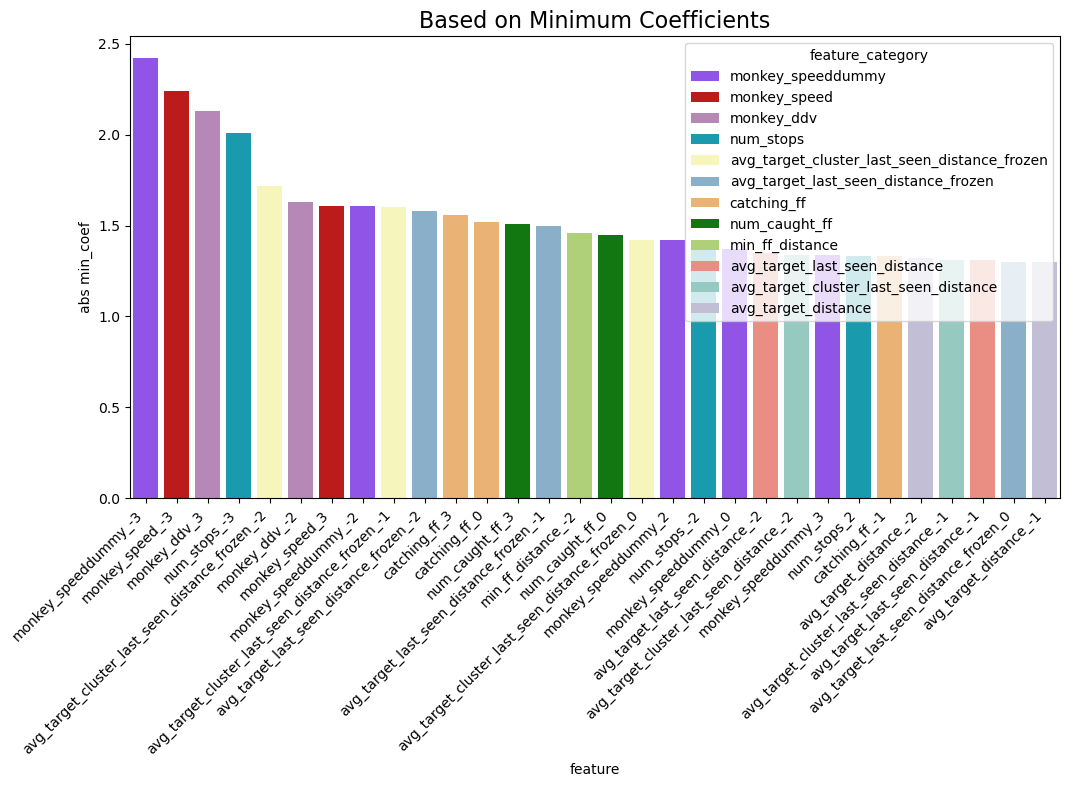

In [171]:
max_features_to_show = 30
coef_max_subset = coef_df_summary.sort_values(by="max_coef", ascending=False).iloc[:max_features_to_show]
coef_min_subset = coef_df_summary.sort_values(by="min_coef", ascending=True).iloc[:max_features_to_show]
coef_min_subset['abs_min_coef'] = abs(coef_min_subset['min_coef'])
unique_feature_category = np.unique(np.concatenate([coef_max_subset.feature_category, coef_min_subset.feature_category]))
print(len(unique_feature_category), "out of", len(coef_df_summary.feature_category.unique()), "feature categories are included in the plot")

# Assign a color to each feature category shown in the plot
# Take the colors from 2 colormaps because one is not enough
qualitative_colors = sns.color_palette("Set3", 10)  # this has only 10 unique colors, but prettier
qualitative_colors_2 = sns.color_palette(colorcet.glasbey, n_colors=len(unique_feature_category)-10)  # this has more unique colors, but a bit uglier
qualitative_colors.extend(qualitative_colors_2)


color_dict = {}
for i in range(len(unique_feature_category)):
    feature_category = unique_feature_category[i]
    color_dict[feature_category] = qualitative_colors[i]
#coef_df_summary['color'] = coef_df_summary['feature_category'].apply(lambda x: color_dict[x])

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=coef_max_subset, x='feature', y='max_coef', dodge=False, ax=ax, hue='feature_category', palette=color_dict)
#plt.bar(coef_subset['feature'], coef_subset['max_coef'], color=coef_subset['color'])  # This is another method using Matplotlib
plt.xticks(rotation=45, ha='right')
plt.ylabel("max_coef")
plt.title("Based on Maximum Coefficients", fontsize=16)
plt.show()
plt.close()


fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=coef_min_subset, x='feature', y='abs_min_coef', hue='feature_category', dodge=False, palette=color_dict)
plt.xticks(rotation=45, ha='right')
plt.ylabel("abs min_coef")
plt.title("Based on Minimum Coefficients", fontsize=16)
plt.show()
plt.close()

## neurons' importance

In [172]:
cca.coef_.shape

(112, 400)

In [173]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
coef_df = pd.DataFrame(np.round(cca.coef_, 2).T, columns = [X1.columns])
coef_df_max= coef_df.max(axis=0).reset_index(drop=False).rename(columns={"level_0": "feature", 0: "max_coef"})
coef_df_min = coef_df.min(axis=0).reset_index(drop=False).rename(columns={"level_0": "feature", 0: "min_coef"})
coef_df_summary = coef_df_max.merge(coef_df_min, on="feature")
coef_df_summary['feature_category'] = coef_df_summary['feature'].apply(lambda x: '_'.join(x.split('_')[:-1]))
coef_df_summary.sort_values(by="max_coef", ascending=False).head(5)

feature  max_coef  min_coef feature_category
6    unit_6_-3      4.14     -2.42           unit_6
86    unit_6_2      2.98     -2.13           unit_6
101   unit_5_3      2.47     -1.61           unit_5
54    unit_6_0      2.41     -1.37           unit_6
38   unit_6_-1      2.16     -1.27           unit_6

In [174]:
coef_df_summary.sort_values(by="min_coef", ascending=True).head(5)

feature  max_coef  min_coef feature_category
6    unit_6_-3      4.14     -2.42           unit_6
86    unit_6_2      2.98     -2.13           unit_6
101   unit_5_3      2.47     -1.61           unit_5
5    unit_5_-3      2.14     -1.61           unit_5
53    unit_5_0      1.43     -1.56           unit_5

6 out of 16 feature categories are included in the plot


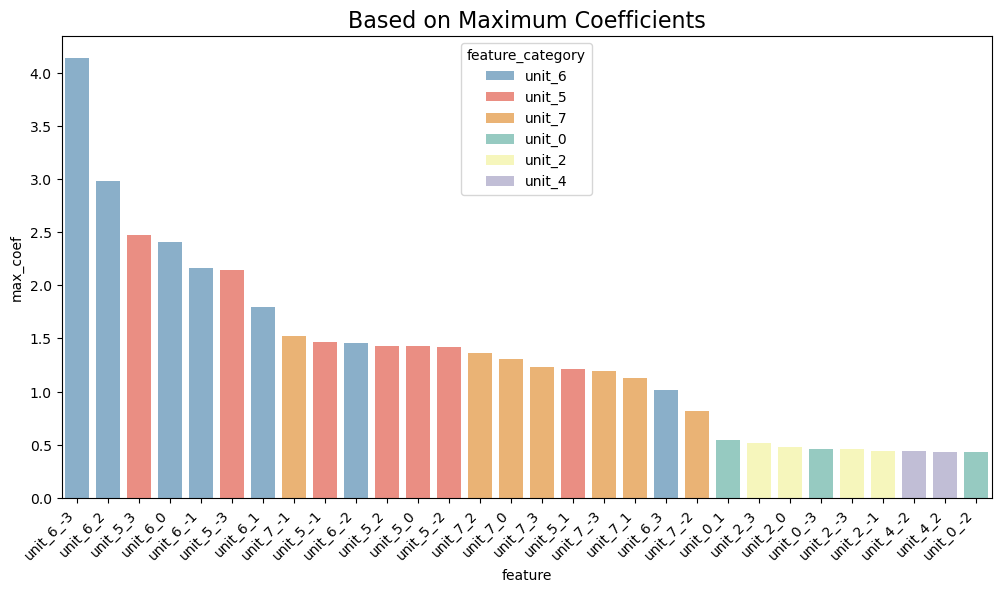

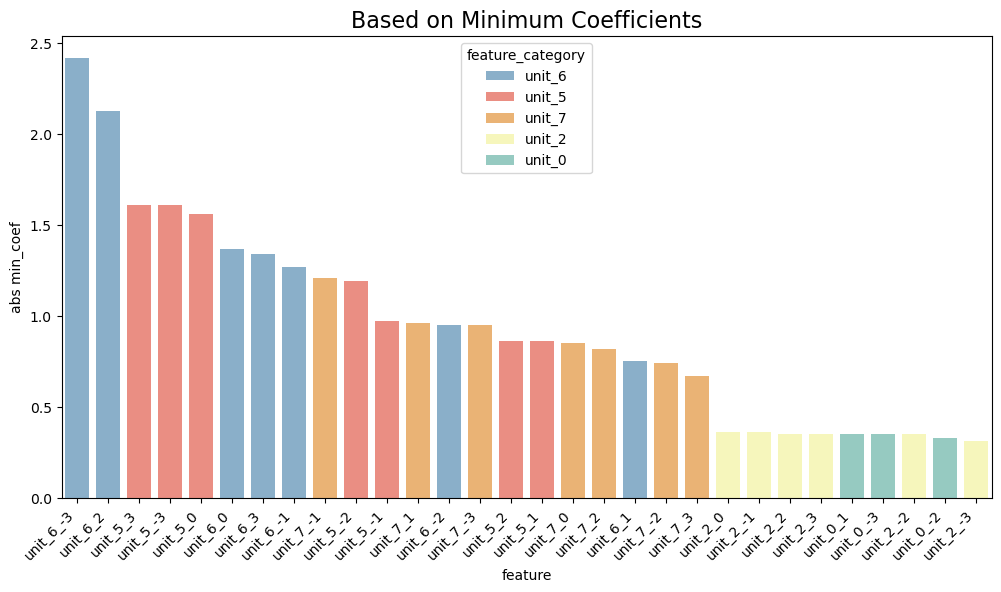

In [175]:
max_features_to_show = 30
coef_max_subset = coef_df_summary.sort_values(by="max_coef", ascending=False).iloc[:max_features_to_show]
coef_min_subset = coef_df_summary.sort_values(by="min_coef", ascending=True).iloc[:max_features_to_show]
coef_min_subset['abs_min_coef'] = abs(coef_min_subset['min_coef'])
unique_feature_category = np.unique(np.concatenate([coef_max_subset.feature_category, coef_min_subset.feature_category]))
print(len(unique_feature_category), "out of", len(coef_df_summary.feature_category.unique()), "feature categories are included in the plot")

# Assign a color to each feature category shown in the plot
# Take the colors from 2 colormaps because one is not enough
qualitative_colors = sns.color_palette("Set3", 10)  # this has only 10 unique colors, but prettier
qualitative_colors_2 = sns.color_palette(colorcet.glasbey, n_colors=len(unique_feature_category)-10)  # this has more unique colors, but a bit uglier
qualitative_colors.extend(qualitative_colors_2)


color_dict = {}
for i in range(len(unique_feature_category)):
    feature_category = unique_feature_category[i]
    color_dict[feature_category] = qualitative_colors[i]
#coef_df_summary['color'] = coef_df_summary['feature_category'].apply(lambda x: color_dict[x])

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=coef_max_subset, x='feature', y='max_coef', dodge=False, ax=ax, hue='feature_category', palette=color_dict)
#plt.bar(coef_subset['feature'], coef_subset['max_coef'], color=coef_subset['color'])  # This is another method using Matplotlib
plt.xticks(rotation=45, ha='right')
plt.ylabel("max_coef")
plt.title("Based on Maximum Coefficients", fontsize=16)
plt.show()
plt.close()


fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=coef_min_subset, x='feature', y='abs_min_coef', hue='feature_category', dodge=False, palette=color_dict)
plt.xticks(rotation=45, ha='right')
plt.ylabel("abs min_coef")
plt.title("Based on Minimum Coefficients", fontsize=16)
plt.show()
plt.close()

## Distribution of each feature

In [176]:
X2_sc_df = pd.DataFrame(X2_sc, columns = X2.columns)
X2_sc_df.describe()

LDy_-3   LDz_-3  gaze_monkey_view_x_-3  gaze_monkey_view_y_-3  \
count 14397.00 14397.00               14397.00               14397.00   
mean      0.00    -0.00                  -0.00                   0.00   
std       1.00     1.00                   1.00                   1.00   
min      -6.29    -3.67                  -6.51                  -6.34   
25%      -0.33    -0.44                  -0.34                  -0.32   
50%       0.11    -0.12                  -0.02                   0.03   
75%       0.49     0.25                   0.33                   0.32   
max       4.88     9.49                   6.49                   6.31   

       gaze_world_x_-3  gaze_world_y_-3  monkey_speed_-3  monkey_angles_-3  \
count         14397.00         14397.00         14397.00          14397.00   
mean              0.00            -0.00             0.00              0.00   
std               1.00             1.00             1.00              1.00   
min              -1.94            -1.96            -1.50             -1.81   
25%              -0.79            -0.77            -1.04             -0.88   
50%              -0.05            -0.00             0.19              0.03   
75%               0.78             0.78             1.02              0.89   
max               2.05             1.92             1.17              1.72   

       monkey_dw_-3  monkey_speeddummy_-3  ...  two_in_a_row_3  \
count      14397.00              14397.00  ...        14397.00   
mean           0.00                 -0.00  ...           -0.00   
std            1.00                  1.00  ...            1.00   
min           -3.09                 -3.57  ...           -0.11   
25%           -0.21                 -0.50  ...           -0.11   
50%           -0.09                  0.62  ...           -0.11   
75%            0.46                  0.62  ...           -0.11   
max            2.67                  0.62  ...            9.32   

       visible_before_last_one_3  disappear_latest_3  ignore_sudden_flash_3  \
count                   14397.00            14397.00               14397.00   
mean                        0.00               -0.00                  -0.00   
std                         1.00                1.00                   1.00   
min                        -0.35               -0.49                  -0.42   
25%                        -0.35               -0.49                  -0.42   
50%                        -0.35               -0.49                  -0.42   
75%                        -0.35               -0.49                  -0.42   
max                         2.84                2.05                   2.37   

       try_a_few_times_3  give_up_after_trying_3  cluster_around_target_3  \
count           14397.00                14397.00                 14397.00   
mean                0.00                    0.00                     0.00   
std                 1.00                    1.00                     1.00   
min                -0.35                   -0.67                    -0.40   
25%                -0.35                   -0.67                    -0.40   
50%                -0.35                   -0.67                    -0.40   
75%                -0.35                    1.49                    -0.40   
max                 2.82                    1.49                     2.53   

       waste_cluster_around_target_3  catching_ff_3      bin  
count                       14397.00       14397.00 14397.00  
mean                            0.00           0.00     0.00  
std                             1.00           1.00     1.00  
min                            -0.34          -0.31    -1.73  
25%                            -0.34          -0.31    -0.87  
50%                            -0.34          -0.31     0.00  
75%                            -0.34          -0.31     0.87  
max                             2.98           3.26     1.73  

[8 rows x 400 columns]

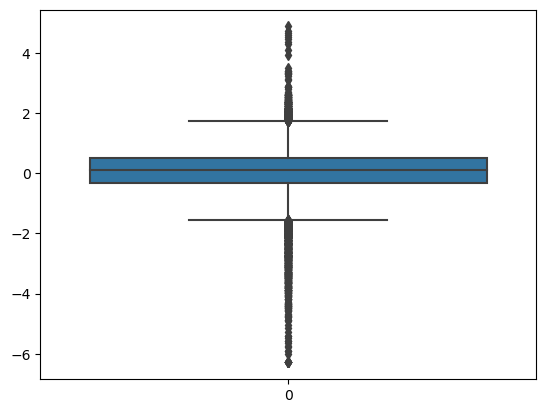

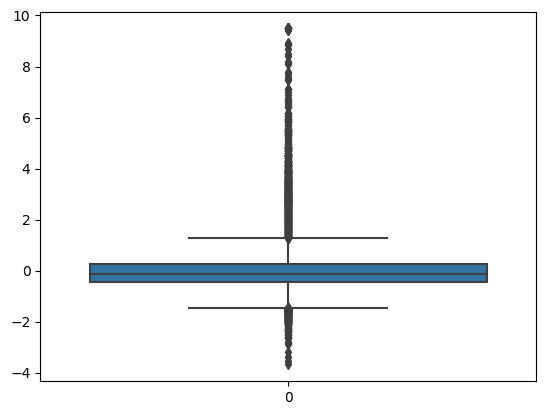

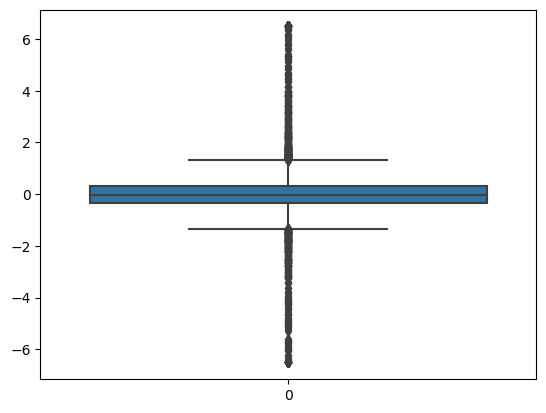

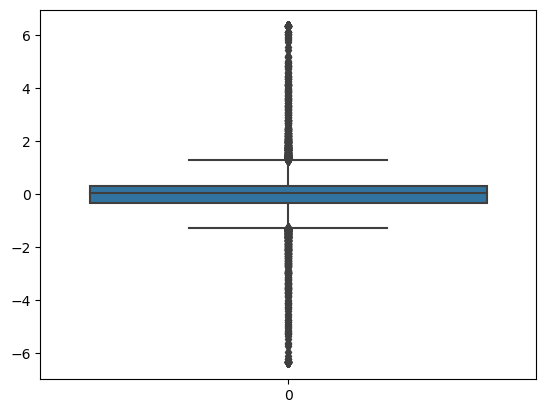

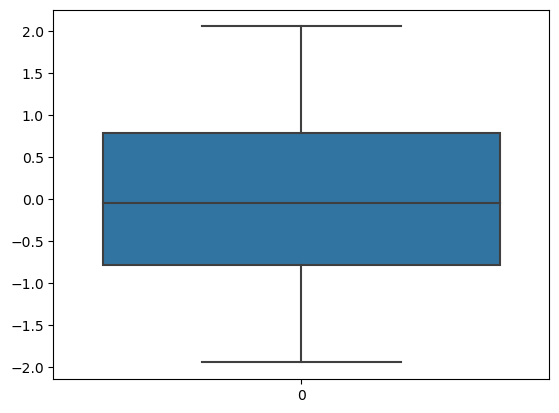

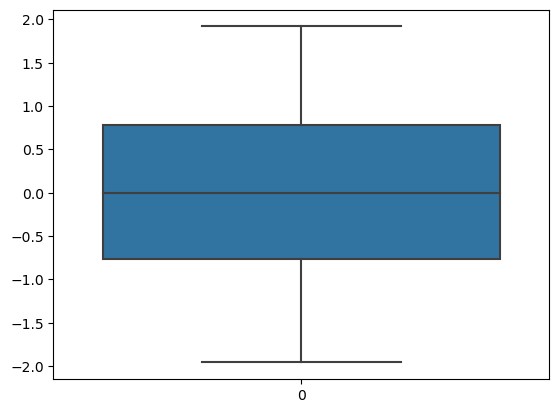

In [177]:
#for column in X2_sc_df.columns[:60]:
for column in X2_sc_df.columns[:6]:
    sns.boxplot(X2_sc_df[column])
    plt.show()
    plt.close()

## Correlations between features

In [178]:
final_behavioral_data.columns

Index(['bin', 'LDy', 'LDz', 'RDy', 'RDz', 'gaze_monkey_view_x',
       'gaze_monkey_view_y', 'gaze_world_x', 'gaze_world_y', 'monkey_speed',
       'monkey_angles', 'monkey_dw', 'monkey_speeddummy', 'monkey_ddw',
       'monkey_ddv', 'num_stops', 'num_caught_ff', 'stop_rate',
       'stop_success_rate', 'num_ff', 'num_visible_ff', 'min_ff_distance',
       'min_abs_ff_angle', 'min_abs_ff_angle_boundary',
       'min_visible_ff_distance', 'min_abs_visible_ff_angle',
       'min_abs_visible_ff_angle_boundary', 'avg_target_distance',
       'avg_target_angle', 'avg_target_angle_to_boundary',
       'avg_target_last_seen_time', 'avg_target_last_seen_distance',
       'avg_target_last_seen_angle', 'avg_target_last_seen_angle_to_boundary',
       'avg_target_last_seen_distance_frozen',
       'avg_target_last_seen_angle_frozen',
       'avg_target_last_seen_angle_to_boundary_frozen',
       'avg_target_cluster_last_seen_time',
       'avg_target_cluster_last_seen_distance',
       'avg_targe

In [179]:
specific_columns = ['avg_target_last_seen_time',
       'avg_target_last_seen_distance', 'avg_target_last_seen_angle',
       'avg_target_last_seen_angle_to_boundary',
       'avg_target_cluster_last_seen_time',
       'avg_target_cluster_last_seen_distance',
       'avg_target_cluster_last_seen_angle',
       'avg_target_cluster_last_seen_angle_to_boundary',
       'avg_target_last_seen_distance_frozen',
       'avg_target_last_seen_angle_frozen',
       'avg_target_last_seen_angle_to_boundary_frozen',
       'avg_target_cluster_last_seen_distance_frozen',
       'avg_target_cluster_last_seen_angle_frozen',
       'avg_target_cluster_last_seen_angle_to_boundary_frozen']

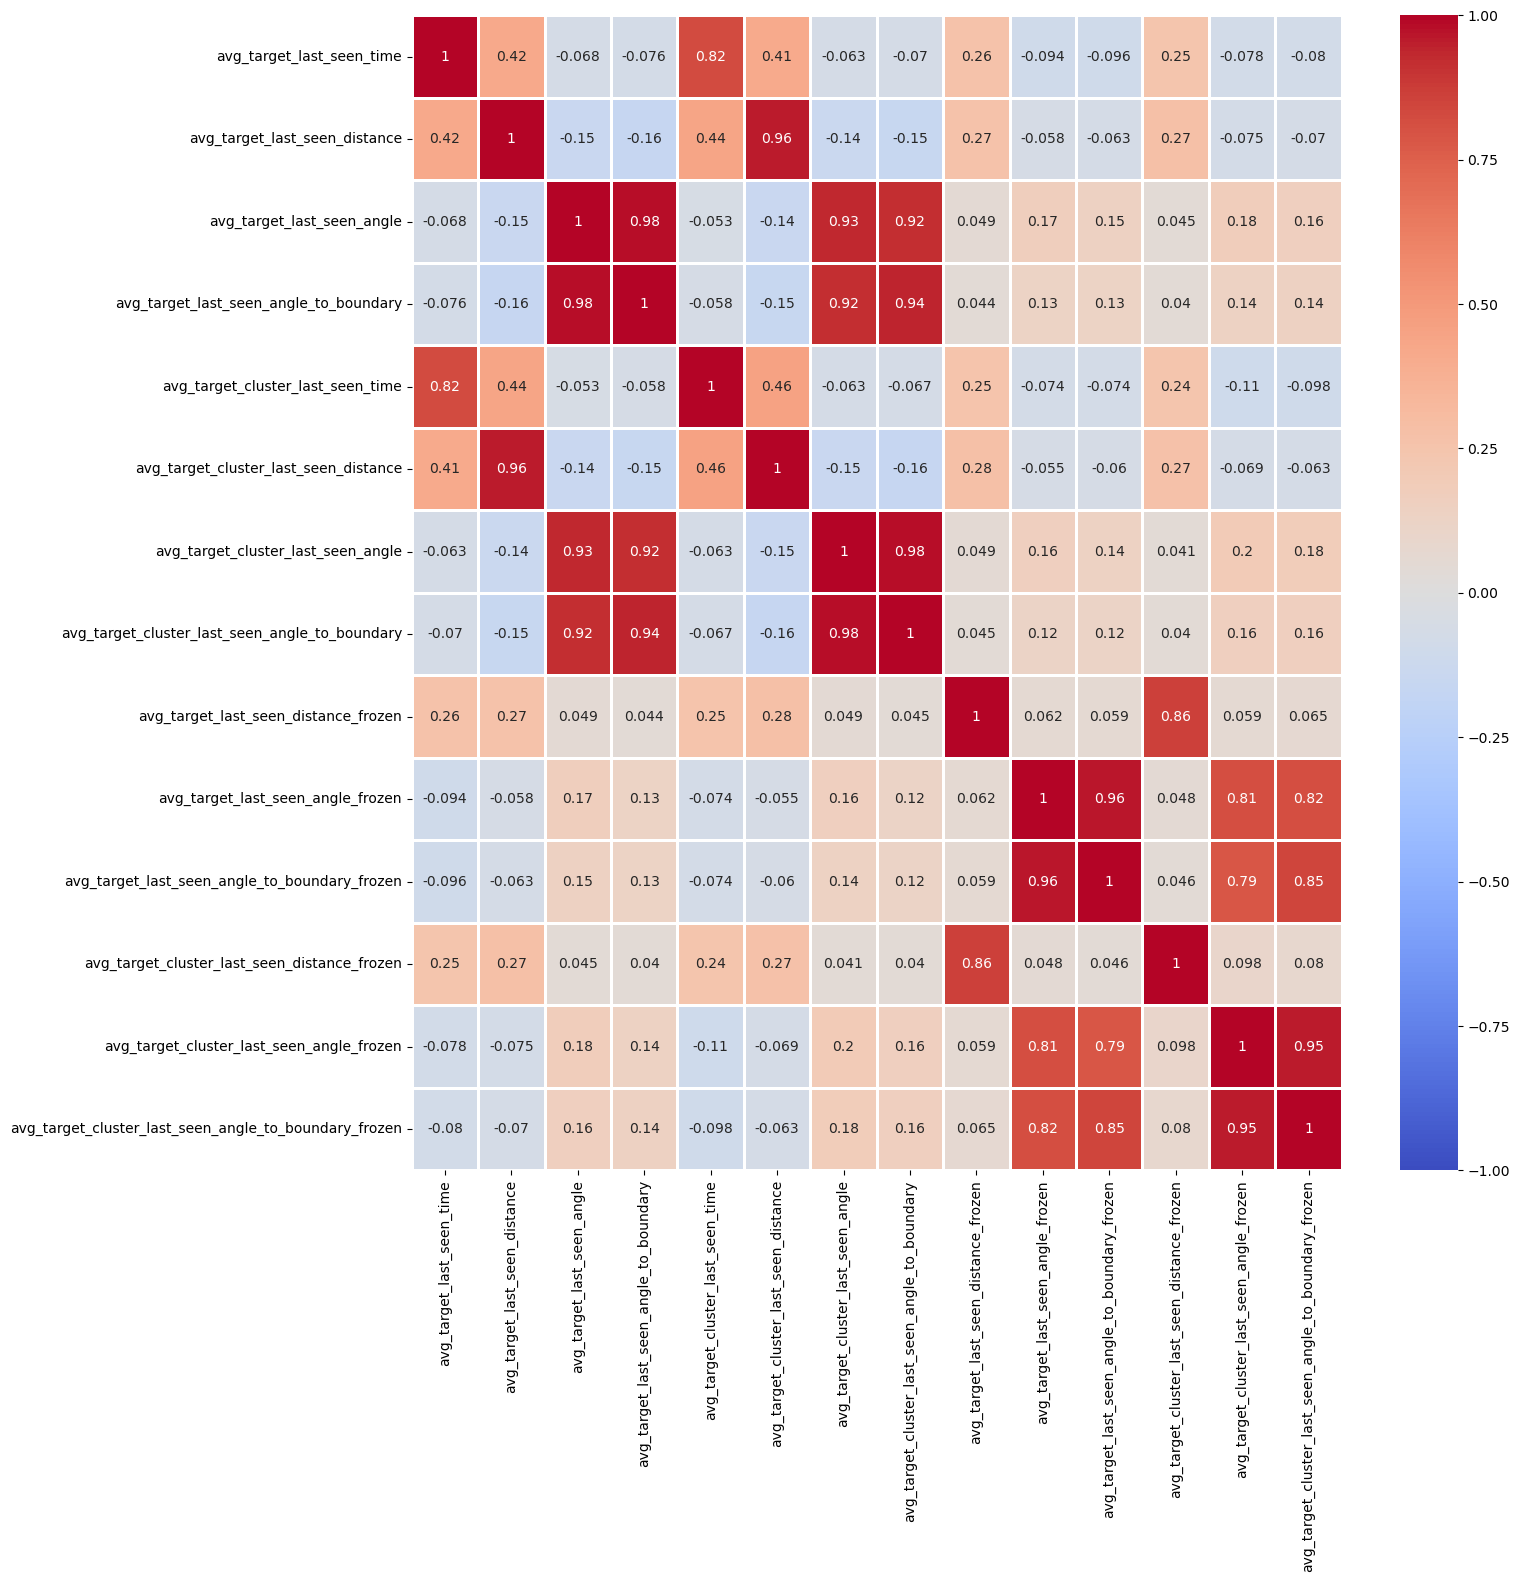

In [180]:
corr_coeff = final_behavioral_data[specific_columns].corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

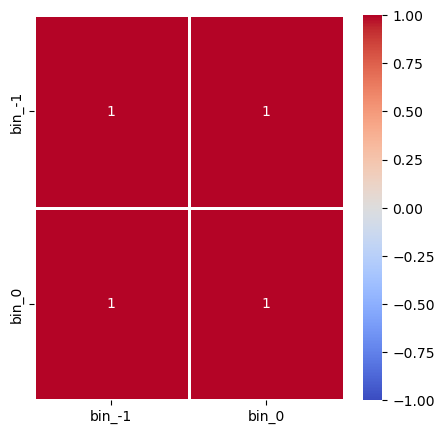

In [181]:
y_var_lags = add_lags_to_each_feature(final_behavioral_data, lag_numbers= range(-1, 1))
corr_coeff = y_var_lags[['bin_-1', 'bin_0']].corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

## Regular

[0.7132432993872951, 0.6767727478332565, 0.47372341946519214, 0.3137187270313309, 0.2136033508858979, 0.18737667917260953, 0.17000230266750418, 0.14722834260558756, 0.13814029533068756, 0.10762176097243684]


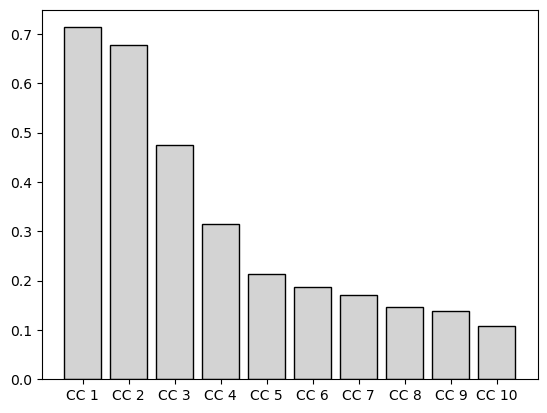

In [306]:
# #X1 = pd.DataFrame(neural_stacked_bins_sub) 
# X1 = modelX.copy()
# #X1 = x_var_lags.copy()
# X1 = pd.DataFrame(X1)
# X2 = final_behavioral_data # extract last two columns to create a petal-related features dataset


X1 = spikes_in_bins
X2 = final_behavioral_data
scaler = StandardScaler()
X1_sc = scaler.fit_transform(X1) #scale data
X2_sc = scaler.fit_transform(X2) 
n_comp=10 #choose number of canonical variates pairs 
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(n_comp)]
bar_names = ['CC {}'.format(i+1) for i in range(n_comp)]
print(comp_corr)
plt.bar(bar_names, comp_corr, color='lightgrey', width = 0.8, edgecolor='k')
plt.show() 
plt.close()

## loadings
which variables from both datasets influence their canonical variates the most. We do that by analyzing the loadings associated with each of our canonical variates. We get an array of shape (n_features, n_components).  -->

In [346]:
print(cca.x_loadings_.shape)
cca.x_loadings_

AttributeError: 'CCA' object has no attribute 'x_loadings_'

## weights

In [308]:
cca.x_weights_

array([[-0.0107468 , -0.01135256, -0.06273892,  0.13606434,  0.44963741,
        -0.32737089,  0.28438275,  0.07196738, -0.51306686,  0.22816472],
       [-0.02787428, -0.05809235,  0.00590457,  0.00797544,  0.31545282,
         0.30852002,  0.16168927,  0.77079323,  0.09307957,  0.16794048],
       [-0.04574577,  0.04905228,  0.1044477 ,  0.21080926, -0.06850008,
         0.80111167, -0.01332337, -0.20238332, -0.25759272,  0.05933879],
       [-0.13898725,  0.79662545, -0.06010248,  0.06623459, -0.09484487,
        -0.09103922, -0.40568   ,  0.21829723,  0.10216243,  0.1392634 ],
       [-0.12870392,  0.52182225, -0.01979892,  0.10726149,  0.10305126,
         0.02712566,  0.71216731, -0.19578081,  0.11006543, -0.19273939],
       [ 0.57267227,  0.1181356 ,  0.76846867,  0.20080542, -0.00672478,
        -0.11181889,  0.01813261,  0.07735983,  0.04195004,  0.00424574],
       [ 0.781417  ,  0.12537137, -0.58889935,  0.04917109,  0.06887585,
         0.11939813, -0.00861455, -0.0417619 

In [284]:
cca.y_weights_

array([[-0.08027347,  0.81061569, -0.12848561, -0.40224873, -0.0089174 ,
        -0.07123828,  0.17804479,  0.00170095,  0.05539609, -0.08777842],
       [ 0.00011224,  0.01565249,  0.05134909, -0.06564211, -0.6172532 ,
         0.32941092, -0.01816815, -0.11275718, -0.12875246,  0.05484885],
       [ 0.02692102, -0.16296292,  0.10873053, -0.0271703 ,  0.02547783,
         0.16256265,  0.32097023,  0.25381837,  0.09328455,  0.06855852],
       [-0.04565705, -0.02361446, -0.16960336,  0.10390389,  0.62743949,
        -0.05829069,  0.01818522, -0.2431259 ,  0.07060251,  0.09218945],
       [-0.05452062,  0.1558513 , -0.10678565,  0.00262702,  0.1000454 ,
         0.03723261, -0.3199586 , -0.49896659, -0.1840363 ,  0.01838434],
       [-0.0031289 ,  0.00243935, -0.0101173 ,  0.01738711, -0.00351654,
        -0.01765754,  0.03705952,  0.00919459,  0.0167627 , -0.04867264],
       [ 0.00269434,  0.01073965, -0.00466721, -0.01380762,  0.00918608,
        -0.02722243,  0.00103561,  0.03819819

## heatmap
raw canonical coefficients are interpreted in a manner analogous to interpreting regression coefficients. For example: a one unit increase in reading leads to a .0446 decrease in the first canonical variate of set 2 when all of the other variables are held constant (in some other data)

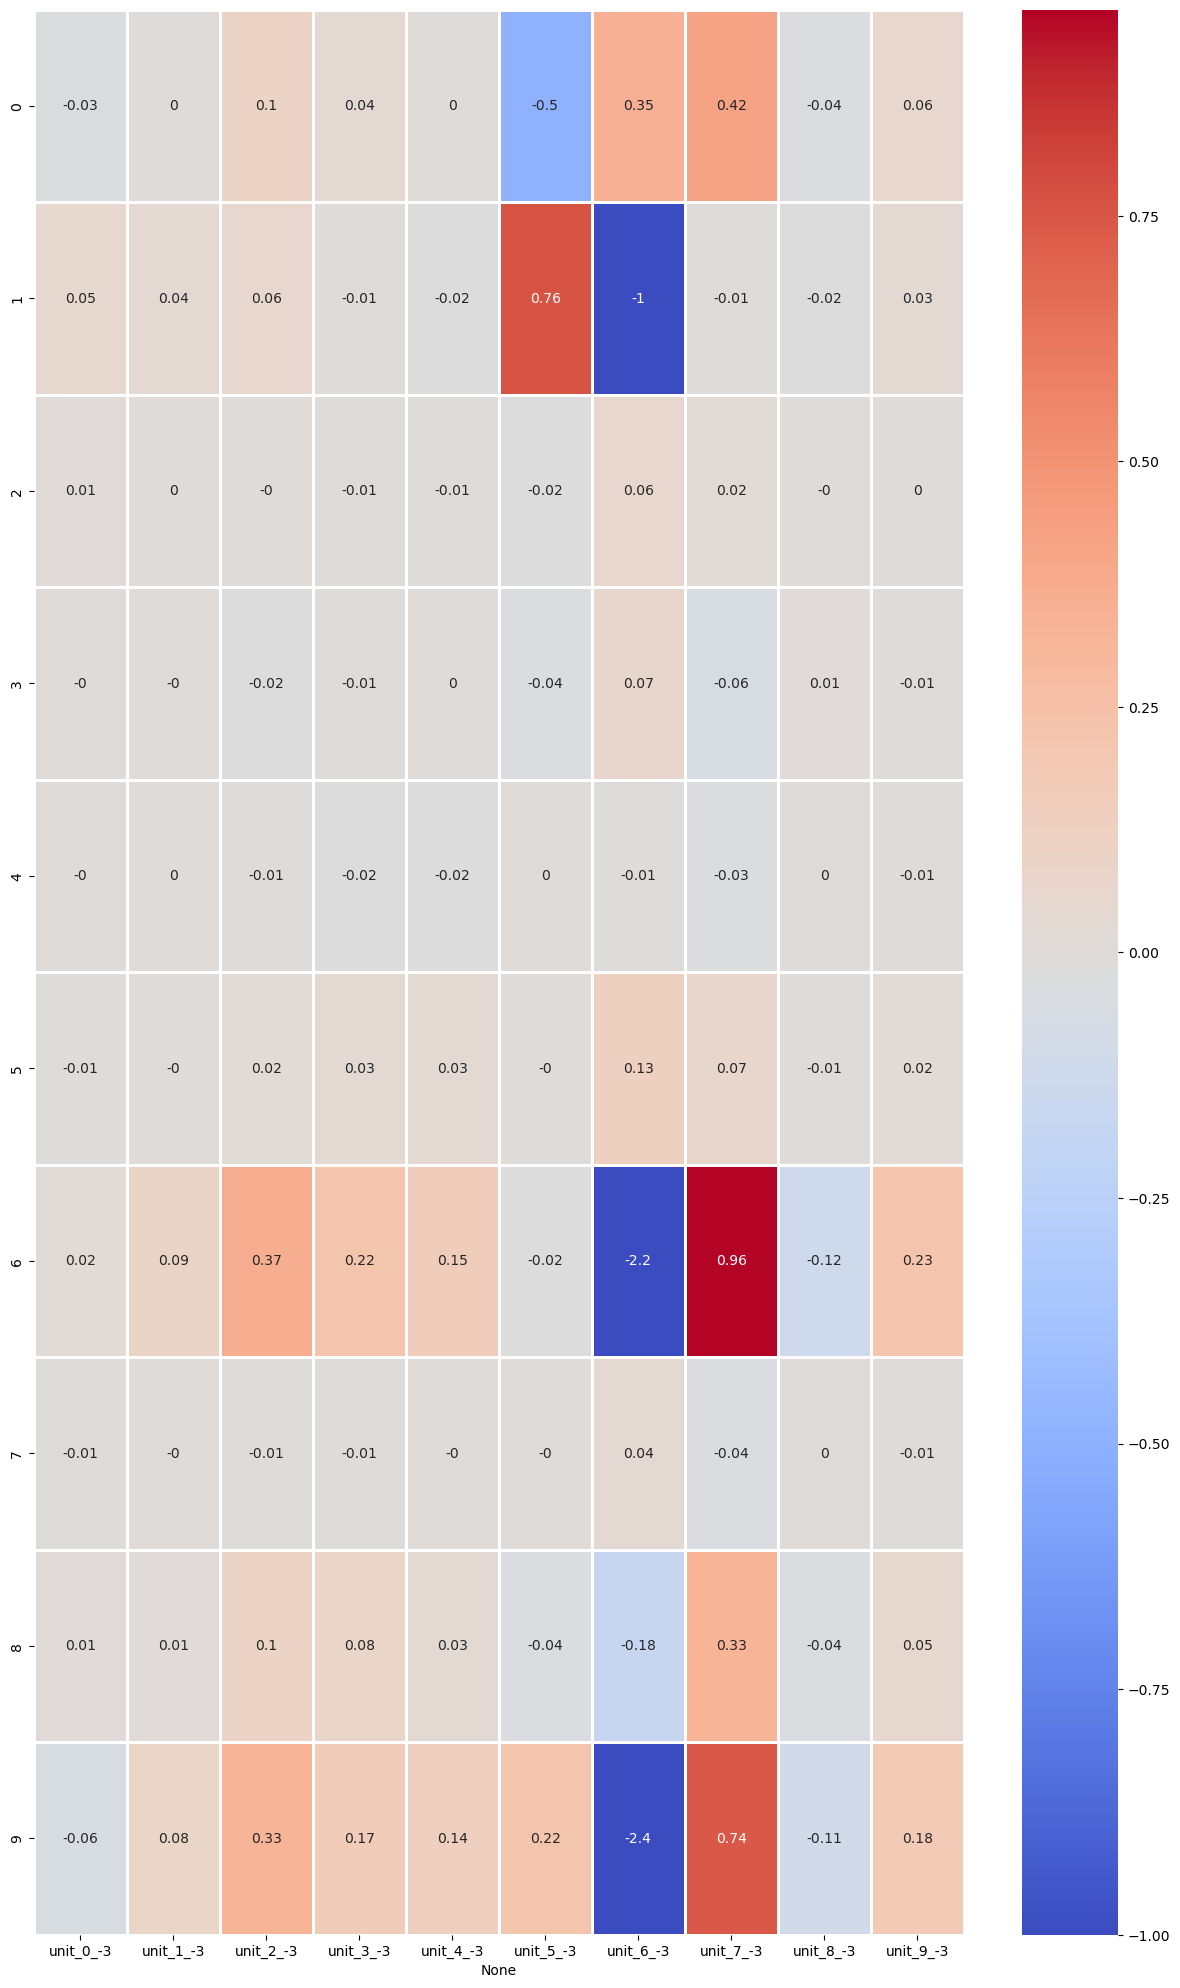

In [185]:
plt.subplots(figsize=(15, 25))
sns.heatmap(coef_df.iloc[:10, :10], cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

In [231]:
cca.x_weights_

array([[-0.0107468 , -0.01135256, -0.06273892,  0.13606434,  0.44963741,
        -0.32737089],
       [-0.02787428, -0.05809235,  0.00590457,  0.00797544,  0.31545282,
         0.30852002],
       [-0.04574577,  0.04905228,  0.1044477 ,  0.21080926, -0.06850008,
         0.80111167],
       [-0.13898725,  0.79662545, -0.06010248,  0.06623459, -0.09484487,
        -0.09103922],
       [-0.12870392,  0.52182225, -0.01979892,  0.10726149,  0.10305126,
         0.02712566],
       [ 0.57267227,  0.1181356 ,  0.76846867,  0.20080542, -0.00672478,
        -0.11181889],
       [ 0.781417  ,  0.12537137, -0.58889935,  0.04917109,  0.06887585,
         0.11939813],
       [-0.12566657, -0.15176507, -0.13009546,  0.9316676 , -0.04125955,
        -0.10676486],
       [ 0.01999547,  0.01813032, -0.07717317, -0.00549986, -0.1012905 ,
        -0.21666514],
       [-0.06124377,  0.03156563,  0.05376146, -0.00967682,  0.78376088,
         0.08373161],
       [ 0.02272402,  0.09367344,  0.12848905, -0.

# Pyrcca

## data scaling and splitting

In [294]:
X1 = spikes_in_bins
X2 = final_behavioral_data

In [295]:
scaler = StandardScaler()
X1_sc = scaler.fit_transform(X1) #scale data
X2_sc = scaler.fit_transform(X2) 

In [296]:
final_behavioral_data.shape

(14397, 60)

In [297]:
nSamples = len(X1)  
cutting_point = int(nSamples/2)
train1 = X1_sc[:cutting_point, :]
train2 = X2_sc[:cutting_point, :]
test1 = X1_sc[cutting_point:, :]
test2 = X2_sc[cutting_point:, :]

## train and validate

In [298]:
# use all data

nComponents = 10 # min(p,q) components
cca2 = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents,)
cca2.train([X1_sc, X2_sc])
print('Canonical Correlation Per Component Pair:',cca2.cancorrs)
print('% Shared Variance:',cca2.cancorrs**2)

Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.71324562 0.6767706  0.47372339 0.31371873 0.21360348 0.18737692
 0.17000209 0.14722853 0.13814004 0.10762202]
% Shared Variance: [0.50871931 0.45801845 0.22441385 0.09841944 0.04562645 0.03511011
 0.02890071 0.02167624 0.01908267 0.0115825 ]


In [299]:
# # use training and testing set
# nComponents = 4
# cca2 = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents)
# cca2.train([train1, train2])
# testcorrs = cca2.validate([test1, test2])
# testcorrs

## compute_ev

In [300]:
cca2.compute_ev([test1, test2])

Computing explained variance for component #1
Computing explained variance for component #2
Computing explained variance for component #3
Computing explained variance for component #4
Computing explained variance for component #5
Computing explained variance for component #6
Computing explained variance for component #7
Computing explained variance for component #8
Computing explained variance for component #9
Computing explained variance for component #10


[array([[0.25147484, 0.27366902, 0.39645533, 0.32564049, 0.25852531,
         0.46719666, 0.62173206, 0.45831515, 0.02742656, 0.37549203,
         0.06794451, 0.12216938, 0.08036321, 0.19838103, 0.23141898,
         0.07335579],
        [0.20903581, 0.1331096 , 0.29453413, 0.68668369, 0.25188733,
         0.33621511, 0.32437507, 0.27229156, 0.18422102, 0.26853269,
         0.23852601, 0.08721098, 0.24899317, 0.1476619 , 0.1977881 ,
         0.11678116],
        [0.11805407, 0.08739938, 0.20324576, 0.22629141, 0.15682511,
         0.31780535, 0.1380915 , 0.2010034 , 0.01253099, 0.19047099,
         0.17232138, 0.31031366, 0.06817991, 0.4354258 , 0.07149703,
         0.07993646],
        [0.20700461, 0.11481498, 0.30676809, 0.24654344, 0.14986285,
         0.17024242, 0.16316124, 0.41903086, 0.0768569 , 0.13953468,
         0.14661486, 0.15166927, 0.1773952 , 0.20871944, 0.10550085,
         0.06247345],
        [0.24860163, 0.16186834, 0.24214344, 0.27639693, 0.1914079 ,
         0.1471

## canonical components

In [301]:
# canonical components
cca2.comps

[array([[ 0.00006666, -0.00668242,  0.00024366, ..., -0.00111254,
          0.00267919, -0.00069298],
        [ 0.00029472, -0.00643539,  0.00079521, ..., -0.0018583 ,
          0.00460733, -0.0003326 ],
        [ 0.00017376, -0.00689659,  0.00069832, ..., -0.00994512,
         -0.0101511 ,  0.01382051],
        ...,
        [ 0.00532601,  0.00805835, -0.00104286, ...,  0.00047187,
         -0.00056375, -0.0044588 ],
        [ 0.00368644,  0.00936331, -0.0016686 , ...,  0.01640188,
         -0.00707485, -0.00081143],
        [-0.01122568,  0.01953533, -0.01452342, ...,  0.00032613,
         -0.00592106,  0.01091364]]),
 array([[ 0.00102654, -0.0062108 , -0.00338637, ..., -0.00208928,
          0.00103544, -0.0021043 ],
        [ 0.00152549, -0.0078772 , -0.00157666, ..., -0.00893374,
          0.00025677, -0.00666187],
        [ 0.00297693, -0.00823075,  0.00087833, ..., -0.01150796,
         -0.00189602, -0.00716198],
        ...,
        [ 0.00470182,  0.00919366,  0.00052004, ...,  

## canonical weights

In [304]:
cca2.ws[0]

array([[ 0.00006046, -0.00007089, -0.00036354,  0.00080839, -0.00258562,
         0.00182377, -0.0016634 ,  0.00079123,  0.00325871,  0.00139391],
       [ 0.00015819, -0.00035227,  0.00004485,  0.00008463, -0.00189426,
        -0.00207055, -0.00097326,  0.00439783, -0.00101166,  0.00092063],
       [ 0.00025273,  0.00027375,  0.00061119,  0.00117491,  0.00062689,
        -0.0048024 , -0.00010824, -0.0008264 ,  0.00213664,  0.00039934],
       [ 0.000737  ,  0.0046496 , -0.00041179, -0.00070058,  0.00088264,
         0.00083663,  0.00227895,  0.0014898 , -0.00075612,  0.0009682 ],
       [ 0.00069276,  0.00303266, -0.00014974, -0.00011473, -0.00034621,
        -0.00001554, -0.0045409 , -0.00085285, -0.00073971, -0.00098854],
       [-0.00319872,  0.00089831,  0.00438191,  0.00187694,  0.00008608,
         0.00075836, -0.00021795,  0.00099547, -0.00016908,  0.00001462],
       [-0.00436293,  0.00100895, -0.00357253,  0.00096159, -0.0004891 ,
        -0.00098638,  0.00011144, -0.00030125

## predicted values

In [303]:
cca2.preds[0].shape

AttributeError: 'CCA' object has no attribute 'preds'

In [ ]:
cca2.preds[1].shape

(7199, 60)

In [ ]:
cca2.corrs[1].shape

(60,)

## canonical components

In [321]:
# CVX 
cca2.comps[0]
# First CV for X 
cca2.comps[0][:,0]
# Second CV for X
cca2.comps[0][:,1]
# CVY
cca2.comps[1]
# First CV for Y
cca2.comps[1][:,0]
# Second CV for Y 
cca2.comps[1][:,1]

array([-0.0062108 , -0.0078772 , -0.00823075, ...,  0.00919366,
        0.00846442,  0.00835759])

## plot canonical correlations

The canonical correlations are:

Component 1: 0.49

Component 2: 0.71

Component 3: 0.54

Component 4: 0.35




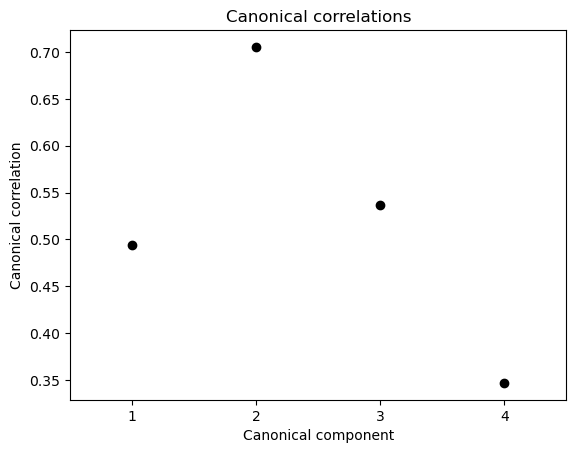

In [ ]:
# https://github.com/gallantlab/pyrcca/blob/main/examples/Pyrcca_usage_example.ipynb

# Imports
import matplotlib.pyplot as plt
# from brewer2mpl import qualitative
from palettable.colorbrewer import qualitative
%matplotlib inline


# Plot canonical correlations (cca2.cancorrs)
plt.plot(np.arange(nComponents)+1, cca2.cancorrs, 'ko')
plt.xlim(0.5, 0.5+nComponents)
plt.xticks(np.arange(nComponents)+1)
plt.xlabel('Canonical component')
plt.ylabel('Canonical correlation')
plt.title('Canonical correlations')
print('''The canonical correlations are:\n
Component 1: %.02f\n
Component 2: %.02f\n
Component 3: %.02f\n
Component 4: %.02f\n
''' % tuple(cca2.cancorrs[:4]))

In [ ]:
# # to check if any column causes invalid eigenvalues
# import rcca
# nComponents = 2 # min(p,q) components
# cca2 = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents,)
# # train on data
# for num_columns in range(2, 64):
#     print('num_columns', num_columns)
#     cca2.train([X1.iloc[:,:num_columns], X2.iloc[:,:num_columns]])
#     print('Canonical Correlation Per Component Pair:',cca2.cancorrs)
#     print('% Shared Variance:',cca2.cancorrs**2)

In [ ]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

# mvlearn.embed.cca

In [322]:
from mvlearn.embed import CCA, MCCA, KMCCA
from mvlearn.plotting import crossviews_plot

In [345]:
# the default is no regularization meaning this is SUMCORR-AVGVAR MCCA
cca = CCA(n_components=7)
cca_scores = cca.fit_transform([X1_sc, X2_sc])

# # the fit-transform method outputs the scores for each view
# crossviews_plot(cca_scores,
#                 title='CCA scores (first two views fitted)',
#                 equal_axes=True,
#                 scatter_kwargs={'alpha': 0.4, 's': 2.0})

# In the 2 view setting, a variety of interpretable statistics can be
# calculated. We assess the canonical correlations achieved and
# their significance using the p-values from a Wilk's Lambda test

stats = cca.stats(cca_scores)
print(f'Canonical Correlations: {stats["r"]}')
print(f'Wilk\'s Lambda Test pvalues: {stats["pF"]}')

Canonical Correlations: [0.71324562 0.6767706  0.47372339 0.31371873 0.21360348 0.18737692
 0.17000209]
Wilk's Lambda Test pvalues: [0.         0.         0.         0.         0.         0.
 0.99995286]


# sparsecca

In [336]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from statsmodels.multivariate.cancorr import CanCorr

from sparsecca import cca_ipls
from sparsecca import cca_pmd
from sparsecca import multicca_pmd
from sparsecca import pmd

In [338]:
def print_weights(name, weights):
    first = weights[:, 0] / np.max(np.abs(weights[:, 0]))
    print(name + ': ' + ', '.join(['{:.3f}'.format(item) for item in first]))


In [340]:
X1_sc.shape

(14397, 16)

In [ ]:
Canonical Correlations: [0.71324562 0.6767706  0.47372339 0.31371873 0.21360348 0.18737692
 0.17000209 0.14722853 0.13814004 0.10762202 0.09883986 0.08222663
 0.06290811 0.05768485 0.05385522 0.04545233]
Wilk's Lambda Test pvalues: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00001263 0.10131203
 0.78706826 0.90795917 0.94518834 0.96179924]

In [339]:
stats_cca = CanCorr(X1_sc, X2_sc)

print(stats_cca.corr_test().summary())
print_weights('X', stats_cca.x_cancoef)
print_weights('Z', stats_cca.y_cancoef)

                             Cancorr results
   Canonical Correlation Wilks' lambda  Num DF     Den DF   F Value Pr > F
--------------------------------------------------------------------------
0                 0.7132        0.1534 960.0000 222308.7257 29.8304 0.0000
1                 0.6768        0.3123 885.0000 209061.5490 19.6739 0.0000
2                 0.4737        0.5762 812.0000 195724.3722  9.9562 0.0000
3                 0.3137        0.7430 741.0000 182295.8657  5.8301 0.0000
4                 0.2136        0.8241 672.0000 168775.0532  4.1723 0.0000
5                 0.1874        0.8635 605.0000 155161.3991  3.5108 0.0000
6                 0.1700        0.8949 540.0000 141454.9121  2.9722 0.0000
7                 0.1472        0.9215 477.0000 127656.2676  2.4736 0.0000
8                 0.1381        0.9420 416.0000 113766.9494  2.0739 0.0000
9                 0.1076        0.9603 357.0000  99789.4153  1.6366 0.0000
10                0.0988        0.9715 300.0000  85727.

# PGAM

In [ ]:
%cd /Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project/PGAM/src/PGAM
from GAM_library import *
import gam_data_handlers as gdh
from post_processing import postprocess_results
%cd /Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project

from scipy.io import savemat

/Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project/PGAM/src/PGAM
/Users/dusiyi/Library/CloudStorage/GoogleDrive-sd80@rice.edu/My Drive/ff_repo/Multifirefly-Project


## differentiate variables

In [ ]:
temporal_vars = ['monkey_speeddummy',
'try_a_few_times_indice_dummy',
'give_up_after_trying_indice_dummy',
'ignore_sudden_flas_indice_dummy',
'two_in_a_row',
'visible_before_last_one',
'disappear_latest',
'ignore_sudden_flash',
'try_a_few_times',
'give_up_after_trying',
'cluster_around_target',
'waste_cluster_around_target',
'catching_ff',
'min_target_has_disappeared_for_last_time_dummy',
'min_target_cluster_has_disappeared_for_last_time_dummy',
'max_target_visible_dummy', 
'max_target_cluster_visible_dummy']

spatial_vars = [x for x in final_behavioral_data.columns if x not in temporal_vars]
spatial_vars

['bin',
 'LDy',
 'LDz',
 'RDy',
 'RDz',
 'gaze_monkey_view_x',
 'gaze_monkey_view_y',
 'gaze_world_x',
 'gaze_world_y',
 'monkey_speed',
 'monkey_angles',
 'monkey_dw',
 'monkey_ddw',
 'monkey_ddv',
 'num_stops',
 'num_caught_ff',
 'stop_rate',
 'stop_success_rate',
 'num_ff',
 'num_visible_ff',
 'min_ff_distance',
 'min_abs_ff_angle',
 'min_abs_ff_angle_boundary',
 'min_visible_ff_distance',
 'min_abs_visible_ff_angle',
 'min_abs_visible_ff_angle_boundary',
 'avg_target_distance',
 'avg_target_angle',
 'avg_target_angle_to_boundary',
 'avg_target_last_seen_time',
 'avg_target_last_seen_distance',
 'avg_target_last_seen_angle',
 'avg_target_last_seen_angle_to_boundary',
 'avg_target_last_seen_distance_frozen',
 'avg_target_last_seen_angle_frozen',
 'avg_target_last_seen_angle_to_boundary_frozen',
 'avg_target_cluster_last_seen_time',
 'avg_target_cluster_last_seen_distance',
 'avg_target_cluster_last_seen_angle',
 'avg_target_cluster_last_seen_angle_to_boundary',
 'avg_target_cluster_l

In [ ]:
temporal_vars
#temporal_vars = temporal_vars[1:3]
#spatial_vars = spatial_vars[4:6]


['monkey_speeddummy',
 'try_a_few_times_indice_dummy',
 'give_up_after_trying_indice_dummy',
 'ignore_sudden_flas_indice_dummy',
 'two_in_a_row',
 'visible_before_last_one',
 'disappear_latest',
 'ignore_sudden_flash',
 'try_a_few_times',
 'give_up_after_trying',
 'cluster_around_target',
 'waste_cluster_around_target',
 'catching_ff',
 'min_target_has_disappeared_for_last_time_dummy',
 'min_target_cluster_has_disappeared_for_last_time_dummy',
 'max_target_visible_dummy',
 'max_target_cluster_visible_dummy']

## temporal kernel

modified from PGAM_Tutorial.ipynb

In [ ]:
temporal_columns = final_behavioral_data[temporal_vars]
spatial_columns = final_behavioral_data[spatial_vars]

scaler = StandardScaler()
spatial_columns_scaled = scaler.fit_transform(spatial_columns) 
spatial_columns = pd.DataFrame(spatial_columns_scaled, columns = spatial_columns.columns)

#temporal_columns_scaled = scaler.fit_transform(temporal_columns) #scale data
#temporal_columns = pd.DataFrame(temporal_columns_scaled, columns = temporal_columns.columns)

In [ ]:
num_trials = 10
column_length = len(final_behavioral_data.iloc[:,1])
num_repeats = math.ceil(column_length/num_trials)
trial_ids = np.repeat(np.arange(num_trials), num_repeats)
trial_ids = trial_ids[:column_length]

In [ ]:
# set some trial ids
## trial_ids = np.zeros(len(final_behavioral_data.iloc[:,1]))

# define the b-spline params
kernel_h_legnth = int(10/bin_width) # duration of the kernel h(t) in time points 
if kernel_h_legnth%2 == 0:
    kernel_h_legnth += 1 


num_int_knots = 12 # number of internal knots used to represent h
order = 4


# define the "smooths_handler" container
sm_handler = gdh.smooths_handler()



for column in temporal_columns.columns:
    # add the covariate & evaluate the convolution
    sm_handler.add_smooth(column, 
                            [temporal_columns[column].values], 
                            is_temporal_kernel=True, 
                            ord=order, 
                            knots_num=num_int_knots,
                            trial_idx=trial_ids,
                            kernel_length=kernel_h_legnth,
                            kernel_direction=0,
                            time_bin=bin_width)


   
   
   
    # # sm_handler['varname'] process and stores the B-spline for the variable
    # # below we retrive the B-spline convolved with the "event" variable
    # convolved_ev = sm_handler[column].X.toarray()

    # # retrive the B-spline used for the convolution
    # basis = sm_handler[column].basis_kernel.toarray()

    # # plot the basis & the convolved events
    # plt.figure(figsize=(8,3))
    # plt.suptitle('%s Filter'%dict_kernel[kernel_direction])

    # # basis for the kenel h
    # plt.subplot(121)
    # plt.title('kernel basis')
    # tps = np.repeat(np.arange(kernel_h_legnth)-kernel_h_legnth//2, basis.shape[1]).reshape(basis.shape)
    # plt.plot(tps, basis)
    # plt.xlabel('time points')

    # plt.subplot(122)
    # plt.title('convolved events')

    # # select a time point interval containing an event
    # idx0, idx1 = np.where(event == 1)[0][2] - 100, np.where(event == 1)[0][2] + 400

    # # extract the events convolved with each of the B-spline elements
    # conv = convolved_ev[idx0:idx1,:]

    # tps = np.arange(0,idx1-idx0) - 100
    # tps = np.repeat(tps,conv.shape[1]).reshape(conv.shape)
    # plt.plot(tps, conv)
    # plt.vlines(tps[0,0] + np.where(event[idx0:idx1])[0],0,1.5,'k',ls='--',label='event')
    # plt.xlabel('time points')
    # plt.legend()


## spatial variable

In [ ]:
# add the 1d spatial variable

order = 4

for column in spatial_columns.columns:
    column_values = spatial_columns[column].values
    # add the variable
    if column in sm_handler.smooths_var:
        sm_handler.smooths_var.remove(column)
        sm_handler.smooths_dict.pop(column)
        
    int_knots = np.linspace(min(column_values),max(column_values),10)
    knots = np.hstack(([int_knots[0]]*(order-1), int_knots, [int_knots[-1]]*(order-1)))
    print(knots)
    sm_handler.add_smooth(column, [column_values], 
                        knots=[knots], 
                        ord=order, 
                        is_temporal_kernel=False,
                        trial_idx=trial_ids, 
                        is_cyclic=[False])
    break

    # # retrive the b-spline evaluated at x.
    # X_1D = sm_handler[column].X.toarray()


    # # sort for plotting
    # plt.figure()
    # plt.title(column)
    # idx_srt = np.argsort(column_values)
    # X_srt = X_1D[idx_srt]
    # p = plt.plot(X_srt)

    # # plt.figure()
    # # plt.title('Unordered')
    # # p = plt.plot(X_1D)

    # # plt.figure()
    # # plt.title('Scatter plot')
    # # plt.scatter(range(len(column_values)), column_values)

    # #plt.plot(range(len(column_values[idx_srt])), column_values[idx_srt])


    # # the size of basis set grows as n^m where n is the basis in the 1D case, and m is the number of dimensions
    # print('Size of X_1D', X_1D.shape)


[-1.73193051 -1.73193051 -1.73193051 -1.73193051 -1.34705706 -0.96218361
 -0.57731017 -0.19243672  0.19243672  0.57731017  0.96218361  1.34705706
  1.73193051  1.73193051  1.73193051  1.73193051]


## Run

In [ ]:
link = sm.genmod.families.links.log()
poissFam = sm.genmod.families.family.Poisson(link=link)

spk_counts = spikes_in_bins.iloc[:len(column_values), 1].values

# create the pgam model
pgam = general_additive_model(sm_handler,
                              sm_handler.smooths_var, # list of covariate we want to include in the model
                              spk_counts, # vector of spike counts
                              poissFam # poisson family with exponential link from statsmodels.api
                             )

# with with all covariate, remove according to stat testing, and then refit
full, reduced = pgam.fit_full_and_reduced(sm_handler.smooths_var, 
                                          th_pval=0.001,# pval for significance of covariate icluseioon
                                          max_iter=10 ** 2, # max number of iteration
                                          use_dgcv=True, # learn the smoothing penalties by dgcv
                                          trial_num_vec=trial_ids)
        
print('Minimal subset of variables driving the activity:')
print(reduced.var_list)

/Users/dusiyi/.conda/envs/Multifirefly-Project/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


         Current function value: 12430.982882
         Iterations: 20
         Function evaluations: 51
         Gradient evaluations: 40
         Hessian evaluations: 21
Optimization terminated successfully.
         Current function value: 12559.185333
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
         Hessian evaluations: 20
Minimal subset of variables driving the activity:
['monkey_speeddummy' 'try_a_few_times' 'catching_ff'
 'min_target_cluster_has_disappeared_for_last_time_dummy'
 'max_target_cluster_visible_dummy' 'bin']


## Post-processing

In [ ]:
trial_ids

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
train_trials = trial_ids % 3 != 1
train_trials

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
np.where(train_trials == False)

(array([ 1440,  1441,  1442, ..., 11517, 11518, 11519]),)




Result structarray types

neuron_id: 	 <class 'numpy.str_'>
variable: 	 <class 'numpy.str_'>
fr: 	 <class 'numpy.float64'>
full_pseudo_r2_train: 	 <class 'numpy.float64'>
full_pseudo_r2_eval: 	 <class 'numpy.float64'>
reduced_pseudo_r2_train: 	 <class 'numpy.float64'>
reduced_pseudo_r2_eval: 	 <class 'numpy.float64'>
pval: 	 <class 'numpy.float64'>
reduced_pval: 	 <class 'numpy.float64'>
x_rate_Hz: 	 <class 'list'>
y_rate_Hz_model: 	 <class 'numpy.ndarray'>
y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
reduced_x_rate_Hz: 	 <class 'list'>
reduced_y_rate_Hz_model: 	 <class 'numpy.ndarray'>
reduced_y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
eval_x_rate_Hz: 	 <class 'list'>
eval_y_rate_Hz_model: 	 <class 'numpy.ndarray'>
eval_y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
eval_reduced_x_rate_Hz: 	 <class 'list'>
eval_reduced_y_rate_Hz_model: 	 <class 'numpy.ndarray'>
eval_reduced_y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
kernel_strength: 	 <class 'numpy.float64'>
signed_kernel_strength: 	 <class 'num

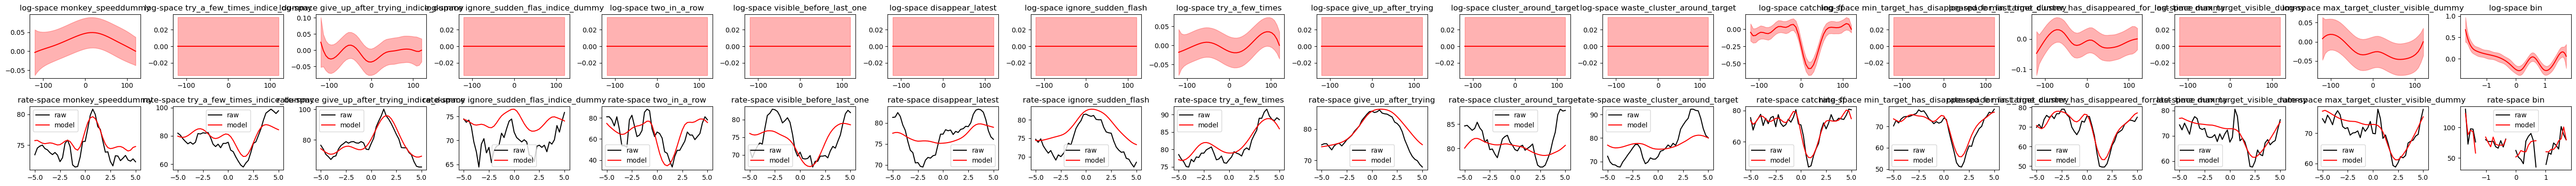

In [ ]:
# string with the neuron identifier
neuron_id = 'neuron_000_session_1_monkey_001'
# dictionary containing some information about the neuron, keys must be strings and values can be anything
# since are stored with type object.
info_save = {'x':100,
             'y':801.2,
             'brain_region': 'V1',
             'subject':'monkey_001'
            }


# assume that we used 90% of the trials for training, 10% for evaluation
res = postprocess_results(neuron_id, spk_counts, full, reduced, train_trials, sm_handler, poissFam, trial_ids, 
                          var_zscore_par=None, info_save=info_save, bins=kernel_h_legnth)
                           


# each row of res contains the info about a variable
# some info are shared for all the variables (p-rsquared for example is a goodness of fit measure for the model
# it is shared, not a property of the variable), while other, like the parameters of the b-splines, 
# are variable specific
print('\n\n')
print('Result structarray types\n========================\n')
for name in res.dtype.names: 
    print('%s: \t %s'%(name, type(res[name][0])))
 

num_vars = len(res['x_kernel'])
# plot tuning functions
plt.figure(figsize=(3*num_vars,4))


for k in range(num_vars):
    plt.subplot(2,len(res['x_kernel']),k+1)
    plt.title('log-space %s'%res['variable'][k])
    x_kernel = res['x_kernel'][k]
    y_kernel = res['y_kernel'][k]
    ypCI_kernel = res['y_kernel_pCI'][k]
    ymCI_kernel = res['y_kernel_mCI'][k]
    
    plt.plot(x_kernel.reshape(-1), y_kernel.reshape(-1), color='r')
    plt.fill_between(x_kernel.reshape(-1), ymCI_kernel.reshape(-1), ypCI_kernel.reshape(-1), color='r', alpha=0.3)
    
    
    
    x_firing = res['x_rate_Hz'][k]
    # y_firing_model = res['model_rate_Hz'][k]
    # y_firing_raw = res['raw_rate_Hz'][k]
    y_firing_model = res['y_rate_Hz_model'][k]
    y_firing_raw = res['y_rate_Hz_raw'][k]


    plt.subplot(2,num_vars,k+1+num_vars)
    plt.title('rate-space %s'%res['variable'][k])
    
    plt.plot(x_firing[0], y_firing_raw.reshape(-1), color='k',label='raw')
    plt.plot(x_firing[0], y_firing_model.reshape(-1), color='r',label='model')
    print("len(y_firing_raw)", len(y_firing_raw.reshape(-1)))
    
    plt.legend()
    plt.tight_layout()
plt.show()

# try original

In [ ]:
## inputs parameters  
num_events = 6000
time_points = 3 * 10 ** 5  # 30 mins at 0.006 ms resolution
rate = 5. * 0.006  # Hz rate of the final kernel
variance = 5.  # spatial input and nuisance variance
int_knots_num = 20  # num of internal knots for the spline basis
order = 4  # spline order

## assume 200 trials
trial_ids = np.repeat(np.arange(200),time_points//200)

## create temporal input
idx = np.random.choice(np.arange(time_points), num_events, replace=False)
events = np.zeros(time_points)
events[idx] = 1

rv = sts.multivariate_normal(mean=[0, 0], cov= variance * np.eye(2))
samp = rv.rvs(time_points)
spatial_var = samp[:, 0]
nuisance_var = samp[:, 1]

# truncate X to avoid jumps in the resp function
sele_idx = np.abs(spatial_var) < 5
spatial_var = spatial_var[sele_idx]
nuisance_var = nuisance_var[sele_idx]
while spatial_var.shape[0] < time_points:
    tmpX = rv.rvs(10 ** 4)
    sele_idx = np.abs(tmpX[:, 0]) < 5
    tmpX = tmpX[sele_idx, :]

    spatial_var = np.hstack((spatial_var, tmpX[:, 0]))
    nuisance_var = np.hstack((nuisance_var, tmpX[:, 1]))
spatial_var = spatial_var[:time_points]
nuisance_var = nuisance_var[:time_points]

# create a resp function
knots = np.hstack(([-5]*3, np.linspace(-5,5,8),[5]*3))
beta = np.arange(10)
beta = beta / np.linalg.norm(beta)
beta = np.hstack((beta[5:], beta[:5][::-1]))
resp_func = lambda x : np.dot(gdh.splineDesign(knots, x, order, der=0),beta)

filter_used_conv = sts.gamma.pdf(np.linspace(0,20,100),a=2) - sts.gamma.pdf(np.linspace(0,20,100),a=5)
filter_used_conv = np.hstack((np.zeros(101),filter_used_conv))*2
# mean of the spike counts depending on spatial_var and events
log_mu0 = resp_func(spatial_var)
for tr in np.unique(trial_ids):
    log_mu0[trial_ids == tr] = log_mu0[trial_ids == tr] + np.convolve(events[trial_ids == tr], filter_used_conv, mode='same')

# adjust mean rate
const = np.log(np.mean(np.exp(log_mu0)) / rate)
log_mu0 = log_mu0 - const

# generate spikes
spk_counts = np.random.poisson(np.exp(log_mu0))

Text(0.5, 0, 'time[sec]')

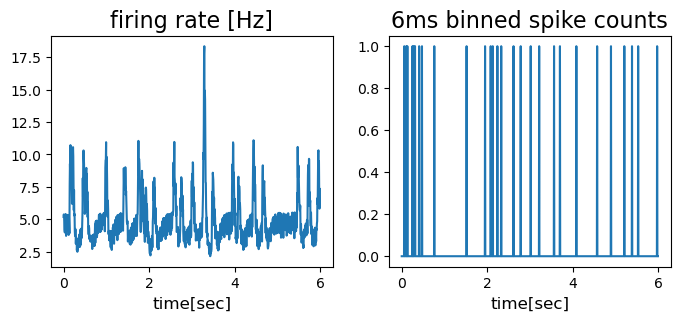

In [ ]:
# plot the firing rate and the spike counts generated
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(np.arange(1000) * 0.006, np.exp(log_mu0)[:1000]/0.006)
plt.title('firing rate [Hz]', fontsize=16)
plt.xlabel('time[sec]', fontsize=12)

plt.subplot(122)
plt.plot(np.arange(1000) * 0.006, spk_counts[:1000])
plt.title('6ms binned spike counts', fontsize=16)
plt.xlabel('time[sec]', fontsize=12)

### 2.2.2 Create the *smooths_handler* object and fit the model
Below we create the smooths_handler object and run a fit. We include a "nuisance" spatial variable, that is not driving the neuron, the fit will learn to discard the variable;

In [ ]:
import statsmodels.api as sm

# Creating the class
sm_handler = smooths_handler()
# Creating the knots (notice the over-representation of edge knots)
knots = np.hstack(([-5]*3, np.linspace(-5,5,15),[5]*3))
# Using smooths_handler class to add variables 
sm_handler.add_smooth('spatial', [spatial_var], knots=[knots], ord=4, is_temporal_kernel=False,
                     trial_idx=trial_ids, is_cyclic=[False],penalty_type='der', der=2)

sm_handler.add_smooth('nuisance', [nuisance_var], knots=[knots], ord=4, is_temporal_kernel=False,
                     trial_idx=trial_ids, is_cyclic=[False],penalty_type='der', der=2)

sm_handler.add_smooth('temporal', [events], knots=None, ord=4, is_temporal_kernel=True,
                     trial_idx=trial_ids, is_cyclic=[False],penalty_type='der', der=2,
                     knots_num=10, kernel_length=500, kernel_direction=1)


# split trial in train and eval
train_trials = trial_ids % 10 != 0
eval_trials = ~train_trials


link = sm.genmod.families.links.log()
poissFam = sm.genmod.families.family.Poisson(link=link)

# create the pgam model
pgam = general_additive_model(sm_handler,
                              sm_handler.smooths_var, # list of covariate we want to include in the model
                              spk_counts, # vector of spike counts
                              poissFam # poisson family with exponential link from statsmodels.api
                             )

# with with all covariate, remove according to stat testing, and then refit
full, reduced = pgam.fit_full_and_reduced(sm_handler.smooths_var, 
                                          th_pval=0.001,# pval for significance of covariate icluseioon
                                          max_iter=10 ** 2, # max number of iteration
                                          use_dgcv=True, # learn the smoothing penalties by dgcv
                                          trial_num_vec=trial_ids,
                                          filter_trials=train_trials)

print('Minimal subset of variables driving the activity:')
print(reduced.var_list)

/Users/dusiyi/.conda/envs/Multifirefly-Project/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


         Current function value: 36162.705776
         Iterations: 22
         Function evaluations: 79
         Gradient evaluations: 67
         Hessian evaluations: 23
Optimization terminated successfully.
         Current function value: 36170.960770
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
         Hessian evaluations: 21
Minimal subset of variables driving the activity:
['spatial' 'temporal']


## 2.3 Post processing<a name="post-proc">
After a fit, it is possible to post-process the model fit output to obtain an easy to parse result in the form of a numpy.structarray. 

Each row will represent results for a specific input variable, additional information about the neuron (e.g. channel ID, electrode ID, or anything else) can be provided in the form of a dictionary, each dictionary value will be stored in the structured array with type "object".

The output structure can be saved either as a ".npy" via *numpy.save(\<filename\>)* or as a .mat (for MATLAB) via *scipy.io.savemat(\<filename*\>)*.

Below is an example of the post-processing applied to the fit just obtained.

In [ ]:
# string with the neuron identifier
neuron_id = 'neuron_000_session_1_monkey_001'
# dictionary containing some information about the neuron, keys must be strings and values can be anything
# since are stored with type object.
info_save = {'x':100,
             'y':801.2,
             'z':301,
             'brain_region': 'V1',
             'subject':'monkey_001'
            }

# assume that we used 90% of the trials for training, 10% for evaluation
res = postprocess_results(neuron_id, spk_counts, full, reduced, train_trials,
                        sm_handler, poissFam, trial_ids, var_zscore_par=None,info_save=info_save,bins=100)

# each row of res contains the info about a variable
# some info are shared for all the variables (p-rsquared for example is a goodness of fit measure for the model
# it is shared, not a property of the variable), while other, like the parameters of the b-splines, 
# are variable specific
print('\n\n')
print('Result structarray types\n========================\n')
for name in res.dtype.names:
    print('%s: \t %s'%(name, type(res[name][0])))


# plot tuning functions
plt.figure(figsize=(8,4))

# for k in range(3):
#     plt.subplot(2,3,k+1)
#     plt.title('log-space %s'%res['variable'][k])
#     x_kernel = res['x_kernel'][k]
#     y_kernel = res['y_kernel'][k]
#     ypCI_kernel = res['y_kernel_pCI'][k]
#     ymCI_kernel = res['y_kernel_mCI'][k]
    
#     plt.plot(x_kernel, y_kernel, color='r')
#     plt.fill_between(x_kernel, ymCI_kernel, ypCI_kernel, color='r', alpha=0.3)
    
    
    
#     x_firing = res['x_rate_Hz'][k]
#     y_firing_model = res['model_rate_Hz'][k]
#     y_firing_raw = res['raw_rate_Hz'][k]
    
#     plt.subplot(2,3,k+4)
#     plt.title('rate-space %s'%res['variable'][k])
    
#     plt.plot(x_firing, y_firing_raw, color='k',label='raw')
#     plt.plot(x_firing, y_firing_model, color='r',label='model')
    
#     plt.legend()
#     plt.tight_layout()
    
    
    




Result structarray types

neuron_id: 	 <class 'numpy.str_'>
variable: 	 <class 'numpy.str_'>
fr: 	 <class 'numpy.float64'>
full_pseudo_r2_train: 	 <class 'numpy.float64'>
full_pseudo_r2_eval: 	 <class 'numpy.float64'>
reduced_pseudo_r2_train: 	 <class 'numpy.float64'>
reduced_pseudo_r2_eval: 	 <class 'numpy.float64'>
pval: 	 <class 'numpy.float64'>
reduced_pval: 	 <class 'numpy.float64'>
x_rate_Hz: 	 <class 'list'>
y_rate_Hz_model: 	 <class 'numpy.ndarray'>
y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
reduced_x_rate_Hz: 	 <class 'list'>
reduced_y_rate_Hz_model: 	 <class 'numpy.ndarray'>
reduced_y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
eval_x_rate_Hz: 	 <class 'list'>
eval_y_rate_Hz_model: 	 <class 'numpy.ndarray'>
eval_y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
eval_reduced_x_rate_Hz: 	 <class 'list'>
eval_reduced_y_rate_Hz_model: 	 <class 'numpy.ndarray'>
eval_reduced_y_rate_Hz_raw: 	 <class 'numpy.ndarray'>
kernel_strength: 	 <class 'numpy.float64'>
signed_kernel_strength: 	 <class 'num

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [ ]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

# Debug

In [ ]:
!pip install -Uqq ipdb
import ipdb
%pdb on

Automatic pdb calling has been turned ON


In [ ]:
import ipdb
%pdb on

Automatic pdb calling has been turned ON


In [ ]:
%pdb off

Automatic pdb calling has been turned OFF


# Appendix

## add_target_last_seen_info_to_ff_dataframe

In [ ]:
# maybe instead of doing it time point by time point, one can do it trial by trial

def add_target_last_seen_info_to_ff_dataframe(ff_dataframe, alive_ff_indices_around_targets=None, use_target_cluster=False,
                                              include_frozen_info=False):
    ff_dataframe['target_last_seen_time'] = 100
    ff_dataframe['target_last_seen_distance'] = 400
    ff_dataframe['target_last_seen_angle'] = 0
    ff_dataframe['target_last_seen_angle_to_boundary'] = 0

    if include_frozen_info:
        ff_dataframe['target_last_seen_distance_frozen'] = 400
        ff_dataframe['target_last_seen_angle_frozen'] = 0
        ff_dataframe['target_last_seen_angle_to_boundary_frozen'] = 0

    if use_target_cluster:
        print("Adding target-cluster-last-seen info to ff_dataframe...")
        if alive_ff_indices_around_targets is None:
            raise ValueError("alive_ff_indices_around_targets is None, but use_target_cluster is True")


    for target_index in np.sort(ff_dataframe['target_index'].unique()):
    #for target_index in [100,101]:
        print('target_index = %d' % target_index, end='\r')
        ff_dataframe_idx = np.array((ff_dataframe['target_index'] == target_index)).nonzero()[0]
        ff_dataframe_sub = ff_dataframe.iloc[ff_dataframe_idx].copy()
        if use_target_cluster:
            target_cluster_indices = alive_ff_indices_around_targets[target_index] 
            target_info = ff_dataframe[(ff_dataframe['ff_index'].isin(target_cluster_indices)) & (ff_dataframe['visible'] == 1)].copy()
        else:  
            target_info = ff_dataframe[(ff_dataframe['ff_index'] == target_index) & (ff_dataframe['visible'] == 1)].copy()

        if len(ff_dataframe_sub) > 0:
            unique_points = ff_dataframe_sub[['point_index', 'time', 'monkey_x', 'monkey_y', 'monkey_angle']].drop_duplicates().sort_values(by='point_index')
            min_point = unique_points.point_index.min()
            target_info = target_info.sort_values(by='point_index')
            if len(target_info) > 0:
                target_info_before = target_info[target_info['point_index'] <= min_point]
                # if there's information about target before unique_points, then attach the last row to the beginning of unique_points
                if len(target_info_before) > 0:
                    target_info = target_info[target_info['point_index'] >= target_info_before.iloc[-1].point_index] 
                    starting_info = target_info_before.iloc[[-1]][['point_index', 'time', 'monkey_x', 'monkey_y', 'monkey_angle']]
                    unique_points = pd.concat([starting_info, unique_points])
                    # but also make sure there's no duplicate
                    unique_points = unique_points.drop_duplicates(subset=['point_index'], keep='first')
                else: # we eliminate the part in unique_points that don't have any target info preceding it or at the same time
                    # those will stay in the original dataframe as default values
                    valid_points = np.where(np.array(unique_points['point_index']) >= target_info.point_index.min())[0]
                    unique_points = unique_points.iloc[valid_points]
                    ff_dataframe_idx = ff_dataframe_idx[valid_points]
                    ff_dataframe_sub = ff_dataframe_sub.iloc[valid_points]
                    #print("unique_points truncated: ", unique_points)
                # we need to make sure that for every point_index, there's no duplicate value
                target_info = target_info.sort_values(by=['point_index', 'ff_index']).drop_duplicates(subset=['point_index'], keep='first')
            else:
                # need to find a placeholder
                if min_point >= 1:
                    target_info = ff_dataframe.iloc[[min_point-1]]
                else:
                    target_info = ff_dataframe.iloc[[max_point+1]]
            
            target_info = target_info[['point_index', 'time', 'ff_x', 'ff_y', 'monkey_x', 'monkey_y', 'monkey_angle']]
            target_info = target_info.rename(columns={'time':'target_time', 'ff_x':'target_x', 'ff_y':'target_y',
                                                    'monkey_x': 'frozen_monkey_x', 'monkey_y': 'frozen_monkey_y', 'monkey_angle': 'frozen_monkey_angle'})

            # merge the target 
            unique_points = unique_points.merge(target_info, how='left', on='point_index')
            unique_points.fillna(method='ffill', inplace=True)
            # calculate the desired values
            target_x, target_y = unique_points.target_x, unique_points.target_y
            monkey_x, monkey_y, monkey_angle = unique_points.monkey_x, unique_points.monkey_y, unique_points.monkey_angle
            target_angle = basic_func.calculate_angles_to_ff_centers(ff_x=target_x, ff_y=target_y, mx=monkey_x, my=monkey_y, m_angle=monkey_angle)
            target_distance = np.sqrt((target_x - monkey_x)**2 + (target_y - monkey_y)**2)
            unique_points['target_last_seen_time'] = unique_points.time - unique_points.target_time
            unique_points['target_last_seen_distance'] = target_distance
            unique_points['target_last_seen_angle'] = target_angle
            unique_points['target_last_seen_angle_to_boundary'] = basic_func.calculate_angles_to_ff_boundaries(angles_to_ff=target_angle, distances_to_ff=target_distance)         
            if include_frozen_info:
                monkey_x, monkey_y, monkey_angle = unique_points.frozen_monkey_x, unique_points.frozen_monkey_y, unique_points.frozen_monkey_angle
                target_angle = basic_func.calculate_angles_to_ff_centers(ff_x=target_x, ff_y=target_y, mx=monkey_x, my=monkey_y, m_angle=monkey_angle)
                target_distance = np.sqrt((target_x - monkey_x)**2 + (target_y - monkey_y)**2)
                unique_points['target_last_seen_distance_frozen'] = target_distance
                unique_points['target_last_seen_angle_frozen'] = target_angle
                unique_points['target_last_seen_angle_to_boundary_frozen'] = basic_func.calculate_angles_to_ff_boundaries(angles_to_ff=target_angle, distances_to_ff=target_distance)  
                essential_columns = ['point_index', 'target_last_seen_time', 'target_last_seen_distance', 'target_last_seen_angle', 'target_last_seen_angle_to_boundary', \
                                    'target_last_seen_distance_frozen', 'target_last_seen_angle_frozen', 'target_last_seen_angle_to_boundary_frozen']
            else:
                essential_columns = ['point_index', 'target_last_seen_time', 'target_last_seen_distance', 'target_last_seen_angle', 'target_last_seen_angle_to_boundary']
            unique_points = unique_points[essential_columns]

            ff_dataframe_sub_new = ff_dataframe_sub[['point_index']].merge(unique_points, on='point_index', how='left')
            ff_dataframe.iloc[ff_dataframe_idx, ff_dataframe.columns.get_indexer(ff_dataframe_sub_new.columns)]  = ff_dataframe_sub_new.values


    return ff_dataframe

In [ ]:
# find some target info at each moment
target_x = ff_dataframe.loc[:, 'target_x'].values
target_y = ff_dataframe.loc[:, 'target_y'].values
monkey_x = ff_dataframe.loc[:, 'monkey_x'].values
monkey_y = ff_dataframe.loc[:, 'monkey_y'].values
monkey_angle = ff_dataframe.loc[:, 'monkey_angle'].values

# calculate target_distance, target_angle, and target_angle_to_boundary based on target_x, target_y in ff_dataframe
target_distance = np.sqrt((target_x - monkey_x)**2 + (target_y - monkey_y)**2)
ff_dataframe.loc[:, 'target_distance'] = target_distance
target_angle = basic_func.calculate_angles_to_ff_centers(ff_x=target_x, ff_y=target_y, mx=monkey_x, my=monkey_y, m_angle=monkey_angle)
ff_dataframe.loc[:, 'target_angle'] = target_angle
ff_dataframe.loc[:, 'target_angle_to_boundary'] = basic_func.calculate_angles_to_ff_boundaries(angles_to_ff=target_angle, distances_to_ff=target_distance)






# add some target-last-seen info into ff_dataframe
# find alive_ff_indices_around_targets
alive_ff_indices_around_targets = find_patterns.find_cluster_surrounding_targets(ff_real_position_sorted, ff_caught_T_sorted, \
                                                                                ff_life_sorted, ff_dataframe, max_distance=50, return_index_only=True)
# add target-cluster-last-seen info to ff_dataframe
ff_dataframe = add_target_last_seen_info_to_ff_dataframe(ff_dataframe, alive_ff_indices_around_targets, use_target_cluster=True, include_frozen_info=True)
ff_dataframe = ff_dataframe.rename(columns={'target_last_seen_time': 'target_cluster_last_seen_time', 
                                            'target_last_seen_distance': 'target_cluster_last_seen_distance', 
                                            'target_last_seen_angle': 'target_cluster_last_seen_angle', 
                                            'target_last_seen_angle_to_boundary': 'target_cluster_last_seen_angle_to_boundary',
                                            'target_last_seen_distance_frozen': 'target_cluster_last_seen_distance_frozen', 
                                            'target_last_seen_angle_frozen': 'target_cluster_last_seen_angle_frozen', 
                                            'target_last_seen_angle_to_boundary_frozen': 'target_cluster_last_seen_angle_to_boundary_frozen'})


# add target-last-seen info to ff_dataframe
ff_dataframe = add_target_last_seen_info_to_ff_dataframe(ff_dataframe, alive_ff_indices_around_targets, use_target_cluster=False, include_frozen_info=True)
ff_dataframe['point_index'] = ff_dataframe['point_index'].astype(int)
ff_dataframe



# add target_has_disappeared_for_last_time_dummy to ff_dataframe
ff_dataframe['target_has_disappeared_for_last_time_dummy'] = 0
# for each target
for target in ff_caught_T_sorted:
# fine the time it disappears for the last time
    target_info = ff_dataframe[(ff_dataframe['ff_index']==target) & (ff_dataframe['visible']==1)]
    target_last_visible_time = target_info['time'].max()
    # then mark the period between that time and the capture time as 1
    ff_dataframe.loc[(ff_dataframe['target_index']==target) & (ff_dataframe['time'] > target_last_visible_time), 'target_has_disappeared_for_last_time_dummy'] = 1


ff_dataframe['target_cluster_has_disappeared_for_last_time_dummy'] = 0
# for each target
for target in ff_caught_T_sorted:
    target_cluster_indices = alive_ff_indices_around_targets[target_index] 
    target_info = ff_dataframe[(ff_dataframe['ff_index'].isin(target_cluster_indices)) & (ff_dataframe['visible']==1)]
    target_last_visible_time = target_info['time'].max()
    # then mark the period between that time and the capture time as 1
    ff_dataframe.loc[(ff_dataframe['target_index']==target) & (ff_dataframe['time'] > target_last_visible_time), 'target_cluster_has_disappeared_for_last_time_dummy'] = 1

Finding clusters surrounding targets...
0 out of 1338
100 out of 1338
200 out of 1338
300 out of 1338
400 out of 1338
500 out of 1338
600 out of 1338
700 out of 1338
800 out of 1338
900 out of 1338
1000 out of 1338
1100 out of 1338
1200 out of 1338
1300 out of 1338
Adding target-cluster-last-seen info to ff_dataframe...


NameError: name 'max_point' is not defined

In [ ]:
window_width = 0.8
pattern_df['num_stops'] = 0
pattern_df['num_caught_ff'] = 0
for index, row in pattern_df.iterrows():
    duration = [row.time - window_width/2, row.time + window_width/2]
    pattern_subset = pattern_df[(pattern_df['time'] > duration[0]) & (pattern_df['time'] <= duration[1])]
    row['num_stops'] = pattern_subset['monkey_speeddummy'].sum()
    row['num_caught_ff'] = len(np.where((ff_caught_T_sorted > duration[0]) & (ff_caught_T_sorted <= duration[1]))[0])
pattern_df['stop_rate'] = pattern_df['num_stops']/window_width
pattern_df['stop_success_rate'] = pattern_df['num_caught_ff']/pattern_df['num_stops']



# Retrieve single ff neural data

In [ ]:
import scipy.io # since this is an earlier version mat file, h5py can't be used here
filepath = "all_monkey_data/single_ff_neural_data/m53s31.mat"
single_ff = scipy.io.loadmat(filepath)

KeyboardInterrupt: 

In [ ]:
single_ff.keys()

NameError: name 'single_ff' is not defined

In [ ]:
np.where(single_ff['units'].flatten()[6])

NameError: name 'single_ff' is not defined

In [ ]:
unit = 10
trial = 200
single_ff['units'].flatten()[unit][-2][:,trial]

NameError: name 'single_ff' is not defined

In [ ]:
import sys
import os
import numpy as np
import torch
from numpy import pi
from matplotlib import pyplot as plt

import numpy as np
import scipy.linalg as linalg
import scipy.interpolate as interpolate
from scipy.signal import fftconvolve


from scipy.io import loadmat
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sys

import scipy.sparse as sparse
import matplotlib.pylab as plt

In [ ]:
# define a b-spline
kernel_len = 15 #  about +- 325ms 
knots = np.hstack(([-1.001]*3, np.linspace(-1.001,1.001,5), [1.001]*3))
tp = np.linspace(-1.,1.,kernel_len)
bX = splineDesign(knots, tp, ord=4, der=0, outer_ok=False)

In [ ]:

def splineDesign(knots, x, ord=4, der=0, outer_ok=False): 
    """Reproduces behavior of R function splineDesign() for use by ns(). See R documentation for more information.

    Python code uses scipy.interpolate.splev to get B-spline basis functions, while R code calls C.
    Note that der is the same across x."""
    knots = np.array(knots, dtype=np.float64) 
    x = np.array(x, dtype=np.float64) 
    xorig = x.copy() 
    not_nan = ~np.isnan(xorig) 
    nx = x.shape[0] 
    knots.sort()
    nk = knots.shape[0] 
    need_outer = any(x[not_nan] < knots[ord - 1]) or any(x[not_nan] > knots[nk - ord])
    in_x = (x >= knots[0]) & (x <= knots[-1]) & not_nan

    if need_outer:
        if outer_ok:
            # print('knots do not contain the data range')

            out_x = ~all(in_x)
            if out_x:
                x = x[in_x]
                nnx = x.shape[0]
            dkn = np.diff(knots)[::-1]
            reps_start = ord - 1
            if any(dkn > 0):
                reps_end = max(0, ord - np.where(dkn > 0)[0][0] - 1)
            else:
                reps_end = np.nan  # this should give an error, since all knots are the same
            idx = [0] * (ord - 1) + list(range(nk)) + [nk - 1] * reps_end
            knots = knots[idx]
        else:
            raise ValueError("the 'x' data must be in the range %f to %f unless you set outer_ok==True'" % (
            knots[ord - 1], knots[nk - ord]))
    else:
        reps_start = 0
        reps_end = 0
    if (not need_outer) and any(~not_nan):
        x = x[in_x]
    idx0 = reps_start
    idx1 = len(knots) - ord - reps_end
    cycleOver = np.arange(idx0, idx1)
    m = len(knots) - ord
    v = np.zeros((cycleOver.shape[0], len(x)), dtype=np.float64)
    # v = np.zeros((m, len(x)))

    d = np.eye(m, len(knots))
    for i in range(cycleOver.shape[0]):
        v[i] = interpolate.splev(x, (knots, d[cycleOver[i]], ord - 1), der=der)
        # v[i] = interpolate.splev(x, (knots, d[i], ord - 1), der=der)

    # before = np.sum(xorig[not_nan] < knots[0])
    # after = np.sum(xorig[not_nan] > knots[-1])
    design = np.zeros((v.shape[0], xorig.shape[0]), dtype=np.float64)
    for i in range(v.shape[0]):
    #     design[i, before:xorig.shape[0] - after] = v[i]
        design[i,in_x] = v[i]


    return design.transpose()

In [ ]:
bX.shape


(15, 7)

In [ ]:
bX[:,1]

array([0.00597606, 0.53207137, 0.57081389, 0.36636833, 0.15696304,
       0.04650757, 0.00581345, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

[0.99401796 0.36181648 0.07793343 0.00284611 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


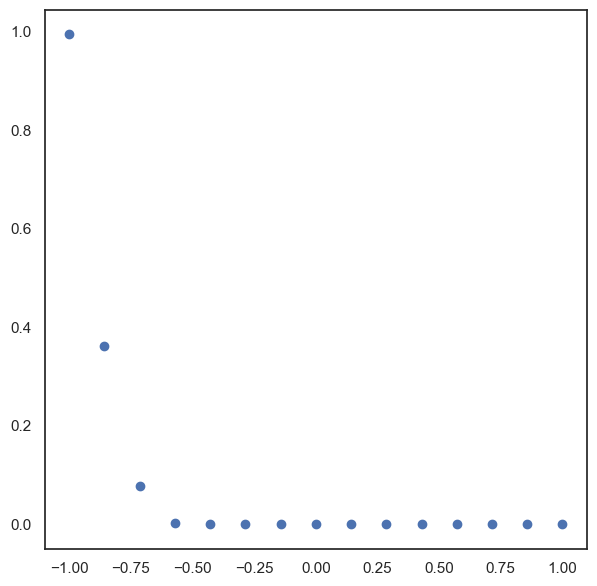

[0.00597606 0.53207137 0.57081389 0.36636833 0.15696304 0.04650757
 0.00581345 0.         0.         0.         0.         0.
 0.         0.         0.        ]


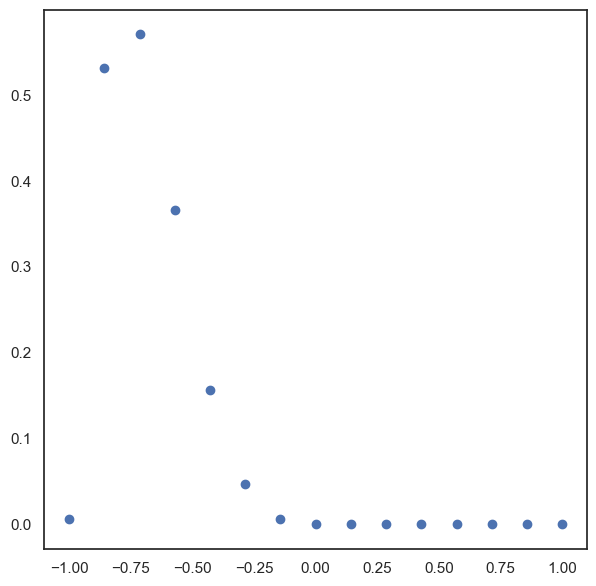

[0.00000598 0.10215455 0.31992094 0.52540933 0.5951762  0.50651713
 0.3365512  0.16666667 0.06081142 0.01317203 0.0004947  0.
 0.         0.         0.        ]


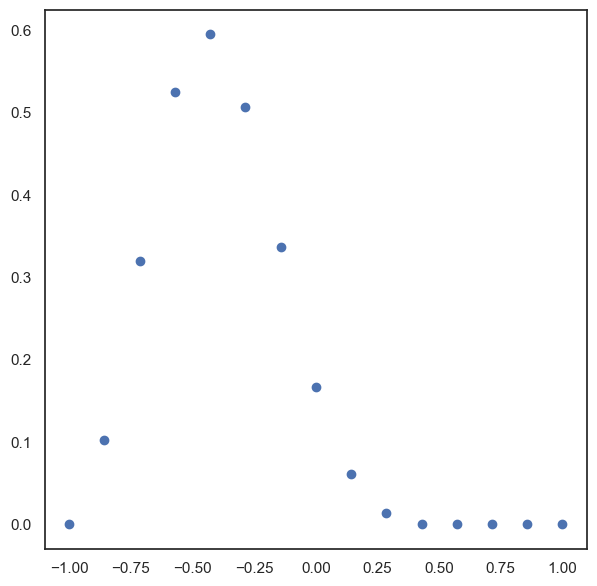

[0.         0.00395759 0.03133174 0.10537623 0.24736606 0.43380327
 0.59682393 0.66666667 0.59682393 0.43380327 0.24736606 0.10537623
 0.03133174 0.00395759 0.        ]


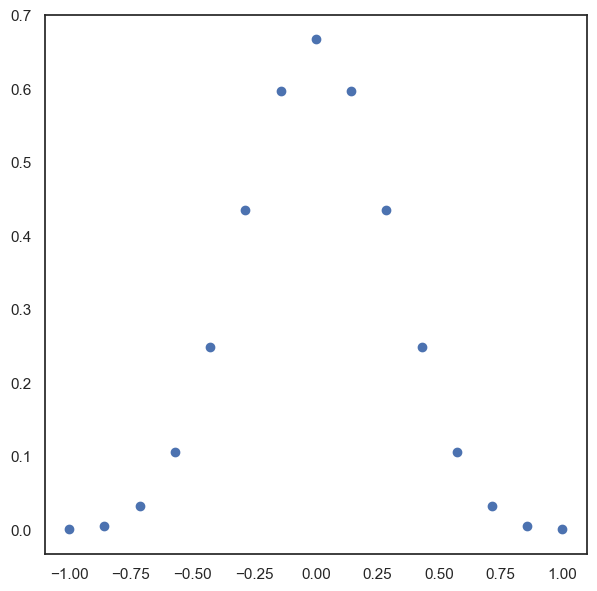

[0.         0.         0.         0.         0.0004947  0.01317203
 0.06081142 0.16666667 0.3365512  0.50651713 0.5951762  0.52540933
 0.31992094 0.10215455 0.00000598]


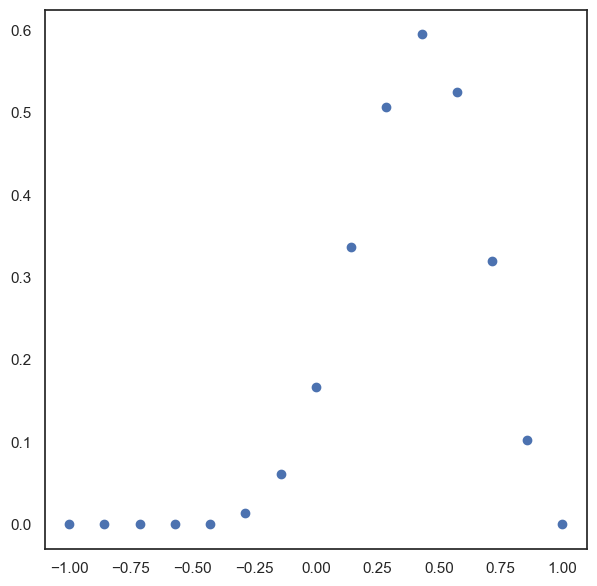

[0.         0.         0.         0.         0.         0.
 0.         0.         0.00581345 0.04650757 0.15696304 0.36636833
 0.57081389 0.53207137 0.00597606]


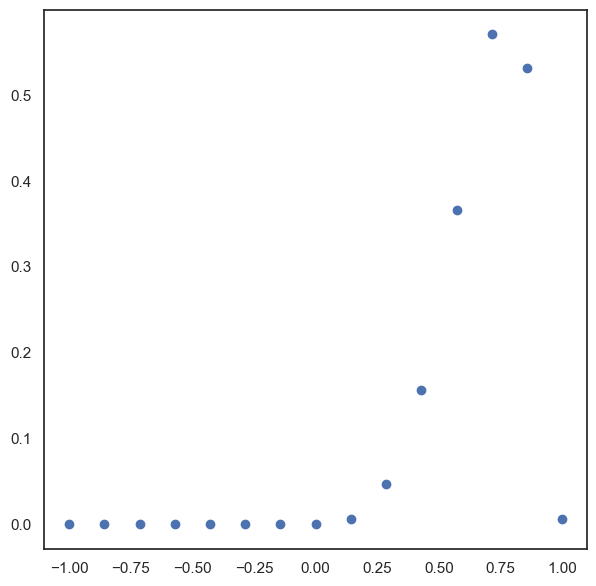

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00284611
 0.07793343 0.36181648 0.99401796]


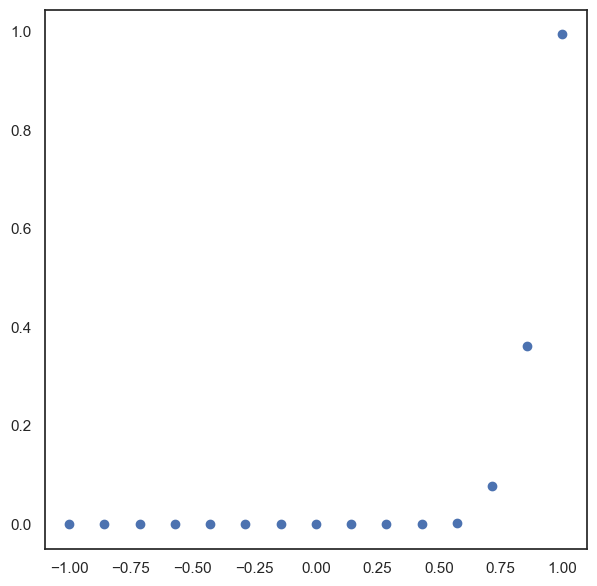

In [ ]:
for i in range(bX.shape[1]):
  plt.subplots(figsize=(7,7))
  y = bX[:,i]
  print(y)
  plt.scatter(tp, y)
  plt.show()
  plt.close()